<a href="https://colab.research.google.com/github/SleptsovDenis/Kursach/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import numpy as np
import os
import matplotlib.pyplot as plt
import torchvision as tv
import torch.nn.functional as F
from tqdm import tqdm

In [27]:
trans = tv.transforms.Compose([tv.transforms.ToTensor()])

In [28]:
ds_mnist = tv.datasets.MNIST('./datasets',download=True,transform=trans)

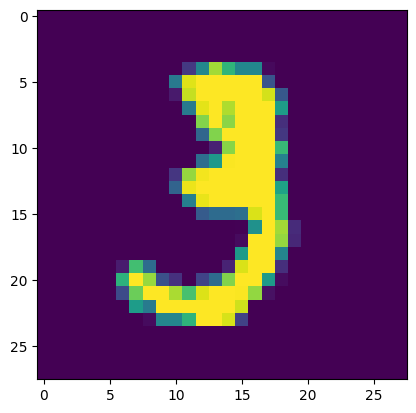

In [29]:
ds_mnist[0][0].numpy()[0].shape
plt.imshow(ds_mnist[10][0].numpy()[0])

In [30]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(ds_mnist,batch_size = batch_size,shuffle=True, num_workers=1,drop_last=True)

In [31]:
for img,label in dataloader:
  print(img.shape)
  print(label.shape)
  break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [32]:
class Neural_numbers(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28*28,100)
    self.linear2= nn.Linear(100,10)
    self.act=nn.ReLU()

  def forward(self,x):
    out = self.flat(x)
    out = self.linear1(out)
    out = self.act(out)
    out = self.linear2(out)

    return out

In [33]:
model = Neural_numbers()

In [34]:
loss_fn=nn.CrossEntropyLoss()

In [35]:
optimizer = torch.optim.SGD(model.parameters(),lr =1e-3, momentum =0.9)

In [36]:
def accuracy(pred,label):
  answers = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  print(answers.mean())
  return answers.mean()

In [37]:
epochs = 10
for epoch in range(epochs):
  loss_val = 0
  acc_val = 0
  for image,label in tqdm(dataloader):
    optimizer.zero_grad()
    label = nn.functional.one_hot(label,10).float()
    pred = model(img)
    loss = loss_fn(pred, label)
    loss.backward()
    loss_item=loss.item()
    loss_val += loss_item
    optimizer.step()
    acc_current = accuracy(pred,label)
    acc_val += acc_current
    # pbar.set_description('loss ',loss_item,' accuracy ',acc_current)
  print(loss_val/len(dataloader))
  print(acc_val/len(dataloader))

  0%|          | 0/3750 [00:00<?, ?it/s]<ipython-input-36-d910c6ba2ac5>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answers = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  1%|          | 31/3750 [00:00<00:24, 153.18it/s]

0.0
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.125
0.125
0.375
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0
0.0
0.0625
0.125


  2%|▏         | 62/3750 [00:00<00:25, 144.15it/s]

0.0
0.3125
0.125
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.375
0.1875
0.0
0.0625
0.0
0.1875
0.25
0.0625
0.0625
0.25
0.0625
0.3125
0.1875
0.0625
0.375
0.0625
0.0
0.1875


  3%|▎         | 95/3750 [00:00<00:25, 145.41it/s]

0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.25
0.375
0.1875
0.125
0.0625
0.3125
0.0625
0.0
0.0
0.1875


  4%|▎         | 135/3750 [00:00<00:21, 171.55it/s]

0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.0
0.1875
0.0625
0.0
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.3125
0.0625
0.125
0.125
0.3125
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.125
0.1875
0.0
0.125
0.0625


  5%|▍         | 173/3750 [00:01<00:20, 177.91it/s]

0.25
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.25
0.0625
0.0
0.0625
0.0
0.1875
0.0
0.0
0.125
0.1875
0.0
0.0625
0.1875
0.3125
0.125
0.0625
0.0
0.25
0.0
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.0


  6%|▌         | 214/3750 [00:01<00:18, 191.54it/s]

0.1875
0.0
0.3125
0.125
0.0
0.0
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.125
0.125
0.3125
0.1875
0.1875
0.0625
0.1875
0.0625
0.0
0.0625
0.0
0.1875
0.0625
0.0
0.125
0.25
0.0
0.0
0.125
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.3125


  7%|▋         | 257/3750 [00:01<00:17, 201.66it/s]

0.0
0.125
0.25
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0
0.125
0.0625
0.125
0.0
0.125
0.0625
0.1875
0.0
0.1875
0.125
0.0625
0.1875
0.1875
0.125
0.0625
0.25
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.25
0.0625
0.0625
0.0
0.125
0.0


  7%|▋         | 278/3750 [00:01<00:17, 197.10it/s]

0.1875
0.125
0.1875
0.0625
0.1875
0.0625
0.3125
0.0
0.1875
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.125
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.3125
0.1875
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.0
0.1875
0.0625


  8%|▊         | 317/3750 [00:01<00:19, 173.25it/s]

0.0
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.1875
0.125
0.0625
0.0
0.0
0.125
0.1875
0.125
0.1875
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.25
0.125
0.0
0.125


  9%|▉         | 353/3750 [00:02<00:20, 166.76it/s]

0.125
0.0625
0.1875
0.125
0.125
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.0
0.0
0.25
0.0625
0.125
0.1875
0.0625
0.0
0.125
0.0
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.0
0.125
0.1875


 10%|█         | 388/3750 [00:02<00:20, 168.00it/s]

0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.1875
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.0
0.0
0.0
0.0
0.1875
0.0
0.0625
0.125
0.0
0.25
0.0
0.0
0.0625


 11%|█▏        | 422/3750 [00:02<00:20, 164.23it/s]

0.0625
0.125
0.125
0.0
0.1875
0.125
0.1875
0.0
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.3125
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.125


 12%|█▏        | 456/3750 [00:02<00:20, 162.93it/s]

0.0625
0.0625
0.125
0.125
0.0
0.25
0.1875
0.0
0.25
0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.0
0.0625
0.0
0.125
0.1875
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.25


 13%|█▎        | 490/3750 [00:02<00:20, 160.36it/s]

0.0625
0.0625
0.1875
0.1875
0.1875
0.3125
0.1875
0.3125
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.25
0.0625
0.125
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0
0.1875
0.125
0.0625
0.1875


 14%|█▍        | 524/3750 [00:03<00:20, 159.13it/s]

0.0625
0.0625
0.0625
0.0625
0.0
0.1875
0.1875
0.1875
0.0625
0.1875
0.1875
0.3125
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.25
0.1875
0.0625
0.1875
0.125
0.3125
0.125
0.0625
0.125
0.125
0.125
0.0
0.1875

 15%|█▍        | 556/3750 [00:03<00:20, 158.78it/s]


0.0625
0.0625
0.0
0.0625
0.125
0.125
0.1875
0.375
0.0
0.0625
0.0
0.25
0.1875
0.125
0.0625
0.3125
0.0625
0.125
0.0
0.0625
0.1875
0.1875
0.25
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.1875
0.1875

 16%|█▌        | 589/3750 [00:03<00:19, 159.18it/s]


0.0625
0.125
0.0625
0.0
0.0
0.125
0.1875
0.1875
0.125
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.0
0.125
0.25
0.125
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.125


 16%|█▌        | 605/3750 [00:03<00:20, 153.05it/s]

0.0
0.1875
0.1875
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.1875
0.1875
0.1875
0.0
0.25
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.375
0.0625
0.0
0.0
0.0625
0.25
0.125
0.375
0.0625


 17%|█▋        | 637/3750 [00:03<00:20, 149.11it/s]

0.25
0.25
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.1875
0.125
0.0
0.0
0.1875
0.0625
0.3125
0.0625
0.0
0.125
0.25
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0625


 18%|█▊        | 669/3750 [00:04<00:20, 149.18it/s]

0.0
0.125
0.25
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.0
0.1875
0.1875
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.125
0.125
0.25
0.0625
0.0
0.1875
0.25
0.0
0.0625
0.0625


 19%|█▉        | 711/3750 [00:04<00:17, 176.02it/s]

0.125
0.125
0.0625
0.25
0.125
0.125
0.1875
0.3125
0.125
0.25
0.0
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.0
0.0625
0.25
0.1875
0.0625
0.1875
0.0625
0.125
0.125
0.375
0.0625
0.0625
0.125
0.125
0.1875
0.1875


 20%|██        | 750/3750 [00:04<00:16, 184.31it/s]

0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.25
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.0
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.375
0.1875
0.0
0.125
0.0
0.0625
0.0625
0.25
0.0
0.0

 21%|██        | 791/3750 [00:04<00:15, 187.33it/s]


0.0625
0.125
0.0
0.125
0.0
0.1875
0.125
0.0
0.0
0.125
0.0625
0.0
0.125
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.25
0.0
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.25
0.125
0.1875
0.125
0.0625
0.0625
0.375
0.0

 22%|██▏       | 829/3750 [00:04<00:15, 188.19it/s]


0.0625
0.125
0.0
0.0
0.25
0.0
0.1875
0.1875
0.125
0.125
0.125
0.125
0.0625
0.0
0.0625
0.0
0.25
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0
0.1875
0.0
0.125
0.0625
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.25
0.125
0.25


 23%|██▎       | 867/3750 [00:05<00:15, 186.44it/s]

0.0
0.1875
0.0
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.0
0.0
0.0625
0.0
0.125
0.0625
0.0
0.125
0.125
0.1875
0.125
0.375
0.1875
0.25
0.125
0.0
0.25
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.1875
0.125
0.125
0.0625
0.0625


 24%|██▍       | 909/3750 [00:05<00:14, 195.53it/s]

0.1875
0.125
0.125
0.25
0.0
0.125
0.0625
0.125
0.125
0.0
0.1875
0.0625
0.25
0.1875
0.125
0.125
0.0625
0.0
0.1875
0.0
0.25
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.125
0.0
0.125
0.25
0.0625


 25%|██▌       | 952/3750 [00:05<00:13, 202.97it/s]

0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.0
0.0625
0.125
0.125
0.0
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.0
0.1875
0.25
0.0625
0.0
0.0
0.1875
0.0625
0.25
0.1875
0.0
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625


 26%|██▋       | 993/3750 [00:05<00:13, 197.66it/s]

0.0625
0.0625
0.125
0.1875
0.0625
0.1875
0.0625
0.0
0.375
0.0625
0.125
0.1875
0.125
0.125
0.125
0.0
0.0
0.0625
0.25
0.125
0.0625
0.125
0.0
0.0625
0.125
0.3125
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0625


 28%|██▊       | 1035/3750 [00:05<00:13, 198.84it/s]

0.0625
0.0625
0.1875
0.25
0.125
0.125
0.0625
0.125
0.1875
0.3125
0.125
0.0
0.0625
0.1875
0.0625
0.0
0.1875
0.125
0.125
0.1875
0.1875
0.0
0.0625
0.25
0.0625
0.1875
0.0
0.125
0.0625
0.0625
0.0
0.0
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.0


 29%|██▊       | 1076/3750 [00:06<00:13, 197.57it/s]

0.125
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.0
0.0625
0.125
0.0
0.3125
0.3125
0.0
0.1875
0.1875
0.125
0.0
0.0625
0.125
0.0625
0.0
0.1875
0.0
0.1875
0.25
0.0
0.125
0.1875
0.0
0.1875
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0


 30%|██▉       | 1116/3750 [00:06<00:14, 186.42it/s]

0.125
0.1875
0.1875
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.25
0.25
0.125
0.125
0.1875
0.0
0.0625
0.3125
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.1875
0.0625
0.1875
0.25
0.125


 31%|███       | 1154/3750 [00:06<00:14, 185.12it/s]

0.1875
0.0
0.0625
0.0625
0.0
0.0
0.1875
0.0
0.125
0.375
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.125
0.3125
0.0625
0.0625
0.125
0.1875
0.0625
0.25
0.0
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0625


 32%|███▏      | 1193/3750 [00:06<00:13, 188.51it/s]

0.1875
0.25
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.1875
0.0
0.125
0.0625
0.1875
0.125
0.0
0.0
0.125
0.0
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.25
0.0625
0.0
0.25
0.125
0.0
0.125
0.125
0.0625
0.125
0.125
0.0
0.0625
0.0625


 33%|███▎      | 1232/3750 [00:07<00:13, 187.72it/s]

0.0625
0.25
0.125
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.3125
0.0
0.0
0.0625
0.3125
0.3125
0.125
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.0
0.1875
0.0


 34%|███▍      | 1273/3750 [00:07<00:12, 193.96it/s]

0.0625
0.1875
0.0625
0.0625
0.25
0.1875
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.1875
0.0
0.0625
0.0
0.125
0.0
0.0
0.125
0.0625
0.25
0.1875
0.125
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.0
0.0625
0.125
0.125
0.125


 35%|███▌      | 1313/3750 [00:07<00:12, 189.76it/s]

0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.0
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.0
0.125
0.0625
0.25
0.125
0.125
0.25
0.0625
0.125
0.125
0.125
0.125
0.0625


 36%|███▌      | 1353/3750 [00:07<00:12, 192.40it/s]

0.0625
0.1875
0.0
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.3125
0.0625
0.1875
0.125
0.0625
0.0625
0.25
0.0
0.125
0.125
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.0625
0.125
0.25
0.0625
0.1875


 37%|███▋      | 1373/3750 [00:07<00:12, 193.14it/s]

0.1875
0.125
0.1875
0.125
0.25
0.0
0.0625
0.25
0.0
0.1875
0.25
0.0
0.0625
0.125
0.0
0.125
0.25
0.0
0.1875
0.0625
0.125
0.0
0.0
0.375
0.0
0.125
0.0625
0.0
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.25
0.125
0.0625
0.125
0.0

 38%|███▊      | 1413/3750 [00:07<00:12, 191.65it/s]


0.0
0.1875
0.0625
0.0
0.0
0.0625
0.125
0.0625
0.1875
0.0
0.0625
0.0
0.0
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.0
0.1875


 39%|███▉      | 1455/3750 [00:08<00:11, 199.36it/s]

0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.25
0.1875
0.0625
0.1875
0.1875
0.0625
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.0625
0.25
0.25
0.1875
0.0625
0.0
0.25
0.0625
0.1875
0.125

 40%|███▉      | 1497/3750 [00:08<00:11, 203.38it/s]


0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.0
0.125
0.0
0.0
0.0625
0.25
0.0625
0.0625
0.125
0.125
0.1875
0.0
0.125
0.0625
0.25
0.0625
0.0625
0.125
0.0
0.125
0.0
0.125
0.0625
0.25
0.1875
0.0
0.0625
0.0625
0.1875
0.1875
0.125


 41%|████      | 1540/3750 [00:08<00:10, 201.57it/s]

0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.25
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.3125
0.125
0.1875
0.0625
0.1875
0.0
0.0625
0.0
0.0
0.25
0.0625
0.1875
0.1875
0.125
0.0
0.0
0.125
0.0
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.0


 42%|████▏     | 1582/3750 [00:08<00:11, 194.70it/s]

0.0625
0.125
0.1875
0.0625
0.0
0.125
0.125
0.0
0.0625
0.0
0.1875
0.125
0.125
0.0625
0.125
0.0
0.3125
0.0625
0.0625
0.0625
0.25
0.1875
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.375
0.0
0.125
0.1875


 43%|████▎     | 1623/3750 [00:09<00:10, 197.08it/s]

0.0625
0.125
0.0
0.0625
0.0
0.0
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.0
0.0
0.0625
0.0
0.0
0.1875
0.0
0.0
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.1875
0.1875
0.375
0.0
0.0625
0.125
0.0
0.0625
0.0625


 44%|████▍     | 1664/3750 [00:09<00:10, 198.64it/s]

0.0
0.125
0.0
0.1875
0.0
0.0
0.0625
0.1875
0.0
0.0625
0.1875
0.3125
0.0625
0.0
0.0625
0.1875
0.1875
0.125
0.125
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.125
0.0
0.125
0.0625
0.25


 45%|████▌     | 1705/3750 [00:09<00:10, 199.82it/s]

0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.25
0.1875
0.0625
0.1875
0.125
0.25
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.125
0.5
0.1875
0.1875
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0625


 47%|████▋     | 1745/3750 [00:09<00:10, 194.92it/s]

0.0625
0.0625
0.0
0.1875
0.1875
0.1875
0.0625
0.0
0.3125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.3125
0.1875
0.125
0.0625
0.125
0.25
0.25
0.0
0.1875
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.125


 48%|████▊     | 1785/3750 [00:09<00:10, 190.08it/s]

0.1875
0.25
0.0
0.125
0.1875
0.25
0.0625
0.375
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.125
0.25
0.0
0.375
0.125
0.0
0.1875
0.125
0.125
0.25
0.0625
0.125
0.0625
0.0625
0.3125
0.4375
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.25

 49%|████▊     | 1826/3750 [00:10<00:10, 188.96it/s]


0.125
0.0
0.125
0.0625
0.125
0.0
0.125
0.0625
0.125
0.125
0.0
0.125
0.125
0.25
0.1875
0.3125
0.0
0.0625
0.125
0.1875
0.125
0.1875
0.125
0.0625
0.125
0.0625
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.1875


 50%|████▉     | 1864/3750 [00:10<00:10, 184.79it/s]

0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.3125
0.25
0.125
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0
0.0
0.1875
0.125
0.125
0.0625
0.125
0.125


 51%|█████     | 1904/3750 [00:10<00:09, 187.80it/s]

0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.1875
0.0
0.1875
0.1875
0.25
0.0
0.0625
0.0625
0.0
0.1875
0.0
0.1875
0.0625
0.1875
0.125
0.1875
0.0
0.1875
0.25
0.125
0.1875
0.0
0.0625
0.1875
0.3125
0.0625
0.25
0.0625


 52%|█████▏    | 1943/3750 [00:10<00:09, 186.84it/s]

0.25
0.0625
0.1875
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.25
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.25
0.0625
0.0625
0.0625
0.0
0.1875
0.25
0.0625


 53%|█████▎    | 1981/3750 [00:10<00:09, 185.68it/s]

0.0
0.0625
0.125
0.0625
0.1875
0.1875
0.1875
0.0
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.0
0.125
0.125
0.25
0.125
0.0625
0.1875
0.125
0.125
0.25
0.0
0.125
0.0625
0.25
0.25
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.125


 54%|█████▍    | 2022/3750 [00:11<00:08, 193.35it/s]

0.125
0.1875
0.0
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.1875
0.0
0.0625
0.3125
0.0
0.125
0.125
0.0
0.3125
0.0625
0.125
0.25
0.125
0.0625
0.125
0.125
0.25
0.125
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0
0.1875
0.125
0.0
0.0


 55%|█████▌    | 2063/3750 [00:11<00:08, 195.87it/s]

0.0625
0.0625
0.375
0.0625
0.125
0.0
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.25
0.0625
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.0
0.0625
0.125
0.0625
0.25
0.125
0.125
0.125


 56%|█████▌    | 2103/3750 [00:11<00:08, 194.64it/s]

0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.125
0.0625
0.1875
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.125
0.3125
0.0625
0.0
0.0625
0.0625
0.25
0.1875
0.0625
0.0625
0.0625
0.125
0.0625


 57%|█████▋    | 2143/3750 [00:11<00:08, 191.62it/s]

0.25
0.0625
0.125
0.1875
0.0625
0.125
0.25
0.0
0.125
0.1875
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.25
0.0
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125
0.1875
0.125
0.125
0.0625
0.125
0.1875


 58%|█████▊    | 2183/3750 [00:11<00:08, 186.67it/s]

0.1875
0.0
0.125
0.0625
0.25
0.125
0.1875
0.1875
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.25
0.125
0.0625
0.125
0.25
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.0
0.0
0.25
0.0625
0.0625
0.125
0.0
0.125
0.125
0.0625
0.0625
0.1875


 59%|█████▉    | 2223/3750 [00:12<00:07, 191.44it/s]

0.0
0.125
0.0625
0.25
0.125
0.125
0.0625
0.125
0.125
0.125
0.25
0.125
0.0
0.375
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.125
0.125
0.0625
0.125
0.0
0.1875
0.3125
0.125
0.3125
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0


 60%|██████    | 2263/3750 [00:12<00:07, 192.81it/s]

0.1875
0.125
0.0
0.0625
0.0625
0.0
0.1875
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.0625
0.0
0.25
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.0
0.125
0.3125
0.0625
0.0625
0.0625


 61%|██████▏   | 2303/3750 [00:12<00:07, 195.48it/s]

0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.25
0.25
0.0625
0.125
0.125
0.125
0.0625
0.0
0.125
0.0
0.125
0.0
0.0
0.0
0.0
0.0
0.125
0.1875
0.1875
0.25
0.0625
0.0625
0.3125
0.0
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.0
0.0625


 62%|██████▏   | 2343/3750 [00:12<00:07, 196.09it/s]

0.1875
0.0625
0.0
0.0
0.0
0.125
0.0625
0.1875
0.0
0.1875
0.1875
0.0
0.125
0.0625
0.0
0.0
0.125
0.0
0.1875
0.0625
0.1875
0.0625
0.0625
0.25
0.1875
0.0
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.125
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.1875


 63%|██████▎   | 2363/3750 [00:12<00:07, 192.56it/s]

0.125
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.25
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.25
0.125
0.0625
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.25
0.0
0.125
0.0625
0.0625


 64%|██████▍   | 2404/3750 [00:13<00:06, 192.65it/s]

0.1875
0.1875
0.1875
0.1875
0.0
0.1875
0.0
0.25
0.0625
0.125
0.3125
0.0
0.0625
0.1875
0.1875
0.0
0.25
0.0
0.0625
0.25
0.125
0.125
0.0625
0.0
0.0625
0.3125
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.0
0.125


 65%|██████▌   | 2445/3750 [00:13<00:06, 194.04it/s]

0.125
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.25
0.1875
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.25
0.25
0.0
0.125
0.1875
0.3125
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.125
0.0
0.0625
0.125
0.125
0.25
0.125
0.125


 66%|██████▋   | 2486/3750 [00:13<00:06, 196.74it/s]

0.25
0.25
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.0
0.0
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.0625
0.125
0.25
0.0
0.125
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.0625
0.125
0.1875


 67%|██████▋   | 2526/3750 [00:13<00:06, 193.35it/s]

0.0625
0.125
0.0625
0.125
0.0
0.0625
0.125
0.125
0.25
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.0
0.3125
0.125
0.125
0.125
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0
0.0625
0.0
0.0625
0.25
0.1875


 68%|██████▊   | 2566/3750 [00:13<00:06, 189.37it/s]

0.1875
0.1875
0.125
0.0625
0.0625
0.1875
0.25
0.1875
0.0
0.125
0.0625
0.0
0.0
0.1875
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.25
0.0
0.125
0.125
0.125
0.0625
0.25
0.1875
0.125
0.0625
0.25
0.1875
0.0625
0.0

 69%|██████▉   | 2604/3750 [00:14<00:06, 183.16it/s]


0.3125
0.0625
0.0
0.125
0.0
0.0625
0.25
0.0
0.1875
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.1875
0.125
0.25
0.0625
0.0625
0.0
0.1875
0.0625
0.1875
0.0625
0.0625


 70%|███████   | 2641/3750 [00:14<00:06, 166.80it/s]

0.1875
0.0
0.0625
0.25
0.0625
0.1875
0.1875
0.1875
0.25
0.1875
0.0
0.125
0.0625
0.1875
0.125
0.125
0.125
0.25
0.0
0.25
0.0
0.125
0.125
0.1875
0.0625
0.125
0.375
0.125
0.0
0.0625
0.0625


 71%|███████▏  | 2675/3750 [00:14<00:06, 163.01it/s]

0.125
0.25
0.125
0.3125
0.25
0.0625
0.125
0.1875
0.125
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.1875
0.1875


 72%|███████▏  | 2709/3750 [00:14<00:06, 160.43it/s]

0.0625
0.1875
0.0
0.1875
0.1875
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.0
0.0
0.125
0.0
0.125
0.125
0.125
0.0
0.125
0.1875
0.0
0.125
0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.125


 73%|███████▎  | 2742/3750 [00:15<00:06, 156.76it/s]

0.25
0.1875
0.1875
0.1875
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.0
0.125
0.0625
0.0
0.125
0.0625
0.1875
0.1875
0.0625
0.125


 74%|███████▍  | 2774/3750 [00:15<00:06, 145.90it/s]

0.0
0.0
0.125
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.125
0.1875
0.125
0.1875
0.0
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0
0.125
0.0
0.1875
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.1875


 74%|███████▍  | 2789/3750 [00:15<00:09, 98.80it/s] 

0.3125
0.0
0.25
0.1875
0.125
0.1875
0.0625
0.0625
0.25
0.0625
0.0625


 75%|███████▍  | 2801/3750 [00:15<00:11, 81.36it/s]

0.125
0.0625
0.0
0.0625
0.1875
0.0
0.125
0.125
0.1875
0.125
0.1875
0.125
0.125


 75%|███████▌  | 2820/3750 [00:16<00:13, 71.53it/s]

0.1875
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.1875


 76%|███████▌  | 2844/3750 [00:16<00:10, 86.06it/s]

0.125
0.25
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.1875
0.0
0.25
0.1875
0.0625
0.125
0.125
0.0
0.125
0.125
0.0625
0.0
0.125


 77%|███████▋  | 2873/3750 [00:16<00:07, 109.63it/s]

0.25
0.0625
0.25
0.25
0.125
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.1875
0.1875
0.0625
0.0625
0.0625
0.25
0.1875
0.0
0.0625
0.1875
0.125
0.0625


 77%|███████▋  | 2904/3750 [00:16<00:06, 131.00it/s]

0.1875
0.0
0.25
0.125
0.125
0.0
0.0
0.0
0.0
0.0625
0.1875
0.25
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.0
0.125
0.0
0.1875
0.0625
0.125
0.125
0.125
0.0
0.0625
0.0625
0.25
0.0625
0.1875


 78%|███████▊  | 2943/3750 [00:16<00:05, 161.32it/s]

0.125
0.125
0.0
0.1875
0.25
0.0625
0.125
0.125
0.0625
0.375
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.0
0.1875
0.0625
0.25
0.125
0.0625
0.0
0.0625
0.1875
0.0
0.0
0.375
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.0
0.0625
0.125
0.125
0.1875


 80%|███████▉  | 2982/3750 [00:17<00:04, 176.78it/s]

0.125
0.0625
0.125
0.1875
0.0625
0.25
0.0625
0.0
0.1875
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.25
0.1875
0.125
0.0625
0.0
0.1875
0.0625
0.1875
0.1875
0.1875
0.25
0.0625
0.3125
0.0625
0.0625
0.1875


 81%|████████  | 3021/3750 [00:17<00:03, 183.51it/s]

0.0625
0.0625
0.0
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.0
0.1875
0.125
0.0625
0.1875
0.0625
0.3125
0.1875
0.125
0.125
0.1875
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.25
0.1875
0.0625
0.125
0.125
0.25
0.0625
0.125
0.0625
0.125


 82%|████████▏ | 3060/3750 [00:17<00:03, 184.04it/s]

0.0625
0.125
0.0
0.0625
0.0
0.125
0.0625
0.1875
0.0
0.0
0.25
0.0
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.25
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.0
0.1875
0.0625
0.0
0.125
0.25
0.125
0.25


 83%|████████▎ | 3100/3750 [00:17<00:03, 191.01it/s]

0.125
0.0
0.0625
0.0625
0.0
0.125
0.1875
0.125
0.1875
0.1875
0.125
0.125
0.0
0.125
0.0
0.0625
0.125
0.0
0.25
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.0
0.3125
0.1875


 84%|████████▎ | 3140/3750 [00:17<00:03, 192.20it/s]

0.1875
0.0
0.125
0.1875
0.375
0.0625
0.0625
0.125
0.1875
0.1875
0.0
0.125
0.0625
0.0
0.125
0.125
0.125
0.25
0.0
0.0
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.1875
0.0625
0.1875
0.0625
0.25
0.0625
0.0625
0.0625
0.1875


 85%|████████▍ | 3180/3750 [00:18<00:02, 191.50it/s]

0.0
0.125
0.1875
0.125
0.125
0.0625
0.25
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0
0.25
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.125
0.1875
0.125
0.125
0.0625
0.125
0.125
0.125
0.125
0.0625


 86%|████████▌ | 3220/3750 [00:18<00:02, 190.95it/s]

0.1875
0.1875
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.0
0.0625
0.0625
0.25
0.0
0.0
0.25
0.125
0.0
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.25
0.0
0.3125
0.125
0.0625
0.0
0.0625
0.1875
0.25
0.0625
0.125
0.125


 87%|████████▋ | 3261/3750 [00:18<00:02, 196.81it/s]

0.125
0.25
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.4375
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.0
0.0
0.0625
0.125
0.1875
0.0
0.0
0.0
0.1875
0.1875
0.1875
0.125
0.0625
0.125
0.1875


 88%|████████▊ | 3301/3750 [00:18<00:02, 195.52it/s]

0.0
0.1875
0.0625
0.0
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.25
0.0625
0.0625
0.25
0.125
0.125
0.125
0.0625
0.125
0.0
0.125
0.1875
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.0
0.25
0.125
0.0625
0.0
0.0
0.125
0.125
0.125
0.375
0.0


 89%|████████▉ | 3342/3750 [00:19<00:02, 195.02it/s]

0.125
0.0625
0.0
0.125
0.0625
0.1875
0.25
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.1875
0.125
0.0
0.1875
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.1875
0.0625
0.25
0.0
0.3125
0.0
0.125
0.125


 90%|█████████ | 3383/3750 [00:19<00:01, 194.85it/s]

0.125
0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0
0.1875
0.0
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125


 91%|█████████▏| 3423/3750 [00:19<00:01, 196.04it/s]

0.125
0.125
0.125
0.1875
0.125
0.25
0.0
0.125
0.1875
0.125
0.0625
0.0
0.0
0.25
0.25
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.125
0.3125
0.0
0.25
0.125
0.0625
0.1875
0.125
0.0625
0.1875
0.25
0.125
0.0625
0.0625
0.125


 92%|█████████▏| 3464/3750 [00:19<00:01, 197.07it/s]

0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.1875
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.3125
0.25
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.3125
0.25
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.25
0.0
0.0625
0.1875
0.0
0.0


 93%|█████████▎| 3505/3750 [00:19<00:01, 196.99it/s]

0.0625
0.25
0.1875
0.0
0.125
0.0625
0.125
0.0625
0.25
0.125
0.3125
0.125
0.0625
0.0625
0.0625
0.0
0.3125
0.0625
0.0
0.0
0.0
0.1875
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.125
0.25
0.25
0.1875
0.0
0.0625
0.25
0.0625
0.0
0.0
0.0
0.0625
0.125


 94%|█████████▍| 3525/3750 [00:19<00:01, 193.37it/s]

0.0
0.125
0.0625
0.1875
0.25
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.25
0.0625
0.0625
0.0
0.25
0.3125
0.25
0.0
0.0625
0.1875
0.125
0.125
0.125
0.0
0.125
0.1875
0.125
0.125
0.0625
0.125
0.125
0.1875
0.125
0.0
0.0625
0.125
0.125
0.1875

 95%|█████████▌| 3564/3750 [00:20<00:00, 187.37it/s]


0.0625
0.125
0.25
0.1875
0.0
0.0625
0.0
0.0625
0.0625
0.0
0.25
0.1875
0.125
0.1875
0.25
0.125
0.0625
0.125
0.25
0.125
0.0
0.125
0.0625
0.375
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.1875
0.125
0.125
0.0625
0.1875
0.0625
0.3125
0.125


 96%|█████████▌| 3604/3750 [00:20<00:00, 190.66it/s]

0.125
0.1875
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.0
0.125
0.0625
0.25
0.0
0.0
0.125
0.1875
0.1875
0.125
0.125
0.125
0.25
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.0
0.375
0.0625
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.125


 97%|█████████▋| 3645/3750 [00:20<00:00, 196.31it/s]

0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.0
0.0
0.125
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.125
0.125
0.0625
0.125
0.0
0.0625
0.125
0.125
0.0625
0.0
0.25
0.0
0.0
0.125
0.25
0.125
0.0625
0.0625
0.0
0.0
0.25
0.0625
0.0
0.0625
0.0


 98%|█████████▊| 3685/3750 [00:20<00:00, 193.58it/s]

0.1875
0.0625
0.0625
0.25
0.3125
0.1875
0.0625
0.0625
0.25
0.1875
0.0
0.0625
0.0625
0.0
0.125
0.125
0.25
0.0625
0.125
0.0
0.25
0.125
0.25
0.125
0.0625
0.125
0.25
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.3125
0.25
0.125
0.125
0.125


 99%|█████████▉| 3728/3750 [00:21<00:00, 198.59it/s]

0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.1875
0.1875
0.0625
0.3125
0.0625
0.1875
0.25
0.0625
0.3125
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.1875
0.0
0.0
0.1875
0.0625
0.0
0.0625
0.25
0.0
0.375
0.0625
0.125
0.125
0.0


100%|██████████| 3750/3750 [00:21<00:00, 177.33it/s]


0.125
0.125
0.125
0.125
0.125
0.0625
0.3125
0.125
2.3025559472401937
0.1093


  0%|          | 14/3750 [00:00<00:27, 135.93it/s]

0.125
0.0
0.125
0.0625
0.0
0.125
0.0625
0.0
0.25
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0
0.1875
0.0


  1%|          | 32/3750 [00:00<00:23, 161.30it/s]

0.25
0.0625
0.125
0.0
0.0625
0.0
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.0
0.125
0.25
0.3125
0.25
0.0625
0.125


  1%|▏         | 53/3750 [00:00<00:20, 179.53it/s]

0.1875
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.25
0.1875
0.0625
0.0
0.125
0.1875
0.3125
0.0625
0.1875
0.0625
0.25
0.0625
0.1875
0.0625


  2%|▏         | 72/3750 [00:00<00:20, 183.45it/s]

0.1875
0.1875
0.125
0.0
0.125
0.0
0.0625
0.1875
0.125
0.0
0.0
0.0625
0.1875
0.0625
0.0
0.1875
0.125
0.0
0.1875


  2%|▏         | 93/3750 [00:00<00:19, 191.76it/s]

0.125
0.1875
0.0625
0.0625
0.125
0.1875
0.1875
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.1875
0.25
0.0625
0.0625
0.125
0.0
0.0625


  3%|▎         | 113/3750 [00:00<00:18, 193.53it/s]

0.0625
0.125
0.125
0.3125
0.1875
0.25
0.125
0.1875
0.25
0.125
0.0625
0.125
0.0625
0.1875
0.3125
0.0625
0.1875
0.1875
0.125
0.0
0.0625


  4%|▎         | 135/3750 [00:00<00:18, 199.59it/s]

0.0625
0.25
0.1875
0.0
0.1875
0.125
0.125
0.0
0.0
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.25
0.125
0.0

  4%|▍         | 157/3750 [00:00<00:17, 202.23it/s]


0.0625
0.125
0.125
0.0625
0.1875
0.25
0.125
0.125
0.25
0.1875
0.125
0.25
0.0
0.0
0.125
0.25
0.125
0.1875
0.0
0.1875
0.1875


  5%|▍         | 178/3750 [00:00<00:17, 203.15it/s]

0.125
0.125
0.0
0.0
0.0
0.3125
0.0625
0.25
0.0625
0.125
0.3125
0.125
0.125
0.0625
0.125
0.1875
0.0625
0.0

  5%|▌         | 199/3750 [00:01<00:17, 198.22it/s]


0.1875
0.0625
0.0
0.0625
0.1875
0.0625
0.0
0.1875
0.125
0.0625
0.0625
0.1875
0.0
0.0625
0.25
0.1875
0.0
0.1875
0.125
0.0625
0.0625


  6%|▌         | 219/3750 [00:01<00:18, 193.36it/s]

0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.25
0.125
0.0
0.125


  6%|▋         | 240/3750 [00:01<00:17, 196.90it/s]

0.125
0.0625
0.25
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0
0.0625
0.3125
0.125
0.125
0.0
0.125
0.0625
0.0625
0.125
0.0625


  7%|▋         | 260/3750 [00:01<00:17, 194.05it/s]

0.0625
0.25
0.1875
0.1875
0.0625
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.125
0.1875
0.125
0.1875
0.25
0.0


  7%|▋         | 281/3750 [00:01<00:17, 197.86it/s]

0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.0
0.25
0.125
0.1875
0.0
0.125
0.125
0.125
0.1875
0.0
0.0625
0.125
0.25
0.1875
0.125
0.125
0.0625


  8%|▊         | 301/3750 [00:01<00:17, 195.61it/s]

0.125
0.125
0.0
0.125
0.0625
0.375
0.125
0.1875
0.0
0.125
0.125
0.0625
0.125
0.1875
0.0
0.1875
0.0625
0.0625


  9%|▊         | 321/3750 [00:01<00:17, 194.05it/s]

0.0625
0.125
0.0
0.125
0.25
0.0625
0.25
0.0625
0.3125
0.1875
0.25
0.25
0.125
0.1875
0.1875
0.3125
0.0
0.125
0.25
0.0
0.0625
0.125


  9%|▉         | 341/3750 [00:01<00:18, 189.05it/s]

0.0
0.1875
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.3125
0.25
0.0625
0.0625
0.0
0.0625
0.0
0.3125
0.1875


 10%|▉         | 361/3750 [00:01<00:17, 190.17it/s]

0.0625
0.0625
0.0625
0.0
0.25
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.1875
0.125
0.125
0.125
0.0
0.125
0.125
0.0625
0.125
0.0625
0.0
0.1875
0.25
0.0625
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.125
0.1875
0.125
0.1875
0.1875
0.25

 10%|█         | 381/3750 [00:02<00:18, 182.05it/s]


0.125
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.375
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.25
0.125
0.0
0.0625
0.0625
0.0625
0.25


 11%|█         | 403/3750 [00:02<00:17, 190.43it/s]

0.1875
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0
0.125
0.25
0.0625


 11%|█▏        | 423/3750 [00:02<00:17, 191.46it/s]

0.0
0.125
0.125
0.125
0.25
0.125
0.125
0.1875
0.125
0.125
0.125
0.0
0.0625
0.0
0.125
0.3125
0.125
0.125
0.0625
0.0625


 12%|█▏        | 443/3750 [00:02<00:17, 189.63it/s]

0.0625
0.125
0.25
0.0625
0.0625
0.0625
0.0
0.25
0.25
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625


 12%|█▏        | 463/3750 [00:02<00:17, 190.62it/s]

0.0
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.0
0.0625
0.125
0.1875
0.125
0.125
0.0
0.1875
0.1875


 13%|█▎        | 483/3750 [00:02<00:17, 188.24it/s]

0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.25
0.0625


 13%|█▎        | 503/3750 [00:02<00:17, 190.50it/s]

0.0
0.0
0.125
0.125
0.1875
0.25
0.0
0.0
0.0625
0.125
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.0
0.0625
0.125


 14%|█▍        | 523/3750 [00:02<00:17, 186.48it/s]

0.125
0.25
0.125
0.125
0.0
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.1875


 14%|█▍        | 543/3750 [00:02<00:16, 188.70it/s]

0.0
0.0625
0.0
0.0
0.0625
0.1875
0.125
0.0625
0.3125
0.0625
0.1875
0.1875
0.0625
0.1875
0.1875
0.1875
0.0
0.0625
0.0625
0.0
0.0
0.1875


 15%|█▍        | 562/3750 [00:02<00:16, 188.08it/s]

0.1875
0.125
0.0625
0.3125
0.1875
0.1875
0.1875
0.0625
0.0
0.3125
0.0
0.0625
0.125
0.0
0.125
0.1875


 15%|█▌        | 581/3750 [00:03<00:16, 186.66it/s]

0.125
0.0625
0.1875
0.25
0.0
0.25
0.25
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.0625


 16%|█▌        | 600/3750 [00:03<00:17, 184.01it/s]

0.0625
0.125
0.0
0.0625
0.1875
0.0625
0.1875
0.0625
0.25
0.125
0.25
0.125
0.25
0.125
0.125
0.1875


 17%|█▋        | 619/3750 [00:03<00:16, 185.72it/s]

0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.125
0.0
0.125
0.25
0.125
0.0
0.125
0.0
0.0
0.0625
0.125
0.125


 17%|█▋        | 639/3750 [00:03<00:16, 186.31it/s]

0.1875
0.1875
0.125
0.0
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.0
0.0
0.0
0.0625


 18%|█▊        | 660/3750 [00:03<00:16, 190.79it/s]

0.0
0.0625
0.125
0.0
0.0
0.0625
0.125
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.0
0.125
0.125
0.0
0.1875
0.0625
0.0625
0.0
0.125


 18%|█▊        | 680/3750 [00:03<00:16, 190.66it/s]

0.25
0.125
0.0
0.0625
0.1875
0.0
0.0625
0.0625
0.0
0.0625
0.0
0.0625
0.25
0.25
0.125
0.125
0.0625
0.0


 19%|█▊        | 700/3750 [00:03<00:16, 189.27it/s]

0.0625
0.125
0.0625
0.125
0.125
0.25
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.0625
0.375
0.1875
0.0625
0.125


 19%|█▉        | 719/3750 [00:03<00:16, 189.05it/s]

0.1875
0.125
0.0
0.3125
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625


 20%|█▉        | 738/3750 [00:03<00:15, 188.68it/s]

0.25
0.125
0.1875
0.125
0.0
0.25
0.3125
0.1875
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.0
0.0
0.125
0.0
0.125


 20%|██        | 757/3750 [00:03<00:16, 185.32it/s]

0.0625
0.1875
0.25
0.1875
0.0625
0.125
0.25
0.125
0.125
0.0
0.0
0.125
0.125


 21%|██        | 776/3750 [00:04<00:16, 175.73it/s]

0.125
0.1875
0.125
0.1875
0.3125
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.0
0.1875
0.125
0.1875
0.125
0.125


 21%|██        | 796/3750 [00:04<00:16, 180.85it/s]

0.1875
0.0625
0.1875
0.0
0.0625
0.0625
0.125
0.25
0.125
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.125


 22%|██▏       | 815/3750 [00:04<00:16, 183.15it/s]

0.0625
0.0625
0.0625
0.1875
0.25
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.1875


 22%|██▏       | 834/3750 [00:04<00:15, 183.41it/s]

0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.0625


 23%|██▎       | 855/3750 [00:04<00:15, 189.21it/s]

0.125
0.0625
0.125
0.125
0.125
0.25
0.125
0.0
0.1875
0.125
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.0625


 23%|██▎       | 874/3750 [00:04<00:15, 185.83it/s]

0.0625
0.25
0.1875
0.0625
0.125
0.1875
0.125
0.0
0.1875
0.0
0.0
0.0625
0.0625
0.0
0.0
0.0625


 24%|██▍       | 895/3750 [00:04<00:15, 189.92it/s]

0.25
0.25
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.25
0.0
0.0625
0.0
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.0


 24%|██▍       | 915/3750 [00:04<00:15, 188.30it/s]

0.125
0.0625
0.125
0.1875
0.1875
0.125
0.0625
0.25
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.0


 25%|██▍       | 936/3750 [00:04<00:14, 193.37it/s]

0.0
0.0
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.0
0.125
0.125
0.0625
0.0625
0.125


 25%|██▌       | 956/3750 [00:05<00:14, 187.79it/s]

0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.25
0.125
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.125


 26%|██▌       | 975/3750 [00:05<00:14, 187.47it/s]

0.125
0.125
0.125
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.125
0.125
0.0625
0.25
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.0


 27%|██▋       | 994/3750 [00:05<00:14, 185.82it/s]

0.0
0.0625
0.0
0.0625
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.25
0.125
0.125
0.0


 27%|██▋       | 1013/3750 [00:05<00:14, 185.12it/s]

0.1875
0.125
0.125
0.0625
0.3125
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.0
0.0
0.375
0.25


 28%|██▊       | 1032/3750 [00:05<00:14, 184.45it/s]

0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0
0.25
0.125
0.125
0.125
0.125
0.125
0.25
0.1875
0.125
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.0
0.125


 28%|██▊       | 1051/3750 [00:05<00:15, 168.77it/s]

0.3125
0.125
0.0
0.0
0.125
0.0625
0.25
0.1875
0.0
0.0625
0.25
0.125
0.0625

 29%|██▊       | 1069/3750 [00:05<00:16, 158.01it/s]


0.125
0.0625
0.0
0.0625
0.0625
0.1875
0.375
0.125
0.1875
0.125
0.1875
0.1875
0.0
0.0625
0.125


 29%|██▉       | 1086/3750 [00:05<00:17, 154.71it/s]

0.125
0.1875
0.0
0.0625
0.1875
0.125
0.1875
0.1875
0.125
0.0
0.0625
0.1875
0.125


 29%|██▉       | 1102/3750 [00:05<00:17, 147.89it/s]

0.0625
0.125
0.1875
0.125
0.0
0.0
0.125
0.125
0.0625
0.125
0.125
0.0
0.25
0.0625
0.125


 30%|██▉       | 1117/3750 [00:06<00:18, 144.44it/s]

0.125
0.1875
0.1875
0.0625
0.0
0.0
0.0
0.0
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.0
0.0625
0.0
0.3125
0.125
0.0
0.125
0.1875
0.125

 30%|███       | 1132/3750 [00:06<00:18, 138.68it/s]


0.3125
0.0
0.0625
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.0
0.0625


 31%|███       | 1146/3750 [00:06<00:18, 138.80it/s]

0.1875
0.25
0.125
0.0625
0.125
0.1875
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0625


 31%|███       | 1161/3750 [00:06<00:18, 139.04it/s]

0.0625
0.0625
0.25
0.125
0.25
0.0
0.0625
0.0
0.125
0.125
0.125
0.1875
0.0
0.0


 31%|███▏      | 1176/3750 [00:06<00:18, 138.92it/s]

0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0625
0.3125
0.0
0.25
0.0
0.0625
0.125


 32%|███▏      | 1190/3750 [00:06<00:19, 130.70it/s]

0.125
0.0625
0.125
0.125
0.3125
0.125
0.1875
0.1875
0.1875
0.3125


 32%|███▏      | 1204/3750 [00:06<00:19, 128.71it/s]

0.125
0.1875
0.0
0.125
0.0625
0.125
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.125


 32%|███▏      | 1218/3750 [00:06<00:19, 130.40it/s]

0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.1875
0.0625
0.125
0.0


 33%|███▎      | 1232/3750 [00:06<00:19, 131.99it/s]

0.25
0.25
0.25
0.125
0.0
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.125


 33%|███▎      | 1247/3750 [00:07<00:18, 134.84it/s]

0.125
0.0625
0.25
0.0625
0.1875
0.125
0.0625
0.1875
0.1875
0.0
0.3125
0.0
0.125


 34%|███▎      | 1261/3750 [00:07<00:18, 132.43it/s]

0.0
0.0
0.3125
0.0625
0.0
0.1875
0.3125
0.0625
0.125
0.0
0.0
0.0625
0.1875
0.0


 34%|███▍      | 1276/3750 [00:07<00:18, 135.07it/s]

0.1875
0.125
0.25
0.0625
0.25
0.25
0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.125
0.125
0.0625


 34%|███▍      | 1291/3750 [00:07<00:17, 138.29it/s]

0.125
0.0625
0.1875
0.1875
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.0625


 35%|███▍      | 1306/3750 [00:07<00:17, 140.59it/s]

0.25
0.125
0.0625
0.3125
0.0625
0.0625
0.1875
0.0625
0.25
0.0625
0.0625
0.125
0.25
0.0625
0.0


 35%|███▌      | 1321/3750 [00:07<00:17, 140.90it/s]

0.0625
0.25
0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.0

 36%|███▌      | 1336/3750 [00:07<00:18, 132.89it/s]


0.1875
0.0
0.125
0.0625
0.0625
0.125
0.3125
0.25
0.0625
0.0625
0.125
0.0625


 36%|███▌      | 1350/3750 [00:07<00:18, 132.36it/s]

0.125
0.0
0.0
0.1875
0.0625
0.3125
0.125
0.1875
0.125
0.0625
0.1875
0.125


 36%|███▋      | 1364/3750 [00:07<00:17, 132.97it/s]

0.125
0.125
0.125
0.0
0.125
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.25
0.1875
0.0625
0.125
0.125
0.3125
0.0625
0.125
0.0
0.1875
0.25
0.0625


 37%|███▋      | 1378/3750 [00:08<00:18, 130.28it/s]

0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.0
0.0625

 37%|███▋      | 1392/3750 [00:08<00:18, 126.23it/s]


0.1875
0.1875
0.0
0.1875
0.0625
0.0625
0.25
0.125
0.0625
0.125
0.125
0.0
0.0
0.375
0.125
0.0
0.1875


 38%|███▊      | 1412/3750 [00:08<00:16, 145.16it/s]

0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.375
0.0
0.0625
0.1875
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.0
0.0625
0.1875


 38%|███▊      | 1432/3750 [00:08<00:14, 158.61it/s]

0.125
0.0
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.3125
0.125
0.1875
0.125
0.1875
0.0625
0.1875
0.25


 39%|███▊      | 1449/3750 [00:08<00:14, 158.56it/s]

0.0625
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.1875
0.0
0.125
0.1875
0.25
0.125
0.0
0.125
0.0625
0.0625


 39%|███▉      | 1467/3750 [00:08<00:13, 163.23it/s]

0.25
0.0625
0.125
0.125
0.0
0.1875
0.0625
0.0
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.0
0.125
0.25
0.1875
0.0


 40%|███▉      | 1486/3750 [00:08<00:13, 169.13it/s]

0.0625
0.25
0.25
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.25
0.0
0.1875
0.25
0.0
0.1875
0.0625
0.0
0.0625
0.0625
0.25

 40%|████      | 1506/3750 [00:08<00:12, 176.24it/s]


0.0625
0.1875
0.125
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.125
0.0625


 41%|████      | 1524/3750 [00:08<00:12, 175.61it/s]

0.0625
0.0625
0.1875
0.0
0.375
0.0625
0.0625
0.0
0.125
0.0
0.25
0.0625
0.125
0.0
0.125
0.0
0.0625
0.125


 41%|████      | 1544/3750 [00:09<00:12, 180.58it/s]

0.0625
0.0625
0.125
0.0625
0.0
0.3125
0.1875
0.25
0.125
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.125
0.125
0.0625
0.125
0.25
0.1875
0.125


 42%|████▏     | 1563/3750 [00:09<00:12, 182.06it/s]

0.1875
0.1875
0.0
0.125
0.0625
0.1875
0.0
0.25
0.0625
0.0
0.0625
0.0625
0.125
0.375
0.125
0.1875
0.0


 42%|████▏     | 1582/3750 [00:09<00:11, 182.59it/s]

0.1875
0.1875
0.1875
0.0625
0.25
0.0625
0.0
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.1875
0.125
0.1875
0.1875
0.0625
0.125
0.0625


 43%|████▎     | 1602/3750 [00:09<00:11, 184.53it/s]

0.0625
0.125
0.0
0.25
0.1875
0.0
0.0
0.125
0.125
0.0625
0.0
0.125
0.0
0.0
0.25
0.125
0.0
0.0


 43%|████▎     | 1623/3750 [00:09<00:11, 190.31it/s]

0.125
0.1875
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.0
0.125
0.1875
0.0
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.0625
0.125


 44%|████▍     | 1643/3750 [00:09<00:11, 190.67it/s]

0.125
0.0
0.125
0.125
0.4375
0.0625
0.0625
0.25
0.25
0.0625
0.3125
0.0625
0.0625
0.1875
0.1875
0.0
0.0625


 44%|████▍     | 1663/3750 [00:09<00:11, 186.19it/s]

0.125
0.0625
0.0625
0.25
0.25
0.25
0.0
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.125
0.0625
0.0625


 45%|████▍     | 1682/3750 [00:09<00:11, 186.83it/s]

0.0625
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.0
0.1875
0.1875


 45%|████▌     | 1701/3750 [00:09<00:10, 186.91it/s]

0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625


 46%|████▌     | 1721/3750 [00:09<00:10, 189.69it/s]

0.1875
0.125
0.0625
0.1875
0.1875
0.25
0.0
0.3125
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.125


 46%|████▋     | 1740/3750 [00:10<00:10, 189.48it/s]

0.25
0.125
0.25
0.125
0.0625
0.125
0.25
0.1875
0.25
0.0
0.125
0.0625
0.0
0.1875
0.3125
0.1875
0.0
0.0625
0.25
0.1875
0.0625
0.0625


 47%|████▋     | 1762/3750 [00:10<00:10, 196.57it/s]

0.125
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.1875
0.0
0.1875
0.25
0.125
0.125
0.0

 48%|████▊     | 1782/3750 [00:10<00:10, 191.08it/s]


0.0
0.0625
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.125
0.1875
0.1875
0.125
0.25
0.0
0.0625
0.0625


 48%|████▊     | 1802/3750 [00:10<00:10, 188.97it/s]

0.0625
0.1875
0.1875
0.0625
0.0
0.0
0.1875
0.125
0.25
0.0625
0.0625
0.125
0.125
0.0625
0.25
0.0625
0.125
0.125

 49%|████▊     | 1821/3750 [00:10<00:10, 188.48it/s]


0.125
0.0
0.25
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.25
0.125
0.0
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.125


 49%|████▉     | 1840/3750 [00:10<00:10, 183.88it/s]

0.1875
0.0625
0.125
0.0625
0.25
0.0
0.25
0.0
0.1875
0.3125
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125


 50%|████▉     | 1859/3750 [00:10<00:10, 185.00it/s]

0.25
0.125
0.0625
0.125
0.0625
0.0
0.1875
0.0625
0.0625
0.0625
0.25
0.25
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.25
0.25


 50%|█████     | 1878/3750 [00:10<00:10, 184.00it/s]

0.0625
0.0
0.0
0.125
0.0625
0.1875
0.0
0.25
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.0625


 51%|█████     | 1897/3750 [00:10<00:10, 183.40it/s]

0.0625
0.0625
0.25
0.1875
0.0625
0.0
0.0
0.0625
0.0
0.0
0.125
0.0625
0.25
0.0625
0.125
0.0625
0.0
0.125
0.125
0.125
0.0


 51%|█████     | 1916/3750 [00:10<00:10, 183.39it/s]

0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.0
0.25
0.25
0.1875
0.0
0.1875
0.1875


 52%|█████▏    | 1936/3750 [00:11<00:09, 187.68it/s]

0.0625
0.125
0.0
0.375
0.25
0.0625
0.1875
0.125
0.0625
0.125
0.0
0.0
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.3125
0.0625
0.125

 52%|█████▏    | 1955/3750 [00:11<00:09, 181.69it/s]


0.125
0.125
0.1875
0.125
0.125
0.375
0.0
0.0
0.1875
0.25
0.0
0.125
0.25
0.0
0.0625


 53%|█████▎    | 1974/3750 [00:11<00:09, 182.86it/s]

0.125
0.0625
0.25
0.0
0.0625
0.0625
0.125
0.1875
0.25
0.125
0.125
0.125
0.0625
0.0625
0.125
0.25
0.1875
0.0
0.1875
0.0
0.125

 53%|█████▎    | 1995/3750 [00:11<00:09, 188.17it/s]


0.25
0.125
0.0625
0.1875
0.0625
0.125
0.1875
0.125
0.0
0.125
0.125
0.125
0.0
0.1875
0.25
0.125
0.0625
0.0625
0.0
0.0625

 54%|█████▎    | 2014/3750 [00:11<00:09, 187.64it/s]


0.125
0.0
0.125
0.125
0.0
0.0625
0.0
0.0
0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.0625


 54%|█████▍    | 2033/3750 [00:11<00:09, 187.58it/s]

0.25
0.0625
0.125
0.25
0.0
0.125
0.0625
0.0
0.1875
0.0625
0.0
0.0625
0.25
0.125
0.1875
0.25
0.0
0.0625
0.1875

 55%|█████▍    | 2052/3750 [00:11<00:09, 184.67it/s]


0.0625
0.125
0.125
0.125
0.0
0.125
0.125
0.0625
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.0
0.1875
0.0625
0.125


 55%|█████▌    | 2072/3750 [00:11<00:08, 187.09it/s]

0.1875
0.125
0.125
0.0
0.0625
0.125
0.125
0.0625
0.0
0.125
0.0
0.0625
0.25
0.1875
0.1875
0.0
0.0625
0.0625
0.0
0.0625
0.125


 56%|█████▌    | 2091/3750 [00:11<00:08, 187.07it/s]

0.25
0.0625
0.25
0.125
0.0625
0.1875
0.125
0.3125
0.125
0.3125
0.25
0.25
0.3125
0.0625
0.125
0.1875
0.0625
0.125


 56%|█████▋    | 2111/3750 [00:12<00:08, 190.50it/s]

0.0625
0.0625
0.125
0.0625
0.0
0.25
0.0
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0
0.125
0.25


 57%|█████▋    | 2131/3750 [00:12<00:08, 189.68it/s]

0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.0
0.25
0.1875
0.0625
0.125
0.125
0.0625
0.375
0.0625
0.0625
0.1875
0.125


 57%|█████▋    | 2150/3750 [00:12<00:08, 181.45it/s]

0.1875
0.1875
0.25
0.0625
0.0
0.0
0.0625
0.0625
0.1875
0.3125
0.125
0.0625
0.0625
0.1875
0.1875
0.0625
0.0


 58%|█████▊    | 2170/3750 [00:12<00:08, 186.05it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.0
0.1875
0.25
0.125
0.0625
0.0625
0.0625
0.125
0.0
0.0
0.125
0.0625
0.1875
0.125
0.0625


 58%|█████▊    | 2190/3750 [00:12<00:08, 188.55it/s]

0.0
0.125
0.125
0.1875
0.125
0.125
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.0
0.0


 59%|█████▉    | 2209/3750 [00:12<00:08, 188.26it/s]

0.1875
0.0
0.0625
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.125
0.0
0.125
0.0625


 59%|█████▉    | 2228/3750 [00:12<00:08, 187.69it/s]

0.1875
0.0
0.0
0.125
0.0
0.1875
0.1875
0.0625
0.125
0.0
0.125
0.125
0.125
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.1875
0.125


 60%|█████▉    | 2248/3750 [00:12<00:07, 189.28it/s]

0.0625
0.1875
0.1875
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.125


 60%|██████    | 2268/3750 [00:12<00:07, 190.71it/s]

0.125
0.125
0.0625
0.0
0.0
0.0
0.125
0.0625
0.0
0.1875
0.0
0.25
0.1875
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0625


 61%|██████    | 2288/3750 [00:12<00:07, 188.64it/s]

0.125
0.3125
0.1875
0.125
0.125
0.0
0.125
0.1875
0.1875
0.25
0.0
0.0625
0.1875
0.3125
0.0625
0.1875
0.125


 62%|██████▏   | 2307/3750 [00:13<00:07, 188.05it/s]

0.125
0.125
0.125
0.1875
0.125
0.25
0.0625
0.0625
0.0
0.0
0.125
0.125
0.0625
0.0
0.25
0.1875
0.125
0.125
0.25
0.125
0.0625


 62%|██████▏   | 2327/3750 [00:13<00:07, 189.52it/s]

0.0625
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.0625


 63%|██████▎   | 2346/3750 [00:13<00:07, 186.33it/s]

0.125
0.125
0.0
0.125
0.0625
0.0
0.125
0.125
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.1875
0.0625


 63%|██████▎   | 2365/3750 [00:13<00:07, 185.16it/s]

0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0
0.1875
0.0
0.3125
0.0625


 64%|██████▎   | 2385/3750 [00:13<00:07, 187.38it/s]

0.3125
0.125
0.0625
0.125
0.125
0.0
0.1875
0.0625
0.0625
0.25
0.0625
0.0
0.1875
0.0
0.0625
0.0
0.125
0.125
0.125
0.25
0.0625
0.0625


 64%|██████▍   | 2405/3750 [00:13<00:07, 187.25it/s]

0.0625
0.0
0.0625
0.1875
0.0
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.0
0.125
0.1875
0.0625


 65%|██████▍   | 2424/3750 [00:13<00:07, 186.02it/s]

0.0
0.125
0.25
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.1875
0.0625

 65%|██████▌   | 2444/3750 [00:13<00:06, 188.48it/s]


0.3125
0.0
0.125
0.125
0.0625
0.125
0.1875
0.125
0.25
0.1875
0.0625
0.1875
0.0
0.0625
0.125
0.4375
0.1875
0.125


 66%|██████▌   | 2463/3750 [00:13<00:06, 184.89it/s]

0.125
0.0625
0.1875
0.0
0.0
0.1875
0.0625
0.0
0.125
0.0
0.0625
0.0625
0.1875
0.25
0.1875
0.125
0.1875
0.25
0.0625


 66%|██████▌   | 2482/3750 [00:14<00:06, 185.70it/s]

0.1875
0.125
0.0625
0.1875
0.125
0.125
0.375
0.0
0.125
0.1875
0.25
0.1875
0.125
0.0
0.0625
0.25
0.0
0.125
0.3125
0.0625


 67%|██████▋   | 2501/3750 [00:14<00:06, 182.80it/s]

0.125
0.0
0.0
0.375
0.0625
0.0
0.1875
0.0
0.125
0.125
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.0625


 67%|██████▋   | 2520/3750 [00:14<00:06, 183.13it/s]

0.125
0.25
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0
0.1875
0.0625
0.125
0.125
0.125
0.0
0.125
0.0


 68%|██████▊   | 2539/3750 [00:14<00:06, 176.94it/s]

0.0625
0.0
0.125
0.125
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.1875
0.125
0.125
0.125
0.1875
0.1875
0.0
0.0
0.0625
0.25
0.0625
0.0
0.0
0.0
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.0
0.1875
0.125
0.125
0.125
0.125


 69%|██████▊   | 2577/3750 [00:14<00:06, 177.91it/s]

0.125
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.25
0.0625
0.125
0.125
0.0625
0.3125
0.0
0.25
0.0625
0.125
0.25
0.0625
0.0625
0.375
0.125
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.1875
0.125

 70%|██████▉   | 2615/3750 [00:14<00:06, 178.79it/s]


0.0625
0.125
0.0625
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.3125
0.0625
0.125
0.0
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.0
0.0625
0.3125
0.125
0.0625
0.0625
0.125
0.125
0.0
0.25


 71%|███████   | 2652/3750 [00:14<00:06, 181.22it/s]

0.0625
0.0625
0.0625
0.3125
0.0625
0.0
0.0
0.1875
0.0
0.0
0.1875
0.125
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.0
0.0625
0.125
0.1875
0.125
0.125
0.0
0.0
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.125
0.0
0.0625
0.0
0.1875


 71%|███████   | 2671/3750 [00:15<00:06, 178.51it/s]

0.125
0.0
0.0625
0.125
0.0
0.0625
0.0625
0.1875
0.0
0.0
0.3125
0.125
0.0625
0.125
0.0625
0.0
0.125
0.125
0.25
0.0
0.125
0.125
0.1875


 72%|███████▏  | 2691/3750 [00:15<00:05, 178.71it/s]

0.1875
0.25
0.25
0.0625
0.25
0.1875
0.125
0.125
0.25
0.0625
0.1875


 72%|███████▏  | 2709/3750 [00:15<00:06, 159.14it/s]

0.25
0.1875
0.0625
0.0625
0.3125
0.125
0.125
0.125
0.1875
0.0
0.0
0.3125
0.125
0.0
0.125
0.1875
0.125
0.1875


 73%|███████▎  | 2727/3750 [00:15<00:06, 163.61it/s]

0.0
0.0
0.125
0.125
0.125
0.0625
0.0
0.125
0.0625
0.375
0.125
0.125
0.125


 73%|███████▎  | 2744/3750 [00:15<00:06, 164.82it/s]

0.125
0.0625
0.0
0.125
0.25
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.1875
0.25
0.0
0.0625


 74%|███████▎  | 2762/3750 [00:15<00:05, 167.99it/s]

0.125
0.0
0.1875
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.1875


 74%|███████▍  | 2781/3750 [00:15<00:05, 173.68it/s]

0.25
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.25
0.0625
0.0
0.0
0.1875
0.0625
0.0


 75%|███████▍  | 2799/3750 [00:15<00:05, 173.64it/s]

0.25
0.0
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.25
0.1875


 75%|███████▌  | 2818/3750 [00:15<00:05, 173.80it/s]

0.125
0.125
0.125
0.0625
0.1875
0.0625
0.25
0.375
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0625


 76%|███████▌  | 2837/3750 [00:16<00:05, 177.00it/s]

0.0625
0.125
0.0
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0
0.0625
0.25
0.125
0.0
0.25
0.125


 76%|███████▌  | 2857/3750 [00:16<00:04, 182.12it/s]

0.125
0.1875
0.0625
0.0625
0.0
0.125
0.125
0.1875
0.1875
0.125
0.125
0.1875
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.125
0.3125
0.25
0.375
0.125


 77%|███████▋  | 2876/3750 [00:16<00:04, 183.59it/s]

0.0625
0.0625
0.0
0.3125
0.125
0.25
0.125
0.1875
0.3125
0.0625
0.1875
0.0
0.125
0.125
0.1875
0.125

 77%|███████▋  | 2895/3750 [00:16<00:04, 181.20it/s]


0.1875
0.0
0.0625
0.0
0.125
0.0
0.1875
0.125
0.1875
0.1875
0.0625
0.0
0.125
0.25
0.0
0.3125
0.0
0.0625
0.0625
0.0
0.0625
0.0625


 78%|███████▊  | 2914/3750 [00:16<00:04, 181.59it/s]

0.0625
0.0625
0.25
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.3125
0.0625


 78%|███████▊  | 2934/3750 [00:16<00:04, 185.52it/s]

0.25
0.0625
0.0625
0.125
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.0
0.0625
0.0


 79%|███████▊  | 2953/3750 [00:16<00:04, 180.66it/s]

0.125
0.1875
0.0625
0.0
0.125
0.1875
0.0625
0.0
0.1875
0.25
0.1875
0.0625
0.125
0.125


 79%|███████▉  | 2973/3750 [00:16<00:04, 186.01it/s]

0.0625
0.25
0.0625
0.3125
0.125
0.125
0.25
0.125
0.0625
0.125
0.1875
0.25
0.0625
0.125
0.0
0.25
0.0
0.0
0.125
0.0
0.125
0.125
0.0625
0.25
0.25


 80%|███████▉  | 2992/3750 [00:16<00:04, 182.80it/s]

0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.0


 80%|████████  | 3011/3750 [00:17<00:04, 176.26it/s]

0.1875
0.125
0.0625
0.1875
0.125
0.125
0.0
0.0625
0.0
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.125


 81%|████████  | 3030/3750 [00:17<00:04, 179.60it/s]

0.25
0.1875
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.0
0.125
0.0625
0.1875
0.1875


 81%|████████▏ | 3049/3750 [00:17<00:03, 181.20it/s]

0.0625
0.125
0.125
0.1875
0.1875
0.125
0.0
0.1875
0.25
0.0625
0.0625
0.0625
0.0625
0.0
0.0
0.125
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.1875


 82%|████████▏ | 3069/3750 [00:17<00:03, 185.89it/s]

0.0
0.0
0.3125
0.0625
0.125
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.375


 82%|████████▏ | 3088/3750 [00:17<00:03, 182.10it/s]

0.125
0.0625
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.125

 83%|████████▎ | 3107/3750 [00:17<00:03, 182.15it/s]


0.375
0.0625
0.125
0.0625
0.125
0.3125
0.125
0.0625
0.1875
0.0625
0.1875
0.25
0.125
0.0625
0.25
0.125
0.125


 83%|████████▎ | 3126/3750 [00:17<00:03, 183.79it/s]

0.125
0.0
0.125
0.125
0.0
0.1875
0.0
0.0625
0.1875
0.0625
0.0
0.1875
0.0625
0.25
0.125
0.125
0.3125
0.125
0.1875
0.125
0.1875


 84%|████████▍ | 3145/3750 [00:17<00:03, 179.68it/s]

0.125
0.1875
0.0
0.125
0.0625
0.0625
0.0625
0.3125
0.25
0.0
0.125
0.125
0.1875
0.125
0.1875


 84%|████████▍ | 3166/3750 [00:17<00:03, 186.04it/s]

0.1875
0.1875
0.0
0.0625
0.0625
0.125
0.0
0.125
0.125
0.125
0.1875
0.0
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.3125
0.125
0.0625
0.125
0.0
0.125
0.0


 85%|████████▍ | 3185/3750 [00:17<00:03, 185.74it/s]

0.125
0.0
0.1875
0.125
0.0625
0.0
0.0625
0.0
0.125
0.125
0.1875
0.125
0.0
0.0625
0.1875


 85%|████████▌ | 3206/3750 [00:18<00:02, 190.91it/s]

0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.0
0.125
0.125
0.4375
0.125
0.125
0.125
0.0
0.125
0.1875
0.1875
0.0625
0.0
0.125
0.1875
0.25
0.1875
0.0
0.125
0.0625
0.0
0.0
0.1875
0.0625
0.0
0.0625
0.0625


 86%|████████▌ | 3226/3750 [00:18<00:03, 172.28it/s]

0.1875
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.25
0.0
0.1875
0.1875
0.0625
0.3125
0.1875
0.0625


 87%|████████▋ | 3244/3750 [00:18<00:03, 161.94it/s]

0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.1875
0.0625
0.25
0.0625
0.0625
0.125


 87%|████████▋ | 3261/3750 [00:18<00:03, 149.93it/s]

0.125
0.0
0.125
0.0
0.0625
0.0
0.0625
0.125
0.25
0.125
0.0
0.125
0.0
0.125
0.375
0.1875
0.0625
0.0
0.1875
0.125
0.125
0.25
0.0625
0.0625
0.1875


 87%|████████▋ | 3277/3750 [00:18<00:03, 141.99it/s]

0.125
0.25
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.1875


 88%|████████▊ | 3292/3750 [00:18<00:03, 137.34it/s]

0.125
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.25
0.0625
0.1875
0.0625


 88%|████████▊ | 3306/3750 [00:18<00:03, 137.43it/s]

0.1875
0.1875
0.0625
0.0625
0.0625
0.1875
0.0625
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.125
0.125
0.0625
0.125


 89%|████████▊ | 3320/3750 [00:18<00:03, 136.14it/s]

0.0625
0.125
0.0
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.0625
0.125


 89%|████████▉ | 3335/3750 [00:19<00:03, 138.10it/s]

0.0
0.0625
0.0625
0.0625
0.0625
0.3125
0.0
0.25
0.125
0.0625
0.125
0.3125
0.125
0.0625
0.25
0.25
0.0
0.0625


 89%|████████▉ | 3350/3750 [00:19<00:02, 140.25it/s]

0.1875
0.125
0.1875
0.1875
0.3125
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.125


 90%|████████▉ | 3365/3750 [00:19<00:02, 142.29it/s]

0.25
0.125
0.125
0.125
0.125
0.1875
0.125
0.125
0.125
0.1875
0.25
0.1875
0.125
0.125
0.125
0.125
0.0625
0.1875


 90%|█████████ | 3380/3750 [00:19<00:02, 142.47it/s]

0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625


 91%|█████████ | 3395/3750 [00:19<00:02, 139.56it/s]

0.0625
0.125
0.125
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.1875
0.25
0.125
0.0625


 91%|█████████ | 3409/3750 [00:19<00:02, 138.78it/s]

0.1875
0.1875
0.0
0.3125
0.0625
0.25
0.1875
0.0625
0.125
0.125
0.0


 91%|█████████▏| 3423/3750 [00:19<00:02, 139.12it/s]

0.25
0.1875
0.0625
0.0625
0.0625
0.1875
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.25
0.0
0.0


 92%|█████████▏| 3438/3750 [00:19<00:02, 140.83it/s]

0.0
0.0625
0.0625
0.125
0.0
0.25
0.125
0.0625
0.0
0.0625
0.0


 92%|█████████▏| 3453/3750 [00:19<00:02, 142.53it/s]

0.0625
0.0
0.0625
0.125
0.125
0.25
0.0625
0.25
0.125
0.0625
0.0625
0.1875
0.0625
0.3125
0.1875
0.0625
0.125
0.0625
0.1875


 92%|█████████▏| 3468/3750 [00:19<00:01, 143.82it/s]

0.125
0.125
0.25
0.25
0.125
0.1875
0.0
0.125
0.0
0.0625
0.0625


 93%|█████████▎| 3483/3750 [00:20<00:01, 144.01it/s]

0.0625
0.1875
0.125
0.0
0.0
0.0
0.1875
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.25
0.375
0.0625
0.0
0.0625
0.1875


 93%|█████████▎| 3498/3750 [00:20<00:01, 144.77it/s]

0.0625
0.1875
0.0625
0.0625
0.1875
0.1875
0.0
0.125
0.0625
0.125
0.25


 94%|█████████▎| 3513/3750 [00:20<00:01, 145.13it/s]

0.0
0.25
0.125
0.1875
0.0
0.0625
0.0625
0.125
0.0625
0.1875
0.0
0.0
0.0625
0.0
0.125
0.1875
0.0625
0.0625
0.0625

 94%|█████████▍| 3528/3750 [00:20<00:01, 142.15it/s]


0.1875
0.0625
0.125
0.3125
0.0625
0.0625
0.1875
0.125
0.0625
0.125

 94%|█████████▍| 3543/3750 [00:20<00:01, 140.88it/s]


0.1875
0.25
0.125
0.0
0.1875
0.1875
0.125
0.125
0.0625
0.25
0.0625
0.1875
0.1875
0.0625
0.0625
0.125


 95%|█████████▍| 3558/3750 [00:20<00:01, 137.38it/s]

0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125


 95%|█████████▌| 3572/3750 [00:20<00:01, 132.49it/s]

0.125
0.125
0.125
0.1875
0.0
0.0625
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.1875
0.125
0.0
0.125
0.0
0.0
0.0625
0.125
0.125
0.1875
0.25
0.125
0.0


 96%|█████████▌| 3603/3750 [00:20<00:01, 137.74it/s]

0.125
0.0625
0.0
0.125
0.0
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.0
0.0
0.0625
0.125
0.1875
0.1875
0.0
0.25
0.1875
0.125
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0625
0.125
0.0625
0.25
0.125
0.0
0.1875
0.0


 97%|█████████▋| 3642/3750 [00:21<00:00, 163.69it/s]

0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.1875
0.125
0.0625
0.125


 98%|█████████▊| 3659/3750 [00:21<00:00, 163.88it/s]

0.1875
0.125
0.25
0.125
0.0625
0.125
0.125
0.1875
0.25
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.1875


 98%|█████████▊| 3680/3750 [00:21<00:00, 175.44it/s]

0.0
0.0625
0.0625
0.1875
0.375
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.125
0.125
0.375
0.0625
0.125
0.125
0.25
0.0
0.1875

 99%|█████████▊| 3698/3750 [00:21<00:00, 174.05it/s]


0.125
0.125
0.25
0.125
0.125
0.0625
0.125
0.0
0.125
0.125
0.0625
0.375
0.125
0.0625
0.0


 99%|█████████▉| 3716/3750 [00:21<00:00, 173.96it/s]

0.1875
0.25
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.0
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.125
0.0
0.125
0.125


100%|█████████▉| 3734/3750 [00:21<00:00, 172.77it/s]

0.125
0.0625
0.0
0.125
0.0625
0.0
0.375
0.1875
0.0
0.0625
0.25
0.0625
0.125
0.1875
0.125
0.0


100%|██████████| 3750/3750 [00:21<00:00, 172.36it/s]


0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
2.3016806224822997
0.11145


  0%|          | 12/3750 [00:00<00:32, 116.76it/s]

0.125
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.1875
0.0625
0.0625
0.1875
0.0


  1%|          | 31/3750 [00:00<00:23, 158.48it/s]

0.0
0.125
0.25
0.125
0.25
0.125
0.125
0.0625
0.125
0.0
0.125
0.0625
0.1875
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.25


  1%|▏         | 51/3750 [00:00<00:21, 175.88it/s]

0.0625
0.125
0.1875
0.125
0.125
0.1875
0.1875
0.1875
0.0
0.125
0.1875
0.0625
0.0625


  2%|▏         | 70/3750 [00:00<00:20, 179.04it/s]

0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.1875
0.0
0.125
0.0625
0.0
0.0
0.125
0.125
0.3125
0.0
0.125
0.3125
0.1875
0.125
0.1875
0.0
0.0625
0.1875
0.1875
0.0625


  2%|▏         | 89/3750 [00:00<00:20, 181.10it/s]

0.0
0.0625
0.125
0.0
0.125
0.125
0.0
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.125


  3%|▎         | 108/3750 [00:00<00:19, 183.33it/s]

0.0625
0.0625
0.1875
0.0625
0.0
0.25
0.125
0.0625
0.1875
0.0
0.0
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.25
0.125
0.125
0.0


  3%|▎         | 127/3750 [00:00<00:19, 184.50it/s]

0.0
0.0625
0.125
0.125
0.1875
0.0625
0.125
0.1875
0.0
0.25
0.1875
0.125
0.1875
0.125


  4%|▍         | 146/3750 [00:00<00:20, 177.36it/s]

0.0
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.25
0.125
0.25
0.25
0.0625
0.0
0.0625
0.375
0.0
0.125


  4%|▍         | 165/3750 [00:00<00:19, 180.74it/s]

0.0
0.125
0.125
0.125
0.0625
0.125
0.0
0.125
0.3125
0.1875
0.125
0.25
0.125
0.0625
0.0625


  5%|▍         | 184/3750 [00:01<00:19, 182.39it/s]

0.125
0.1875
0.1875
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0
0.0


  5%|▌         | 205/3750 [00:01<00:18, 188.36it/s]

0.0
0.0
0.0625
0.0
0.0625
0.125
0.3125
0.0625
0.0625
0.125
0.125
0.0
0.25
0.0625


  6%|▌         | 224/3750 [00:01<00:19, 184.12it/s]

0.0
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.3125
0.0625
0.125
0.0
0.0625
0.0
0.125
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.125
0.1875


  7%|▋         | 244/3750 [00:01<00:18, 186.41it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625


  7%|▋         | 264/3750 [00:01<00:18, 189.40it/s]

0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.25
0.125
0.0625
0.0
0.125
0.125
0.0
0.1875
0.0625
0.0
0.0625
0.0
0.1875
0.0625
0.25
0.125
0.0625
0.1875
0.1875
0.0


  8%|▊         | 283/3750 [00:01<00:18, 187.19it/s]

0.3125
0.0625
0.1875
0.1875
0.0
0.1875
0.0
0.25
0.1875
0.0
0.0625
0.125
0.0


  8%|▊         | 302/3750 [00:01<00:18, 186.49it/s]

0.125
0.125
0.0
0.0625
0.125
0.125
0.0
0.0625
0.25
0.1875
0.125
0.125
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.3125
0.0
0.25
0.0625
0.125
0.0625


  9%|▊         | 321/3750 [00:01<00:18, 185.95it/s]

0.25
0.0625
0.0625
0.0
0.3125
0.125
0.125
0.0
0.125
0.0
0.1875
0.125
0.1875
0.125


  9%|▉         | 340/3750 [00:01<00:18, 186.76it/s]

0.0
0.0625
0.125
0.3125
0.125
0.1875
0.25
0.3125
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.4375
0.1875
0.1875
0.0
0.125
0.0
0.125
0.0
0.0625
0.125


 10%|▉         | 359/3750 [00:01<00:18, 186.19it/s]

0.1875
0.125
0.0
0.125
0.0625
0.0625
0.25
0.1875
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.0625

 10%|█         | 378/3750 [00:02<00:18, 183.71it/s]


0.1875
0.0625
0.1875
0.125
0.375
0.1875
0.1875
0.0625
0.25
0.0625
0.0
0.0
0.25
0.1875
0.0625
0.125
0.125
0.25
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.0
0.1875
0.0
0.125
0.1875
0.0625
0.125
0.125


 11%|█         | 417/3750 [00:02<00:18, 183.65it/s]

0.0625
0.125
0.125
0.1875
0.0
0.125
0.1875
0.125
0.125
0.125
0.1875
0.25
0.25
0.1875
0.0
0.1875
0.1875
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.25
0.1875
0.125
0.125
0.0625
0.0
0.0
0.125
0.0625

 12%|█▏        | 456/3750 [00:02<00:17, 185.11it/s]


0.1875
0.1875
0.25
0.125
0.0
0.25
0.0625
0.125
0.25
0.0625
0.125
0.125
0.0
0.0625
0.25
0.0
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.125
0.0
0.125
0.125
0.125
0.0
0.0


 13%|█▎        | 495/3750 [00:02<00:17, 182.94it/s]

0.125
0.25
0.0625
0.0
0.125
0.25
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.0
0.1875
0.0
0.25
0.125
0.0
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.1875
0.1875
0.125
0.0625
0.0
0.1875
0.0
0.0625
0.125
0.1875
0.0625
0.125


 14%|█▎        | 514/3750 [00:02<00:18, 171.74it/s]

0.25
0.125
0.0
0.125
0.25
0.125
0.125
0.125
0.0
0.1875
0.125
0.0625
0.125
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.0
0.1875


 14%|█▍        | 532/3750 [00:02<00:19, 167.69it/s]

0.0625
0.1875
0.0
0.1875
0.1875
0.0625
0.0625
0.125
0.4375
0.0
0.1875
0.125


 15%|█▍        | 550/3750 [00:03<00:18, 170.88it/s]

0.0625
0.25
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.25
0.1875
0.0625
0.0625
0.25
0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0625


 15%|█▌        | 568/3750 [00:03<00:18, 170.14it/s]

0.1875
0.125
0.125
0.25
0.0625
0.25
0.125
0.0625
0.3125
0.125
0.1875
0.125


 16%|█▌        | 588/3750 [00:03<00:17, 178.33it/s]

0.125
0.0625
0.0625
0.0
0.125
0.0
0.1875
0.25
0.125
0.125
0.3125
0.1875
0.125
0.0
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.25
0.0


 16%|█▌        | 606/3750 [00:03<00:17, 175.86it/s]

0.0
0.125
0.0625
0.0
0.25
0.0625
0.1875
0.0625
0.1875
0.1875
0.0625


 17%|█▋        | 624/3750 [00:03<00:17, 176.63it/s]

0.0
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.1875
0.3125
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.125
0.0625
0.25
0.1875
0.125
0.0625
0.125
0.125
0.125
0.125


 17%|█▋        | 642/3750 [00:03<00:17, 176.53it/s]

0.0625
0.0625
0.25
0.125
0.0
0.0
0.1875
0.125
0.1875
0.0
0.0
0.0


 18%|█▊        | 662/3750 [00:03<00:16, 182.43it/s]

0.1875
0.1875
0.0
0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.25
0.0625
0.375
0.125
0.0625
0.125
0.0
0.1875
0.25
0.0625
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.25
0.25
0.1875


 18%|█▊        | 681/3750 [00:03<00:16, 184.41it/s]

0.0625
0.0
0.0
0.0625
0.1875
0.0625
0.125


 19%|█▊        | 700/3750 [00:03<00:17, 174.61it/s]

0.125
0.0
0.1875
0.125
0.3125
0.3125
0.125
0.0625
0.125
0.0
0.0625
0.0
0.0625
0.0
0.0
0.1875
0.0625
0.0625
0.125
0.0625
0.1875
0.1875
0.125
0.0
0.0625


 19%|█▉        | 718/3750 [00:04<00:17, 169.02it/s]

0.125
0.125
0.125
0.0625
0.25
0.125
0.0
0.0
0.1875


 20%|█▉        | 737/3750 [00:04<00:17, 172.71it/s]

0.1875
0.0625
0.375
0.1875
0.1875
0.125
0.0625
0.0
0.0625
0.0625
0.0
0.0625
0.25
0.25
0.3125
0.125
0.0
0.0625
0.25
0.0625
0.0625
0.0
0.0625
0.25
0.1875
0.1875
0.125
0.125


 20%|██        | 755/3750 [00:04<00:17, 169.73it/s]

0.0625
0.1875
0.3125
0.0
0.1875
0.0
0.0625


 21%|██        | 774/3750 [00:04<00:17, 174.99it/s]

0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.0625
0.0
0.1875
0.0625
0.0
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.0
0.1875
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.0
0.0625
0.125


 21%|██        | 794/3750 [00:04<00:16, 177.65it/s]

0.125
0.0
0.0625
0.0
0.125
0.125
0.0625
0.125
0.0


 22%|██▏       | 814/3750 [00:04<00:16, 181.00it/s]

0.0625
0.125
0.0625
0.0
0.0625
0.0
0.0
0.125
0.3125
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.125
0.0625
0.25
0.0
0.0625
0.125
0.1875
0.0
0.25
0.125
0.1875
0.125
0.125


 22%|██▏       | 833/3750 [00:04<00:16, 181.18it/s]

0.125
0.375
0.0625
0.0625
0.125
0.0
0.1875
0.1875
0.125


 23%|██▎       | 852/3750 [00:04<00:16, 177.41it/s]

0.3125
0.0625
0.125
0.25
0.25
0.0625
0.125
0.25
0.1875
0.3125
0.125
0.1875
0.0
0.0625
0.0625
0.25
0.3125
0.25
0.1875
0.0
0.0
0.0625
0.1875
0.0625
0.0625
0.0625
0.1875
0.1875


 23%|██▎       | 870/3750 [00:04<00:16, 175.58it/s]

0.125
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.0


 24%|██▎       | 888/3750 [00:04<00:16, 176.13it/s]

0.0
0.125
0.125
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.0
0.0
0.1875
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.1875
0.1875
0.0625
0.25
0.125
0.25
0.125


 24%|██▍       | 906/3750 [00:05<00:16, 174.28it/s]

0.0625
0.125
0.25
0.0
0.3125
0.0625
0.0
0.0625


 25%|██▍       | 925/3750 [00:05<00:15, 177.28it/s]

0.25
0.25
0.0625
0.0
0.1875
0.1875
0.25
0.0625
0.25
0.125
0.0625
0.125
0.125
0.125
0.0
0.1875
0.125
0.125
0.0
0.1875
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.1875
0.125


 25%|██▌       | 943/3750 [00:05<00:15, 176.56it/s]

0.125
0.0625
0.25
0.0
0.0625
0.0625
0.25
0.0


 26%|██▌       | 963/3750 [00:05<00:15, 180.81it/s]

0.0625
0.0
0.25
0.0625
0.375
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.125
0.0
0.25
0.1875
0.1875
0.1875
0.125
0.125

 26%|██▌       | 983/3750 [00:05<00:15, 183.20it/s]


0.125
0.125
0.1875
0.0625
0.1875
0.0
0.125
0.0625


 27%|██▋       | 1002/3750 [00:05<00:15, 172.99it/s]

0.125
0.25
0.0625
0.125
0.125
0.0625
0.125
0.0
0.125
0.0625
0.25
0.0625
0.0
0.0625
0.125
0.25
0.0625
0.375
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.125


 28%|██▊       | 1037/3750 [00:05<00:16, 163.39it/s]

0.0625
0.3125
0.1875
0.1875
0.125
0.1875
0.125
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.0625
0.0
0.0
0.125
0.125
0.0625
0.1875
0.0
0.1875
0.125
0.125
0.0625


 28%|██▊       | 1054/3750 [00:05<00:16, 162.40it/s]

0.125
0.25
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0625
0.375
0.0625
0.1875
0.25
0.0625
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.25
0.125

 29%|██▊       | 1073/3750 [00:06<00:15, 168.62it/s]


0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0625


 29%|██▉       | 1092/3750 [00:06<00:15, 171.54it/s]

0.25
0.125
0.0
0.25
0.1875
0.1875
0.0625
0.0625
0.375
0.125
0.125
0.125
0.0625
0.1875
0.125
0.0
0.0
0.0
0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.1875


 30%|██▉       | 1112/3750 [00:06<00:14, 179.19it/s]

0.125
0.0625
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.4375
0.0
0.1875
0.1875
0.125
0.0625


 30%|███       | 1131/3750 [00:06<00:14, 180.48it/s]

0.0625
0.0625
0.1875
0.0
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.25
0.125
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.125


 31%|███       | 1150/3750 [00:06<00:14, 182.38it/s]

0.125
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.125
0.1875
0.0
0.125
0.0
0.125
0.125
0.0


 31%|███       | 1169/3750 [00:06<00:14, 180.89it/s]

0.125
0.0625
0.125
0.0625
0.125
0.1875
0.375
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.0
0.25
0.0625
0.0625
0.125
0.125
0.125
0.25


 32%|███▏      | 1188/3750 [00:06<00:14, 179.73it/s]

0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.25
0.125
0.1875
0.1875
0.0625
0.125
0.0625
0.0


 32%|███▏      | 1206/3750 [00:06<00:14, 173.48it/s]

0.25
0.0625
0.1875
0.1875
0.1875
0.1875
0.0
0.0625
0.0625
0.0625
0.0
0.0
0.125
0.25
0.125
0.125
0.25
0.0
0.0625
0.1875


 33%|███▎      | 1224/3750 [00:06<00:14, 172.48it/s]

0.125
0.125
0.0
0.125
0.125
0.0
0.0625
0.0
0.0625
0.125
0.1875
0.125


 33%|███▎      | 1242/3750 [00:07<00:14, 171.30it/s]

0.0
0.0625
0.125
0.375
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.1875
0.0
0.125
0.0
0.125
0.125
0.125
0.0
0.0625
0.125
0.125

 34%|███▎      | 1260/3750 [00:07<00:14, 173.29it/s]


0.0625
0.125
0.0625
0.0625
0.25
0.0
0.3125
0.0625
0.375
0.125
0.1875
0.125
0.25


 34%|███▍      | 1279/3750 [00:07<00:13, 176.61it/s]

0.1875
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.25
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625


 35%|███▍      | 1297/3750 [00:07<00:13, 177.26it/s]

0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0
0.1875
0.0625
0.125
0.1875
0.0625
0.0


 35%|███▌      | 1315/3750 [00:07<00:14, 172.79it/s]

0.0
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.0
0.125
0.125
0.0625
0.125
0.0
0.25
0.1875


 36%|███▌      | 1333/3750 [00:07<00:13, 173.42it/s]

0.125
0.1875
0.0625
0.125
0.0
0.0
0.1875
0.0
0.375
0.0625
0.125
0.125
0.1875
0.1875


 36%|███▌      | 1351/3750 [00:07<00:14, 170.08it/s]

0.125
0.0
0.125
0.0625
0.125
0.0625
0.1875
0.0
0.25
0.1875
0.0625
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.0

 37%|███▋      | 1371/3750 [00:07<00:13, 177.70it/s]


0.125
0.0
0.25
0.0
0.0
0.1875
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.0625


 37%|███▋      | 1390/3750 [00:07<00:13, 178.99it/s]

0.0625
0.125
0.0
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.0625
0.0
0.0625
0.125
0.25
0.1875
0.0
0.0625
0.125

 38%|███▊      | 1408/3750 [00:07<00:13, 172.47it/s]


0.125
0.0625
0.0625
0.25
0.1875
0.1875
0.1875
0.25
0.0625
0.0
0.1875
0.25
0.125
0.125


 38%|███▊      | 1428/3750 [00:08<00:13, 178.00it/s]

0.1875
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.0
0.125
0.25
0.3125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.25
0.0625
0.25


 39%|███▊      | 1447/3750 [00:08<00:12, 179.70it/s]

0.0625
0.1875
0.125
0.0
0.1875
0.1875
0.0
0.0625
0.1875
0.1875
0.1875
0.125
0.1875
0.1875
0.125
0.3125
0.25


 39%|███▉      | 1466/3750 [00:08<00:12, 180.43it/s]

0.4375
0.125
0.125
0.0625
0.125
0.0
0.25
0.1875
0.0
0.25
0.1875
0.0
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.0
0.0625
0.125


 40%|███▉      | 1485/3750 [00:08<00:12, 181.17it/s]

0.1875
0.125
0.1875
0.0625
0.125
0.3125
0.3125
0.1875
0.1875
0.25
0.125
0.1875
0.125
0.125
0.125
0.125
0.1875
0.0


 40%|████      | 1504/3750 [00:08<00:12, 182.04it/s]

0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.0
0.1875
0.125
0.0
0.125
0.125
0.0
0.125
0.125
0.1875
0.0
0.1875
0.1875


 41%|████      | 1523/3750 [00:08<00:12, 178.14it/s]

0.125
0.125
0.125
0.125
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.125


 41%|████      | 1541/3750 [00:08<00:12, 177.93it/s]

0.0
0.125
0.1875
0.1875
0.125
0.125
0.125
0.1875
0.125
0.125
0.25
0.1875
0.0
0.25
0.1875
0.1875
0.125
0.0
0.1875

 42%|████▏     | 1559/3750 [00:08<00:12, 175.91it/s]


0.0625
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.25
0.125
0.125
0.0625
0.1875


 42%|████▏     | 1579/3750 [00:08<00:11, 181.31it/s]

0.125
0.1875
0.125
0.25
0.0625
0.0625
0.0625
0.25
0.125
0.1875
0.125
0.0625
0.125
0.0
0.0625
0.0
0.1875


 43%|████▎     | 1598/3750 [00:09<00:12, 174.30it/s]

0.1875
0.0625
0.0
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.0
0.0625
0.25
0.0625
0.0


 43%|████▎     | 1616/3750 [00:09<00:12, 173.49it/s]

0.125
0.0625
0.0625
0.1875
0.25
0.125
0.125
0.25
0.125
0.1875
0.0625
0.25
0.0
0.0625
0.125
0.125
0.25
0.0625
0.1875
0.3125
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.25
0.3125


 44%|████▎     | 1634/3750 [00:09<00:13, 156.63it/s]

0.1875
0.25
0.0625
0.125
0.25
0.1875
0.25
0.1875
0.0625


 44%|████▍     | 1650/3750 [00:09<00:14, 149.59it/s]

0.1875
0.25
0.375
0.0625
0.25
0.25
0.1875
0.125
0.25
0.125
0.0625
0.125
0.0
0.0625
0.125
0.125
0.1875
0.1875


 44%|████▍     | 1666/3750 [00:09<00:14, 145.56it/s]

0.1875
0.0625
0.0
0.0625
0.0625
0.25
0.1875
0.25
0.125
0.125


 45%|████▍     | 1681/3750 [00:09<00:14, 138.65it/s]

0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.3125
0.125
0.25
0.125
0.0625
0.0
0.125
0.125
0.125
0.1875
0.0625
0.0625

 45%|████▌     | 1695/3750 [00:09<00:14, 137.95it/s]


0.25
0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.125
0.1875


 46%|████▌     | 1709/3750 [00:09<00:14, 136.94it/s]

0.1875
0.0625
0.125
0.125
0.0
0.125
0.1875
0.125
0.375
0.0625
0.1875
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.0


 46%|████▌     | 1723/3750 [00:09<00:14, 136.02it/s]

0.1875
0.125
0.0625
0.125
0.25
0.0625
0.25
0.1875
0.0625


 46%|████▋     | 1737/3750 [00:10<00:15, 131.80it/s]

0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.0625


 47%|████▋     | 1751/3750 [00:10<00:15, 131.29it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.25
0.1875


 47%|████▋     | 1765/3750 [00:10<00:14, 133.39it/s]

0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.3125
0.125
0.0
0.125
0.0625
0.1875
0.1875
0.1875

 47%|████▋     | 1779/3750 [00:10<00:14, 134.01it/s]


0.0625
0.125
0.0625
0.125
0.1875
0.0
0.125
0.0625
0.125
0.125


 48%|████▊     | 1793/3750 [00:10<00:14, 134.43it/s]

0.125
0.0625
0.25
0.1875
0.25
0.25
0.125
0.125
0.0625
0.1875
0.1875
0.1875
0.0625
0.125
0.1875
0.0
0.125


 48%|████▊     | 1807/3750 [00:10<00:14, 135.41it/s]

0.125
0.1875
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.3125
0.0625
0.0625


 49%|████▊     | 1821/3750 [00:10<00:14, 133.59it/s]

0.0625
0.0625
0.3125
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.0625
0.25
0.125
0.0625
0.125
0.25
0.0625
0.0
0.125
0.0625
0.3125
0.25
0.0625
0.25
0.0625
0.0
0.125
0.0


 49%|████▉     | 1851/3750 [00:10<00:13, 137.21it/s]

0.0625
0.0625
0.1875
0.125
0.0625
0.3125
0.0625
0.0625
0.3125
0.1875
0.1875
0.0625
0.0
0.3125
0.25


 50%|████▉     | 1865/3750 [00:10<00:13, 136.99it/s]

0.125
0.125
0.0
0.125
0.0625
0.125
0.125
0.125
0.0
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.125
0.0625
0.0
0.1875
0.0
0.125
0.25
0.125
0.0625
0.0
0.1875
0.25

 50%|█████     | 1879/3750 [00:11<00:14, 132.87it/s]


0.125
0.125
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.1875


 50%|█████     | 1893/3750 [00:11<00:13, 133.53it/s]

0.125
0.0
0.0625
0.125
0.0625
0.1875
0.3125
0.1875
0.25
0.1875
0.1875
0.125
0.125
0.125

 51%|█████     | 1907/3750 [00:11<00:13, 132.72it/s]


0.1875
0.0625
0.125
0.125
0.0625
0.25
0.1875
0.25
0.25
0.1875
0.0
0.1875
0.0625


 51%|█████     | 1921/3750 [00:11<00:13, 132.53it/s]

0.0625
0.1875
0.25
0.0625
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0
0.0
0.375


 52%|█████▏    | 1935/3750 [00:11<00:13, 131.10it/s]

0.125
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.0
0.3125
0.0625
0.0

 52%|█████▏    | 1949/3750 [00:11<00:13, 130.50it/s]


0.0625
0.0
0.25
0.1875
0.0625
0.125
0.125
0.25
0.0
0.0625
0.0625
0.0625
0.3125


 52%|█████▏    | 1963/3750 [00:11<00:13, 132.03it/s]

0.0625
0.0
0.1875
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.3125
0.0
0.125
0.0625
0.0


 53%|█████▎    | 1977/3750 [00:11<00:13, 131.35it/s]

0.0
0.25
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.0
0.0625
0.125
0.0625
0.125
0.125


 53%|█████▎    | 1996/3750 [00:11<00:11, 146.67it/s]

0.125
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.0
0.125
0.1875
0.125
0.125
0.125
0.125
0.1875
0.1875


 54%|█████▎    | 2014/3750 [00:12<00:11, 155.19it/s]

0.1875
0.1875
0.0
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.0
0.0625
0.1875
0.1875
0.125
0.0625


 54%|█████▍    | 2031/3750 [00:12<00:10, 159.34it/s]

0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.3125
0.375
0.125
0.1875
0.0
0.1875
0.125
0.3125
0.125
0.125


 55%|█████▍    | 2048/3750 [00:12<00:10, 161.10it/s]

0.1875
0.1875
0.125
0.125
0.125
0.0
0.125
0.125
0.125
0.125
0.125
0.1875
0.1875
0.1875
0.0625
0.0625


 55%|█████▌    | 2065/3750 [00:12<00:10, 162.52it/s]

0.3125
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0
0.1875
0.125


 56%|█████▌    | 2082/3750 [00:12<00:10, 161.01it/s]

0.0
0.0625
0.0625
0.0625
0.0
0.125
0.0
0.125
0.0625
0.125
0.0
0.125
0.0625
0.25
0.125
0.125
0.1875
0.125


 56%|█████▌    | 2100/3750 [00:12<00:09, 165.69it/s]

0.0625
0.375
0.0625
0.125
0.1875
0.25
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.0625


 56%|█████▋    | 2117/3750 [00:12<00:09, 166.24it/s]

0.0625
0.0
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.0
0.0625
0.0625
0.0

 57%|█████▋    | 2134/3750 [00:12<00:09, 165.58it/s]


0.1875
0.0
0.0
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.0
0.1875
0.125
0.125
0.1875
0.125
0.125
0.125
0.1875


 57%|█████▋    | 2153/3750 [00:12<00:09, 171.04it/s]

0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.25
0.1875
0.0
0.125
0.0625


 58%|█████▊    | 2171/3750 [00:12<00:09, 172.14it/s]

0.0625
0.125
0.125
0.125
0.0
0.25
0.1875
0.25
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.0625
0.125


 58%|█████▊    | 2189/3750 [00:13<00:09, 170.94it/s]

0.0625
0.125
0.0625
0.25
0.125
0.125
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0
0.1875
0.125


 59%|█████▉    | 2207/3750 [00:13<00:09, 168.25it/s]

0.125
0.125
0.0625
0.0
0.1875
0.125
0.0
0.0
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.0
0.25
0.125
0.25

 59%|█████▉    | 2226/3750 [00:13<00:08, 173.15it/s]


0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.125
0.0


 60%|█████▉    | 2244/3750 [00:13<00:08, 172.37it/s]

0.0
0.125
0.1875
0.1875
0.0625
0.125
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.3125
0.0
0.3125
0.1875


 60%|██████    | 2262/3750 [00:13<00:08, 174.03it/s]

0.0625
0.0
0.375
0.125
0.25
0.125
0.0625
0.0625
0.3125
0.125
0.0625
0.0
0.1875
0.125
0.0625
0.25
0.1875
0.125
0.0625
0.125
0.0625


 61%|██████    | 2281/3750 [00:13<00:08, 177.00it/s]

0.0625
0.125
0.0
0.0
0.125
0.0
0.1875
0.125
0.3125
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.0625


 61%|██████▏   | 2299/3750 [00:13<00:08, 174.83it/s]

0.1875
0.125
0.125
0.3125
0.125
0.0
0.125
0.1875
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.1875
0.125
0.1875
0.125


 62%|██████▏   | 2318/3750 [00:13<00:08, 176.73it/s]

0.0625
0.0625
0.0
0.25
0.0625
0.375
0.125
0.0625
0.0625
0.1875
0.25
0.0
0.0625
0.0625
0.0
0.0625


 62%|██████▏   | 2336/3750 [00:13<00:07, 177.28it/s]

0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.1875
0.0625
0.125
0.25
0.0625
0.3125
0.0
0.25
0.25
0.0
0.1875
0.125
0.4375
0.125
0.125
0.0625


 63%|██████▎   | 2354/3750 [00:14<00:07, 177.66it/s]

0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.375
0.0625
0.1875
0.1875
0.0
0.0
0.1875
0.0


 63%|██████▎   | 2372/3750 [00:14<00:07, 174.44it/s]

0.0
0.125
0.125
0.125
0.125
0.1875
0.25
0.125
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.25
0.1875
0.1875
0.0625
0.0625
0.125
0.125


 64%|██████▎   | 2390/3750 [00:14<00:07, 175.45it/s]

0.3125
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.25
0.0
0.1875
0.0


 64%|██████▍   | 2408/3750 [00:14<00:07, 173.99it/s]

0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.125
0.0
0.125
0.0625
0.0
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.0625


 65%|██████▍   | 2427/3750 [00:14<00:07, 177.15it/s]

0.1875
0.125
0.0625
0.0625
0.25
0.0
0.25
0.0625
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.125


 65%|██████▌   | 2445/3750 [00:14<00:07, 173.51it/s]

0.0625
0.25
0.0625
0.125
0.125
0.0
0.25
0.0
0.25
0.1875
0.0625
0.0
0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.125


 66%|██████▌   | 2464/3750 [00:14<00:07, 176.84it/s]

0.0625
0.0625
0.0625
0.1875
0.0
0.0
0.0
0.1875
0.125
0.125
0.1875
0.125
0.125
0.0625


 66%|██████▌   | 2482/3750 [00:14<00:07, 171.71it/s]

0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.0
0.0
0.0625
0.0
0.3125
0.25
0.1875
0.125
0.0
0.0625
0.0625
0.3125
0.125
0.125


 67%|██████▋   | 2500/3750 [00:14<00:07, 172.33it/s]

0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.25
0.125
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625


 67%|██████▋   | 2518/3750 [00:14<00:07, 173.79it/s]

0.1875
0.0625
0.1875
0.1875
0.25
0.0625
0.125
0.125
0.0
0.1875
0.125
0.25
0.125
0.1875
0.125
0.0625
0.0
0.0
0.125
0.25
0.1875


 68%|██████▊   | 2536/3750 [00:15<00:06, 173.88it/s]

0.0625
0.125
0.0
0.0625
0.0
0.0
0.0
0.0
0.1875
0.0
0.125
0.125
0.125
0.125
0.1875
0.125


 68%|██████▊   | 2554/3750 [00:15<00:06, 174.69it/s]

0.125
0.25
0.125
0.125
0.0
0.125
0.1875
0.0
0.1875
0.1875
0.125
0.0625
0.125
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.25


 69%|██████▊   | 2572/3750 [00:15<00:06, 175.10it/s]

0.0625
0.125
0.1875
0.25
0.1875
0.0
0.125
0.0
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.0625


 69%|██████▉   | 2591/3750 [00:15<00:06, 178.25it/s]

0.0625
0.0
0.125
0.3125
0.0625
0.1875
0.125
0.25
0.1875
0.25
0.125
0.25
0.125
0.1875
0.0625
0.0
0.125
0.0625
0.0625
0.0
0.125
0.1875
0.0625

 70%|██████▉   | 2609/3750 [00:15<00:06, 178.43it/s]


0.25
0.0625
0.25
0.0625
0.0625
0.0625
0.375
0.125
0.125
0.1875
0.0625
0.0625
0.1875
0.1875


 70%|███████   | 2627/3750 [00:15<00:06, 174.83it/s]

0.125
0.1875
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.375
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.1875
0.125
0.0
0.125


 71%|███████   | 2645/3750 [00:15<00:06, 175.65it/s]

0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.25
0.0625
0.1875
0.25


 71%|███████   | 2663/3750 [00:15<00:06, 173.29it/s]

0.0625
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.0
0.1875
0.0
0.0
0.125
0.125
0.125


 72%|███████▏  | 2682/3750 [00:15<00:06, 175.99it/s]

0.0
0.1875
0.0
0.1875
0.1875
0.0
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.1875
0.125
0.125
0.125


 72%|███████▏  | 2700/3750 [00:16<00:06, 172.48it/s]

0.1875
0.3125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.125
0.125
0.125
0.125
0.125
0.125


 73%|███████▎  | 2719/3750 [00:16<00:05, 176.61it/s]

0.1875
0.3125
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.25
0.25
0.0
0.0


 73%|███████▎  | 2737/3750 [00:16<00:05, 171.11it/s]

0.125
0.0625
0.125
0.0
0.0625
0.0
0.125
0.25
0.25
0.0625
0.0
0.0625
0.125
0.125
0.25
0.0625


 73%|███████▎  | 2755/3750 [00:16<00:05, 172.83it/s]

0.0625
0.125
0.1875
0.0625
0.125
0.125
0.0
0.0625
0.25
0.0625
0.0
0.125
0.125
0.0
0.0625
0.125
0.1875
0.125


 74%|███████▍  | 2773/3750 [00:16<00:05, 170.68it/s]

0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.125
0.25
0.0
0.125
0.0
0.0
0.25
0.125
0.0625
0.0625
0.0625


 74%|███████▍  | 2792/3750 [00:16<00:05, 174.76it/s]

0.25
0.1875
0.125
0.125
0.0
0.0
0.125
0.125
0.1875
0.1875
0.125
0.1875
0.0
0.1875
0.0
0.1875
0.1875


 75%|███████▍  | 2810/3750 [00:16<00:05, 173.80it/s]

0.0
0.0
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.0
0.0625


 75%|███████▌  | 2828/3750 [00:16<00:05, 175.06it/s]

0.0625
0.0625
0.125
0.0625
0.0
0.125
0.0
0.125
0.0625
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.0
0.125
0.125


 76%|███████▌  | 2846/3750 [00:16<00:05, 175.99it/s]

0.0
0.1875
0.125
0.125
0.1875
0.0
0.0625
0.125
0.0
0.0
0.1875
0.1875
0.125
0.0
0.0625
0.0625
0.0625
0.0625


 76%|███████▋  | 2864/3750 [00:16<00:05, 172.48it/s]

0.0
0.125
0.125
0.1875
0.25
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.0
0.0625
0.25
0.1875
0.125
0.125


 77%|███████▋  | 2882/3750 [00:17<00:04, 174.57it/s]

0.0
0.0
0.125
0.1875
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0
0.125
0.125


 77%|███████▋  | 2900/3750 [00:17<00:04, 176.06it/s]

0.0
0.125
0.125
0.0625
0.125
0.0
0.25
0.1875
0.0
0.1875
0.125
0.0625
0.25
0.0625
0.125


 78%|███████▊  | 2918/3750 [00:17<00:04, 168.51it/s]

0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.0
0.0625
0.25
0.0625
0.125
0.0
0.1875
0.1875
0.0


 78%|███████▊  | 2937/3750 [00:17<00:04, 174.28it/s]

0.125
0.0
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.0
0.0625
0.1875


 79%|███████▉  | 2955/3750 [00:17<00:04, 169.29it/s]

0.125
0.125
0.125
0.0625
0.0625
0.25
0.0
0.0
0.125
0.0
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.125

 79%|███████▉  | 2975/3750 [00:17<00:04, 175.55it/s]


0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.3125
0.125
0.0625
0.1875
0.25
0.125


 80%|███████▉  | 2994/3750 [00:17<00:04, 178.66it/s]

0.125
0.0625
0.125
0.125
0.0625
0.25
0.0
0.0625
0.1875
0.125
0.1875
0.0625
0.3125
0.1875
0.0
0.0
0.1875
0.0625
0.125


 80%|████████  | 3013/3750 [00:17<00:04, 180.03it/s]

0.125
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.25
0.0625
0.0625
0.125
0.0
0.125
0.125
0.0
0.125
0.125
0.0625
0.1875
0.1875
0.1875
0.0
0.0
0.125
0.125
0.125
0.0
0.1875
0.0625
0.1875
0.125
0.0625


 81%|████████  | 3032/3750 [00:17<00:04, 173.93it/s]

0.0
0.125
0.1875
0.0625
0.125
0.125
0.0
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625


 81%|████████▏ | 3050/3750 [00:18<00:04, 170.89it/s]

0.125
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.0
0.0
0.0
0.125
0.0625
0.0625
0.25
0.1875
0.0


 82%|████████▏ | 3068/3750 [00:18<00:04, 165.33it/s]

0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.1875
0.1875
0.1875
0.0625
0.125
0.0625
0.0


 82%|████████▏ | 3086/3750 [00:18<00:03, 169.04it/s]

0.125
0.0
0.0625
0.125
0.0
0.0
0.0625
0.25
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.0625
0.1875
0.0
0.0


 83%|████████▎ | 3103/3750 [00:18<00:03, 167.09it/s]

0.125
0.0
0.0625
0.0
0.0
0.125
0.3125
0.0625
0.25
0.0625
0.125
0.125
0.125
0.3125
0.0625
0.125
0.0
0.0

 83%|████████▎ | 3122/3750 [00:18<00:03, 173.48it/s]


0.0625
0.125
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0
0.125
0.0
0.1875
0.0
0.25
0.1875
0.0625
0.25
0.1875


 84%|████████▍ | 3141/3750 [00:18<00:03, 175.64it/s]

0.0625
0.0625
0.25
0.125
0.0625
0.25
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.125


 84%|████████▍ | 3161/3750 [00:18<00:03, 180.83it/s]

0.125
0.3125
0.25
0.125
0.1875
0.125
0.125
0.0
0.25
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.3125
0.125
0.125
0.125
0.25
0.125
0.125


 85%|████████▍ | 3182/3750 [00:18<00:03, 189.09it/s]

0.3125
0.0
0.125
0.0625
0.0
0.0
0.125
0.25
0.125
0.125
0.125
0.25


 85%|████████▌ | 3201/3750 [00:18<00:03, 181.36it/s]

0.125
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.1875
0.1875
0.1875


 86%|████████▌ | 3220/3750 [00:18<00:02, 181.80it/s]

0.0
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0625


 86%|████████▋ | 3239/3750 [00:19<00:02, 181.14it/s]

0.125
0.125
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.25
0.0
0.0625
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0


 87%|████████▋ | 3258/3750 [00:19<00:02, 182.69it/s]

0.0625
0.1875
0.0
0.125
0.0
0.0
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.125


 87%|████████▋ | 3277/3750 [00:19<00:02, 177.33it/s]

0.0625
0.0625
0.125
0.0625
0.125
0.0
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.3125
0.0625
0.1875
0.125
0.1875
0.1875
0.1875
0.125
0.125
0.0625
0.25
0.125


 88%|████████▊ | 3296/3750 [00:19<00:02, 179.71it/s]

0.125
0.125
0.0625
0.0625
0.0
0.1875
0.0625
0.1875
0.0
0.0
0.1875
0.125
0.0625


 88%|████████▊ | 3315/3750 [00:19<00:02, 179.44it/s]

0.0625
0.0625
0.125
0.0625
0.25
0.125
0.25
0.125
0.0625
0.0
0.0
0.25
0.25
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.25


 89%|████████▉ | 3334/3750 [00:19<00:02, 180.70it/s]

0.1875
0.0
0.0625
0.125
0.125
0.125
0.0
0.0625
0.125
0.1875
0.125
0.125


 89%|████████▉ | 3353/3750 [00:19<00:02, 179.45it/s]

0.0
0.1875
0.0
0.125
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.3125
0.0625
0.0
0.1875
0.125
0.125
0.0
0.125
0.0625
0.125
0.125
0.125


 90%|████████▉ | 3372/3750 [00:19<00:02, 181.39it/s]

0.1875
0.125
0.125
0.0
0.125
0.0625
0.1875
0.0625
0.0
0.0
0.0625


 90%|█████████ | 3391/3750 [00:19<00:02, 174.88it/s]

0.0625
0.0625
0.125
0.0
0.125
0.125
0.125
0.25
0.0625
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.1875
0.0625
0.1875

 91%|█████████ | 3411/3750 [00:20<00:01, 180.58it/s]


0.0625
0.0625
0.0625
0.125
0.0625
0.25
0.0625
0.1875
0.0
0.0625
0.1875
0.125


 91%|█████████▏| 3430/3750 [00:20<00:01, 181.81it/s]

0.0625
0.0625
0.0
0.125
0.125
0.0
0.25
0.125
0.0625
0.125
0.1875
0.0
0.1875
0.0625
0.125
0.0
0.1875
0.0625
0.25
0.0625
0.25
0.0
0.0
0.0
0.125


 92%|█████████▏| 3449/3750 [00:20<00:01, 182.38it/s]

0.125
0.125
0.0
0.1875
0.125
0.0625
0.0625
0.1875
0.0
0.0625
0.0625
0.0


 92%|█████████▏| 3468/3750 [00:20<00:01, 176.34it/s]

0.1875
0.0625
0.125
0.1875
0.125
0.1875
0.125
0.1875
0.0625
0.125
0.25
0.0625
0.125
0.0625
0.25
0.125
0.125
0.0625
0.125
0.125
0.125
0.125

 93%|█████████▎| 3487/3750 [00:20<00:01, 179.51it/s]


0.125
0.125
0.0625
0.1875
0.125
0.125
0.25
0.0625
0.1875
0.0
0.125
0.0625
0.125
0.125
0.125


 93%|█████████▎| 3506/3750 [00:20<00:01, 178.79it/s]

0.0625
0.0625
0.0625
0.0625
0.25
0.1875
0.125
0.0
0.1875
0.125
0.125
0.125
0.1875
0.125
0.1875
0.0625
0.0
0.25
0.125
0.0


 94%|█████████▍| 3525/3750 [00:20<00:01, 181.41it/s]

0.125
0.1875
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.0
0.0
0.0
0.125
0.0


 95%|█████████▍| 3544/3750 [00:20<00:01, 179.03it/s]

0.0
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0
0.0625
0.125
0.1875
0.0
0.25
0.0625


 95%|█████████▍| 3562/3750 [00:20<00:01, 177.59it/s]

0.3125
0.0
0.0
0.1875
0.0625
0.0
0.3125
0.0625
0.0
0.0
0.125
0.1875
0.0625
0.0625
0.125

 95%|█████████▌| 3580/3750 [00:20<00:00, 174.79it/s]


0.1875
0.125
0.0625
0.125
0.1875
0.1875
0.0
0.125
0.125
0.1875
0.25
0.125
0.1875
0.3125
0.1875
0.125
0.0625
0.125
0.25


 96%|█████████▌| 3598/3750 [00:21<00:00, 174.36it/s]

0.1875
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.0
0.0
0.125
0.0
0.125
0.0


 96%|█████████▋| 3616/3750 [00:21<00:00, 170.56it/s]

0.125
0.125
0.125
0.125
0.125
0.1875
0.1875
0.1875
0.25
0.3125
0.125
0.3125
0.125
0.125
0.25
0.125
0.0625
0.0625


 97%|█████████▋| 3634/3750 [00:21<00:00, 172.92it/s]

0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.3125
0.1875
0.0
0.125
0.0625
0.0625
0.125
0.25
0.0625
0.125
0.1875


 97%|█████████▋| 3652/3750 [00:21<00:00, 173.26it/s]

0.0
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.25
0.0625
0.1875
0.0625
0.125
0.0


 98%|█████████▊| 3670/3750 [00:21<00:00, 174.17it/s]

0.0
0.0
0.1875
0.125
0.0
0.125
0.0625
0.0
0.0625
0.0
0.1875
0.25
0.125
0.0625
0.1875
0.0625
0.1875
0.0


 98%|█████████▊| 3689/3750 [00:21<00:00, 178.10it/s]

0.125
0.0625
0.0625
0.0625
0.125
0.125
0.25
0.1875
0.125
0.0
0.0
0.125
0.125
0.0
0.1875
0.1875
0.0
0.0
0.0625
0.25
0.0
0.125


 99%|█████████▉| 3707/3750 [00:21<00:00, 177.24it/s]

0.125
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0
0.0
0.125
0.1875
0.0
0.125
0.0


 99%|█████████▉| 3726/3750 [00:21<00:00, 180.37it/s]

0.0625
0.125
0.125
0.25
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.125
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.25


100%|██████████| 3750/3750 [00:22<00:00, 170.32it/s]


0.0625
0.0625
0.1875
0.125
0.125
0.125
0.0
0.0625
2.3013625586191813
0.11213333333333333


  0%|          | 6/3750 [00:00<01:07, 55.20it/s]

0.125
0.0625
0.0625
0.0
0.25
0.0625


  1%|          | 20/3750 [00:00<00:37, 99.71it/s]

0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.0
0.125
0.125
0.1875
0.25
0.0
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.0
0.0625


  1%|          | 33/3750 [00:00<00:32, 112.82it/s]

0.0
0.125
0.125
0.125
0.125
0.1875
0.0625
0.125


  1%|          | 46/3750 [00:00<00:31, 118.57it/s]

0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.25
0.0
0.0625
0.0
0.125
0.125
0.0
0.0625


  2%|▏         | 60/3750 [00:00<00:29, 125.24it/s]

0.1875
0.125
0.0625
0.25
0.0
0.0
0.0625
0.0
0.0625
0.0625


  2%|▏         | 74/3750 [00:00<00:28, 128.81it/s]

0.0625
0.125
0.1875
0.0625
0.125
0.125
0.0
0.125
0.125
0.125
0.0
0.125
0.125
0.1875
0.1875
0.0
0.0625
0.0625
0.1875


  2%|▏         | 89/3750 [00:00<00:27, 133.70it/s]

0.1875
0.1875
0.0625
0.0
0.25
0.1875
0.25
0.1875
0.1875
0.125


  3%|▎         | 104/3750 [00:00<00:26, 135.31it/s]

0.0625
0.125
0.0625
0.125
0.0625
0.125
0.25
0.1875
0.125
0.125
0.125
0.375
0.125
0.0625
0.125
0.0625
0.125
0.125


  3%|▎         | 118/3750 [00:00<00:26, 136.01it/s]

0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625


  4%|▎         | 132/3750 [00:01<00:26, 137.17it/s]

0.0625
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.0
0.1875
0.375
0.125


  4%|▍         | 146/3750 [00:01<00:26, 137.99it/s]

0.125
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.1875


  4%|▍         | 161/3750 [00:01<00:25, 139.06it/s]

0.0
0.125
0.125
0.0
0.1875
0.125
0.125
0.125
0.25
0.0625
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.1875
0.125


  5%|▍         | 175/3750 [00:01<00:26, 137.44it/s]

0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.25
0.1875
0.1875
0.125


  5%|▌         | 189/3750 [00:01<00:26, 135.09it/s]

0.1875
0.0
0.0
0.0625
0.1875
0.125
0.0625
0.1875
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.1875


  5%|▌         | 203/3750 [00:01<00:26, 136.07it/s]

0.25
0.1875
0.0
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.25
0.0

  6%|▌         | 218/3750 [00:01<00:25, 137.44it/s]


0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.0
0.0
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.125
0.1875
0.1875
0.125
0.1875

  7%|▋         | 248/3750 [00:01<00:24, 140.71it/s]


0.0
0.0625
0.1875
0.25
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.125
0.1875
0.125
0.0
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.3125
0.1875
0.0625
0.0
0.0
0.125


  7%|▋         | 277/3750 [00:02<00:25, 136.22it/s]

0.0625
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.4375
0.125
0.1875
0.1875
0.0625
0.0625
0.1875
0.125
0.125
0.0
0.25
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.0


  8%|▊         | 306/3750 [00:02<00:25, 137.53it/s]

0.125
0.125
0.0625
0.0625
0.0
0.0
0.125
0.125
0.125
0.0625
0.3125
0.125
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.25
0.0625
0.0
0.0
0.25
0.0625
0.125


  9%|▊         | 320/3750 [00:02<00:25, 135.31it/s]

0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0
0.125
0.0
0.125
0.0
0.125
0.0


  9%|▉         | 334/3750 [00:02<00:25, 132.81it/s]

0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0625


  9%|▉         | 348/3750 [00:02<00:25, 133.24it/s]

0.0625
0.1875
0.0625
0.25
0.125
0.0625
0.125
0.125
0.125
0.125
0.1875
0.25
0.0
0.1875
0.125
0.1875
0.0625
0.125


 10%|▉         | 362/3750 [00:02<00:25, 134.44it/s]

0.125
0.0625
0.0625
0.125
0.0
0.0
0.1875
0.125
0.1875
0.0625


 10%|█         | 376/3750 [00:02<00:25, 132.28it/s]

0.0
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.25
0.0625
0.25
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.1875


 10%|█         | 392/3750 [00:02<00:24, 138.79it/s]

0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.375
0.0625


 11%|█         | 412/3750 [00:03<00:21, 154.99it/s]

0.0
0.0625
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.1875
0.0
0.0
0.1875
0.25
0.0625
0.0625
0.125
0.0
0.0625
0.0


 11%|█▏        | 430/3750 [00:03<00:20, 159.58it/s]

0.0
0.125
0.125
0.125
0.1875
0.0
0.1875
0.1875
0.0625
0.0625
0.0
0.1875
0.0
0.1875
0.0625


 12%|█▏        | 450/3750 [00:03<00:19, 170.15it/s]

0.125
0.0625
0.125
0.3125
0.0625
0.25
0.125
0.0
0.0
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.1875
0.1875


 12%|█▏        | 468/3750 [00:03<00:19, 167.46it/s]

0.0625
0.0625
0.125
0.125
0.1875
0.125
0.375
0.0625
0.125
0.0625
0.125
0.1875
0.0625

 13%|█▎        | 486/3750 [00:03<00:19, 167.27it/s]


0.125
0.125
0.0
0.0
0.1875
0.0
0.125
0.125
0.0
0.0
0.0625
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0
0.0625
0.0
0.125
0.0


 13%|█▎        | 504/3750 [00:03<00:19, 168.32it/s]

0.0625
0.1875
0.1875
0.125
0.125
0.25
0.1875
0.0625
0.125
0.0
0.125


 14%|█▍        | 521/3750 [00:03<00:19, 167.64it/s]

0.125
0.25
0.1875
0.125
0.25
0.0
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.0
0.125
0.0625
0.1875
0.125
0.0
0.25
0.0
0.25
0.125
0.25


 14%|█▍        | 540/3750 [00:03<00:18, 173.24it/s]

0.0625
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125


 15%|█▍        | 558/3750 [00:03<00:18, 172.32it/s]

0.0
0.0625
0.125
0.125
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.375
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0625


 15%|█▌        | 576/3750 [00:03<00:18, 174.28it/s]

0.1875
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0
0.0
0.0625
0.0
0.1875
0.125


 16%|█▌        | 594/3750 [00:04<00:18, 175.30it/s]

0.1875
0.0625
0.0
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.25
0.0
0.125
0.0625
0.0625
0.25
0.1875
0.125
0.1875
0.0625
0.0
0.125


 16%|█▋        | 612/3750 [00:04<00:18, 173.61it/s]

0.0
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.0
0.25
0.1875
0.0625
0.0625
0.1875


 17%|█▋        | 630/3750 [00:04<00:18, 172.07it/s]

0.125
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.1875
0.0
0.25
0.125
0.1875
0.3125
0.0625
0.1875
0.0625
0.0
0.0
0.25
0.0625
0.1875


 17%|█▋        | 648/3750 [00:04<00:17, 172.91it/s]

0.4375
0.1875
0.125
0.0
0.0625
0.125
0.1875
0.25
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0625

 18%|█▊        | 666/3750 [00:04<00:17, 172.28it/s]


0.0
0.0625
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.1875
0.125
0.25
0.125


 18%|█▊        | 685/3750 [00:04<00:17, 176.11it/s]

0.1875
0.1875
0.125
0.1875
0.125
0.125
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.0625


 19%|█▊        | 703/3750 [00:04<00:17, 175.87it/s]

0.1875
0.1875
0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.25
0.0
0.1875
0.125
0.0


 19%|█▉        | 721/3750 [00:04<00:18, 167.92it/s]

0.125
0.125
0.25
0.125
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625


 20%|█▉        | 738/3750 [00:04<00:18, 165.35it/s]

0.1875
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.125
0.0
0.0
0.0
0.0625
0.125
0.0625
0.0
0.1875
0.125
0.25
0.0625
0.0625


 20%|██        | 758/3750 [00:05<00:17, 173.94it/s]

0.0625
0.0
0.0625
0.0625
0.3125
0.1875
0.1875
0.3125
0.0625
0.1875
0.0625
0.1875
0.125
0.3125
0.125


 21%|██        | 776/3750 [00:05<00:17, 171.61it/s]

0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.0625
0.125
0.125
0.0
0.125
0.125


 21%|██        | 794/3750 [00:05<00:17, 168.65it/s]

0.125
0.125
0.0625
0.0
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.0625


 22%|██▏       | 812/3750 [00:05<00:17, 170.95it/s]

0.0625
0.25
0.1875
0.1875
0.125
0.125
0.0
0.1875
0.0625
0.125
0.0625
0.1875
0.0
0.25
0.125
0.125
0.3125
0.3125
0.0625
0.1875
0.0
0.0625


 22%|██▏       | 830/3750 [00:05<00:17, 170.21it/s]

0.0
0.1875
0.125
0.0625
0.1875
0.25
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.1875


 23%|██▎       | 848/3750 [00:05<00:17, 166.86it/s]

0.1875
0.0
0.125
0.1875
0.125
0.0625
0.0
0.125
0.125
0.125
0.0
0.0625
0.125
0.125
0.25
0.125
0.125
0.125
0.1875
0.0625
0.0
0.3125
0.0
0.125
0.125
0.0625
0.25
0.0625
0.125
0.125
0.0
0.1875
0.125
0.1875
0.0
0.0


 24%|██▎       | 884/3750 [00:05<00:16, 170.91it/s]

0.125
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.375
0.1875
0.0
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.125


 24%|██▍       | 902/3750 [00:05<00:16, 171.54it/s]

0.0625
0.0
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.25
0.0


 25%|██▍       | 921/3750 [00:05<00:16, 175.50it/s]

0.0
0.0625
0.1875
0.0
0.1875
0.0625
0.1875
0.25
0.25
0.0625
0.0
0.3125
0.125
0.0625
0.125
0.125
0.125
0.125
0.1875
0.125
0.125
0.0625


 25%|██▌       | 939/3750 [00:06<00:16, 174.73it/s]

0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.125
0.0
0.1875
0.125
0.0625
0.25
0.0625
0.1875
0.1875


 26%|██▌       | 957/3750 [00:06<00:15, 175.43it/s]

0.0
0.0
0.0625
0.125
0.3125
0.375
0.0625
0.0625
0.125
0.1875
0.1875
0.0
0.0625
0.125
0.25
0.125
0.1875
0.0625
0.1875

 26%|██▌       | 976/3750 [00:06<00:15, 177.31it/s]


0.0
0.25
0.125
0.125
0.0
0.0625
0.375
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.25
0.0625
0.125
0.125
0.1875
0.125

 27%|██▋       | 994/3750 [00:06<00:15, 176.85it/s]


0.125
0.125
0.25
0.125
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.25
0.1875


 27%|██▋       | 1013/3750 [00:06<00:15, 179.40it/s]

0.125
0.1875
0.1875
0.1875
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.125
0.125
0.125
0.0

 27%|██▋       | 1031/3750 [00:06<00:15, 175.30it/s]


0.25
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.125
0.0
0.0


 28%|██▊       | 1050/3750 [00:06<00:15, 179.47it/s]

0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.0
0.1875
0.1875
0.1875
0.25
0.125
0.25
0.0
0.125


 28%|██▊       | 1068/3750 [00:06<00:15, 177.90it/s]

0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.0
0.0625
0.0625
0.1875


 29%|██▉       | 1086/3750 [00:06<00:15, 173.78it/s]

0.125
0.0625
0.125
0.125
0.25
0.0625
0.1875
0.0
0.0625
0.0625
0.1875
0.0
0.0625
0.1875
0.1875
0.125
0.0625
0.3125
0.25


 29%|██▉       | 1105/3750 [00:07<00:14, 176.91it/s]

0.125
0.125
0.125
0.125
0.25
0.1875
0.1875
0.0625
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.0
0.3125
0.125
0.0625


 30%|██▉       | 1123/3750 [00:07<00:14, 177.12it/s]

0.1875
0.125
0.1875
0.0625
0.125
0.125
0.0
0.125
0.125
0.125
0.125
0.1875
0.125
0.0
0.125
0.1875
0.0
0.0625
0.125
0.0


 30%|███       | 1143/3750 [00:07<00:14, 181.98it/s]

0.0
0.0625
0.125
0.125
0.0625
0.0
0.1875
0.125
0.25
0.25
0.25
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.0625


 31%|███       | 1162/3750 [00:07<00:14, 181.62it/s]

0.0625
0.1875
0.0625
0.0
0.125
0.0
0.125
0.0625
0.1875
0.0
0.125
0.0625
0.0
0.1875
0.0
0.0
0.0625
0.0625
0.0625
0.125


 31%|███▏      | 1181/3750 [00:07<00:14, 182.49it/s]

0.0625
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.0625
0.3125
0.0625
0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.0625
0.0
0.1875


 32%|███▏      | 1200/3750 [00:07<00:13, 182.22it/s]

0.1875
0.125
0.125
0.1875
0.125
0.0625
0.0
0.125
0.125
0.1875
0.3125
0.1875
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0


 33%|███▎      | 1219/3750 [00:07<00:13, 180.97it/s]

0.0
0.25
0.0625
0.125
0.0625
0.25
0.0
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.1875
0.1875
0.1875
0.25
0.0


 33%|███▎      | 1239/3750 [00:07<00:13, 185.26it/s]

0.125
0.0
0.0625
0.1875
0.125
0.125
0.125
0.1875
0.1875
0.1875
0.25
0.0625
0.25
0.125
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.0
0.0
0.1875
0.1875
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.25
0.125
0.125
0.0
0.125
0.1875
0.0625


 34%|███▎      | 1258/3750 [00:07<00:13, 179.97it/s]

0.0625
0.125
0.0625
0.125
0.25
0.0
0.125
0.125
0.1875
0.1875
0.25
0.125
0.25
0.0625
0.0625
0.1875
0.1875
0.0


 34%|███▍      | 1277/3750 [00:07<00:13, 176.85it/s]

0.1875
0.125
0.0625
0.1875
0.0625
0.1875
0.0
0.0
0.1875
0.25
0.125
0.0
0.0625
0.0625
0.1875
0.25


 35%|███▍      | 1295/3750 [00:08<00:14, 171.94it/s]

0.0625
0.0625
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.125
0.0625
0.125
0.0
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.1875
0.0625
0.0625

 35%|███▌      | 1315/3750 [00:08<00:13, 177.72it/s]


0.0
0.0
0.125
0.1875
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0
0.125
0.125
0.0625
0.0625
0.0625


 36%|███▌      | 1333/3750 [00:08<00:13, 173.51it/s]

0.0625
0.0625
0.1875
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0
0.125
0.25
0.0625


 36%|███▌      | 1351/3750 [00:08<00:13, 174.58it/s]

0.0625
0.0
0.1875
0.125
0.0625
0.125
0.25
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.25
0.0


 37%|███▋      | 1369/3750 [00:08<00:13, 171.95it/s]

0.1875
0.125
0.1875
0.1875
0.0625
0.0
0.0
0.0625
0.0625
0.1875
0.125
0.0
0.25
0.125
0.25
0.0625
0.0
0.125


 37%|███▋      | 1388/3750 [00:08<00:13, 173.87it/s]

0.1875
0.0
0.0
0.1875
0.0625
0.125
0.0
0.0625
0.1875
0.1875
0.0625
0.0625
0.0
0.125
0.0
0.125
0.125
0.0
0.125
0.0


 37%|███▋      | 1406/3750 [00:08<00:13, 174.96it/s]

0.125
0.0
0.125
0.1875
0.0625
0.0
0.0625
0.1875
0.0625
0.1875
0.25
0.0625
0.0
0.1875
0.0625
0.1875
0.25
0.0

 38%|███▊      | 1425/3750 [00:08<00:13, 176.53it/s]


0.1875
0.1875
0.1875
0.125
0.1875
0.25
0.0
0.0
0.0
0.0625
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0625
0.125


 38%|███▊      | 1443/3750 [00:08<00:13, 176.38it/s]

0.0625
0.1875
0.0625
0.3125
0.1875
0.0
0.1875
0.0
0.25
0.125
0.1875
0.0
0.0625
0.125
0.25
0.0625
0.0625
0.1875

 39%|███▉      | 1461/3750 [00:09<00:13, 175.78it/s]


0.125
0.0625
0.0625
0.1875
0.0
0.0625
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.0625
0.25
0.125
0.125
0.125
0.0
0.1875
0.0625

 39%|███▉      | 1480/3750 [00:09<00:12, 179.08it/s]


0.0625
0.1875
0.1875
0.125
0.1875
0.0
0.0625
0.3125
0.125
0.375
0.0625
0.125
0.0625
0.0625


 40%|███▉      | 1498/3750 [00:09<00:12, 179.25it/s]

0.0625
0.1875
0.0
0.0
0.125
0.0
0.125
0.3125
0.125
0.125
0.1875
0.1875
0.0625
0.1875
0.0625
0.25
0.1875
0.125
0.1875
0.125
0.0625


 40%|████      | 1516/3750 [00:09<00:12, 174.57it/s]

0.25
0.0
0.0625
0.1875
0.0
0.1875
0.3125
0.0625
0.125
0.25
0.125
0.125
0.125
0.0
0.125


 41%|████      | 1535/3750 [00:09<00:12, 177.12it/s]

0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.1875
0.125
0.0
0.125
0.0625
0.3125
0.0
0.1875
0.0
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.125
0.125

 41%|████▏     | 1555/3750 [00:09<00:12, 181.77it/s]


0.0
0.125
0.0625
0.1875
0.0
0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.0
0.1875
0.0625


 42%|████▏     | 1574/3750 [00:09<00:12, 179.33it/s]

0.1875
0.125
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.0
0.1875
0.0625
0.1875
0.0625
0.25
0.0625
0.3125
0.0625
0.125
0.0625

 42%|████▏     | 1592/3750 [00:09<00:12, 177.66it/s]


0.0
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.0
0.3125


 43%|████▎     | 1610/3750 [00:09<00:12, 177.09it/s]

0.0625
0.375
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.1875
0.1875
0.0625
0.0625
0.3125
0.0
0.125
0.0
0.125
0.375
0.3125


 43%|████▎     | 1628/3750 [00:09<00:11, 177.61it/s]

0.1875
0.125
0.125
0.0
0.0625
0.1875
0.0625
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.0625
0.0
0.0
0.0
0.0625

 44%|████▍     | 1646/3750 [00:10<00:11, 176.21it/s]


0.25
0.0625
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.0
0.1875
0.125
0.0625


 44%|████▍     | 1664/3750 [00:10<00:11, 174.17it/s]

0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0625
0.0
0.25
0.125
0.0
0.1875
0.25
0.0
0.0625


 45%|████▍     | 1682/3750 [00:10<00:12, 171.08it/s]

0.125
0.125
0.125
0.125
0.0
0.25
0.0625
0.125
0.25
0.1875
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.0


 45%|████▌     | 1700/3750 [00:10<00:11, 171.74it/s]

0.125
0.0625
0.125
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.1875
0.0
0.125
0.1875
0.0


 46%|████▌     | 1718/3750 [00:10<00:11, 171.17it/s]

0.0
0.0625
0.25
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.25
0.25
0.0
0.0625
0.125


 46%|████▋     | 1736/3750 [00:10<00:11, 169.94it/s]

0.125
0.0625
0.375
0.125
0.0
0.1875
0.0
0.1875
0.1875
0.0625
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.3125
0.3125
0.0


 47%|████▋     | 1754/3750 [00:10<00:12, 162.84it/s]

0.0625
0.125
0.125
0.1875
0.1875
0.125
0.125
0.125
0.1875
0.125
0.0625
0.3125
0.125
0.25


 47%|████▋     | 1771/3750 [00:10<00:12, 163.98it/s]

0.125
0.125
0.1875
0.1875
0.1875
0.125
0.25
0.1875
0.1875
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.25
0.1875
0.125


 48%|████▊     | 1788/3750 [00:10<00:12, 160.32it/s]

0.25
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.0
0.0
0.1875
0.0
0.0625
0.1875
0.3125
0.125


 48%|████▊     | 1807/3750 [00:11<00:11, 166.32it/s]

0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.1875
0.25
0.125
0.125
0.1875
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.0625


 49%|████▊     | 1824/3750 [00:11<00:11, 166.21it/s]

0.0
0.0625
0.0625
0.25
0.25
0.25
0.1875
0.3125
0.0625
0.0625
0.1875
0.125
0.1875
0.0625


 49%|████▉     | 1841/3750 [00:11<00:11, 167.23it/s]

0.125
0.125
0.0625
0.125
0.125
0.25
0.0
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.0625


 50%|████▉     | 1858/3750 [00:11<00:11, 167.80it/s]

0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.25
0.25
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125


 50%|█████     | 1876/3750 [00:11<00:10, 171.31it/s]

0.0625
0.1875
0.1875
0.0625
0.0
0.0
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.1875
0.125
0.0
0.0625
0.0

 51%|█████     | 1894/3750 [00:11<00:10, 172.83it/s]


0.125
0.0
0.0
0.3125
0.25
0.25
0.125
0.125
0.0
0.25
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625


 51%|█████     | 1912/3750 [00:11<00:10, 171.91it/s]

0.0
0.0625
0.1875
0.125
0.125
0.25
0.1875
0.0
0.1875
0.1875
0.1875
0.0
0.125
0.1875
0.0625
0.0625
0.125
0.25


 51%|█████▏    | 1930/3750 [00:11<00:10, 168.59it/s]

0.0
0.125
0.0625
0.1875
0.1875
0.25
0.0
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.0625
0.0625
0.0625


 52%|█████▏    | 1947/3750 [00:11<00:10, 168.19it/s]

0.125
0.0
0.125
0.0
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.125
0.125
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0
0.1875


 52%|█████▏    | 1966/3750 [00:11<00:10, 173.11it/s]

0.1875
0.125
0.1875
0.1875
0.0625
0.25
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.1875
0.125


 53%|█████▎    | 1984/3750 [00:12<00:10, 173.77it/s]

0.125
0.125
0.125
0.125
0.0
0.0
0.0625
0.1875
0.0
0.0625
0.1875
0.1875
0.0625
0.375
0.1875
0.125
0.0625
0.125
0.25
0.125
0.0

 53%|█████▎    | 2002/3750 [00:12<00:10, 174.45it/s]


0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0
0.125
0.125
0.125
0.0
0.125
0.0625
0.125
0.0625
0.125


 54%|█████▍    | 2020/3750 [00:12<00:09, 173.35it/s]

0.25
0.125
0.1875
0.0625
0.3125
0.0
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125


 54%|█████▍    | 2039/3750 [00:12<00:09, 176.08it/s]

0.125
0.0
0.0625
0.25
0.125
0.0625
0.1875
0.0
0.0625
0.0625
0.125
0.1875
0.0
0.125
0.125
0.125
0.0625
0.0625


 55%|█████▍    | 2058/3750 [00:12<00:09, 177.84it/s]

0.125
0.0625
0.0625
0.1875
0.125
0.0
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.1875
0.3125
0.0625
0.125


 55%|█████▌    | 2076/3750 [00:12<00:09, 177.19it/s]

0.1875
0.125
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.1875
0.0625
0.0
0.25


 56%|█████▌    | 2095/3750 [00:12<00:09, 178.27it/s]

0.125
0.125
0.1875
0.25
0.1875
0.0625
0.0625
0.25
0.125
0.3125
0.25
0.0625
0.1875
0.1875
0.0
0.125
0.1875
0.125
0.25
0.125
0.25
0.125
0.125
0.0625
0.125
0.0625
0.25
0.3125
0.1875
0.125
0.0625
0.125
0.125
0.125
0.0625
0.1875


 56%|█████▋    | 2113/3750 [00:12<00:09, 169.93it/s]

0.1875
0.0
0.125
0.0625
0.125
0.25
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0625
0.1875
0.0
0.125


 57%|█████▋    | 2131/3750 [00:12<00:09, 168.25it/s]

0.0625
0.125
0.0
0.25
0.0625
0.125
0.25
0.125
0.0625
0.0
0.0625
0.1875
0.0625


 57%|█████▋    | 2148/3750 [00:13<00:10, 156.31it/s]

0.125
0.1875
0.25
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.25
0.0
0.125
0.125
0.125


 58%|█████▊    | 2164/3750 [00:13<00:10, 150.94it/s]

0.125
0.125
0.0625
0.125
0.0625
0.25
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.0

 58%|█████▊    | 2180/3750 [00:13<00:10, 143.27it/s]


0.0
0.125
0.1875
0.1875
0.125
0.125
0.3125
0.1875
0.3125
0.0625
0.0
0.0625
0.1875
0.3125
0.1875


 59%|█████▊    | 2195/3750 [00:13<00:10, 141.90it/s]

0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.25
0.1875


 59%|█████▉    | 2210/3750 [00:13<00:11, 136.29it/s]

0.0
0.1875
0.125
0.125
0.0
0.125
0.1875
0.0
0.0
0.125
0.125
0.3125
0.1875
0.125
0.125


 59%|█████▉    | 2224/3750 [00:13<00:11, 135.81it/s]

0.125
0.0
0.0625
0.0
0.125
0.375
0.125
0.0625
0.125
0.0
0.0625
0.0
0.1875


 60%|█████▉    | 2239/3750 [00:13<00:11, 136.93it/s]

0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.1875
0.3125
0.0625
0.1875
0.0625
0.1875
0.125
0.125
0.0
0.125
0.0
0.1875
0.1875
0.0625
0.0
0.1875
0.25
0.0625


 60%|██████    | 2268/3750 [00:13<00:10, 135.79it/s]

0.0625
0.0625
0.125
0.1875
0.0
0.25
0.125
0.25
0.1875
0.0
0.25
0.125
0.0625
0.125
0.125
0.1875
0.0
0.125
0.125
0.0
0.0625
0.125
0.125
0.3125
0.125
0.0625
0.125
0.125
0.125


 61%|██████▏   | 2297/3750 [00:14<00:10, 138.92it/s]

0.0
0.3125
0.1875
0.0
0.1875
0.0
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.1875


 62%|██████▏   | 2326/3750 [00:14<00:10, 139.65it/s]

0.1875
0.0625
0.0
0.0625
0.0625
0.0
0.0
0.125
0.0625
0.0
0.0625
0.3125
0.0625
0.125
0.0625
0.1875
0.1875
0.0
0.125
0.0625
0.125
0.0625
0.25
0.1875
0.0625
0.1875
0.0625
0.1875


 62%|██████▏   | 2340/3750 [00:14<00:10, 136.04it/s]

0.25
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.0
0.0
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625

 63%|██████▎   | 2355/3750 [00:14<00:10, 137.31it/s]


0.125
0.0625
0.0625
0.0625
0.125
0.0
0.125
0.0
0.1875
0.1875
0.125
0.0


 63%|██████▎   | 2370/3750 [00:14<00:09, 138.74it/s]

0.0
0.25
0.25
0.1875
0.1875
0.25
0.0
0.1875
0.0
0.0625
0.0625
0.25
0.1875
0.0625
0.0625
0.0625


 64%|██████▎   | 2385/3750 [00:14<00:09, 137.21it/s]

0.1875
0.0625
0.0625
0.0625
0.125
0.25
0.0
0.0625
0.0
0.1875


 64%|██████▍   | 2399/3750 [00:14<00:10, 131.51it/s]

0.125
0.25
0.0625
0.0625
0.25
0.25
0.0
0.0
0.25
0.0625
0.1875
0.125
0.25
0.0625
0.0625


 64%|██████▍   | 2413/3750 [00:15<00:10, 132.48it/s]

0.25
0.125
0.25
0.3125
0.25
0.1875
0.0625
0.125
0.1875
0.0
0.125
0.1875
0.1875


 65%|██████▍   | 2428/3750 [00:15<00:09, 135.49it/s]

0.1875
0.1875
0.1875
0.0
0.0
0.1875
0.25
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.1875


 65%|██████▌   | 2442/3750 [00:15<00:09, 133.60it/s]

0.125
0.1875
0.125
0.0625
0.1875
0.1875
0.25
0.25
0.0625
0.0
0.125


 65%|██████▌   | 2456/3750 [00:15<00:09, 134.12it/s]

0.1875
0.3125
0.125
0.0
0.1875
0.0
0.125
0.1875
0.0
0.0625
0.0
0.0625
0.0625
0.3125


 66%|██████▌   | 2470/3750 [00:15<00:10, 126.11it/s]

0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.0625
0.125
0.0


 66%|██████▋   | 2485/3750 [00:15<00:09, 131.28it/s]

0.0625
0.125
0.125
0.125
0.125
0.125
0.1875
0.125
0.0
0.0625
0.125
0.125
0.0625
0.25
0.1875
0.25
0.0625


 67%|██████▋   | 2500/3750 [00:15<00:09, 135.00it/s]

0.0625
0.0625
0.0
0.25
0.1875
0.1875
0.1875
0.0625
0.0625
0.1875
0.125
0.125
0.125

 67%|██████▋   | 2514/3750 [00:15<00:09, 136.24it/s]


0.125
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.0
0.1875
0.1875
0.125
0.0625
0.1875
0.0625
0.25


 67%|██████▋   | 2528/3750 [00:15<00:09, 134.96it/s]

0.0
0.0625
0.1875
0.0
0.1875
0.0625
0.25
0.125
0.1875
0.1875


 68%|██████▊   | 2542/3750 [00:16<00:09, 130.76it/s]

0.125
0.0625
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.3125
0.0625
0.0
0.125
0.25
0.125
0.125


 68%|██████▊   | 2560/3750 [00:16<00:08, 143.39it/s]

0.0625
0.0
0.0
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.125
0.1875


 69%|██████▊   | 2577/3750 [00:16<00:07, 149.43it/s]

0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.125


 69%|██████▉   | 2594/3750 [00:16<00:07, 154.72it/s]

0.25
0.125
0.0
0.0625
0.125
0.0625
0.125
0.25
0.125
0.125
0.125
0.0
0.1875
0.125
0.125
0.0


 70%|██████▉   | 2611/3750 [00:16<00:07, 158.93it/s]

0.125
0.0
0.0625
0.0625
0.0
0.25
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.1875
0.0
0.125
0.125
0.1875
0.0625
0.3125
0.0625


 70%|███████   | 2629/3750 [00:16<00:06, 163.66it/s]

0.0
0.125
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.0
0.0
0.0625
0.0
0.125
0.25
0.0625


 71%|███████   | 2646/3750 [00:16<00:06, 163.97it/s]

0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.25
0.1875
0.125
0.0625
0.0625
0.25
0.1875
0.1875
0.0
0.0
0.0625


 71%|███████   | 2665/3750 [00:16<00:06, 171.55it/s]

0.1875
0.125
0.25
0.25
0.0625
0.125
0.1875
0.125
0.0
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.125


 72%|███████▏  | 2684/3750 [00:16<00:06, 175.61it/s]

0.125
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.0
0.1875
0.0625
0.25
0.0625
0.0625
0.1875
0.1875
0.125


 72%|███████▏  | 2702/3750 [00:16<00:06, 169.40it/s]

0.125
0.125
0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625


 73%|███████▎  | 2722/3750 [00:17<00:05, 176.75it/s]

0.125
0.125
0.25
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.0625
0.25
0.1875
0.0
0.0625
0.125


 73%|███████▎  | 2740/3750 [00:17<00:05, 176.62it/s]

0.0625
0.125
0.125
0.25
0.25
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.0625
0.0
0.0
0.0625
0.0625
0.0625
0.0625


 74%|███████▎  | 2758/3750 [00:17<00:05, 177.55it/s]

0.0625
0.1875
0.0625
0.0625
0.1875
0.1875
0.125
0.0
0.0625
0.1875
0.0
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.125


 74%|███████▍  | 2776/3750 [00:17<00:05, 178.24it/s]

0.125
0.0625
0.125
0.0625
0.25
0.0
0.125
0.0
0.0625
0.125
0.25
0.1875
0.0
0.125
0.0625
0.0
0.0625
0.125


 75%|███████▍  | 2795/3750 [00:17<00:05, 181.08it/s]

0.0
0.125
0.0625
0.0625
0.0625
0.375
0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0


 75%|███████▌  | 2814/3750 [00:17<00:05, 179.05it/s]

0.1875
0.1875
0.1875
0.1875
0.0625
0.0
0.125
0.0625
0.0
0.0
0.25
0.125
0.0625
0.0625
0.0625
0.1875


 76%|███████▌  | 2832/3750 [00:17<00:05, 178.80it/s]

0.0
0.0
0.0
0.0
0.25
0.0625
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.25
0.0
0.125
0.0
0.125
0.0625
0.0625
0.0
0.0


 76%|███████▌  | 2850/3750 [00:17<00:05, 174.29it/s]

0.125
0.125
0.125
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0
0.1875
0.0625
0.1875
0.125


 76%|███████▋  | 2868/3750 [00:17<00:05, 175.04it/s]

0.125
0.0
0.1875
0.0
0.0
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.25
0.1875
0.0625
0.0
0.0
0.0625
0.3125
0.1875

 77%|███████▋  | 2886/3750 [00:17<00:05, 172.34it/s]


0.0625
0.0625
0.1875
0.0625
0.1875
0.0
0.0625
0.0625
0.3125
0.0
0.0625
0.125
0.125
0.125


 77%|███████▋  | 2905/3750 [00:18<00:04, 177.03it/s]

0.125
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.0


 78%|███████▊  | 2923/3750 [00:18<00:04, 175.78it/s]

0.0
0.25
0.125
0.0625
0.0625
0.1875
0.1875
0.0625
0.3125
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.125


 78%|███████▊  | 2941/3750 [00:18<00:04, 175.21it/s]

0.125
0.125
0.0
0.0
0.0
0.0
0.0
0.0625
0.25
0.125
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0625


 79%|███████▉  | 2959/3750 [00:18<00:04, 169.85it/s]

0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.125
0.0


 79%|███████▉  | 2978/3750 [00:18<00:04, 174.31it/s]

0.0
0.1875
0.0625
0.0625
0.125
0.25
0.1875
0.1875
0.125
0.0
0.125
0.1875
0.1875
0.0625
0.0625
0.125
0.125


 80%|███████▉  | 2997/3750 [00:18<00:04, 178.17it/s]

0.0
0.0625
0.0625
0.1875
0.125
0.0
0.1875
0.3125
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0
0.1875


 80%|████████  | 3016/3750 [00:18<00:04, 181.21it/s]

0.1875
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.125
0.125


 81%|████████  | 3035/3750 [00:18<00:03, 178.88it/s]

0.0
0.0625
0.0625
0.125
0.125
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.25
0.25
0.25
0.0625

 81%|████████▏ | 3053/3750 [00:18<00:03, 176.02it/s]


0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.0
0.125
0.0625
0.0
0.0625


 82%|████████▏ | 3071/3750 [00:19<00:03, 173.42it/s]

0.0625
0.0625
0.1875
0.0625
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.0
0.125
0.1875
0.1875
0.0625


 82%|████████▏ | 3089/3750 [00:19<00:03, 174.44it/s]

0.125
0.0
0.25
0.0625
0.1875
0.125
0.25
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.3125
0.125
0.0625


 83%|████████▎ | 3108/3750 [00:19<00:03, 177.41it/s]

0.1875
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.25
0.1875
0.1875
0.1875
0.0625
0.125
0.0


 83%|████████▎ | 3126/3750 [00:19<00:03, 176.05it/s]

0.0625
0.0
0.1875
0.0625
0.1875
0.0
0.0625
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0
0.1875
0.0


 84%|████████▍ | 3145/3750 [00:19<00:03, 179.84it/s]

0.0625
0.125
0.0
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.1875
0.125
0.1875
0.0
0.125
0.125
0.0
0.125
0.0625
0.125
0.125
0.1875
0.125
0.25
0.0
0.0
0.125
0.0625


 85%|████████▍ | 3183/3750 [00:19<00:03, 179.99it/s]

0.125
0.25
0.0
0.1875
0.0
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.0625
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.4375
0.1875
0.25
0.125
0.0625
0.125
0.1875
0.0
0.0625


 85%|████████▌ | 3202/3750 [00:19<00:03, 172.75it/s]

0.25
0.25
0.125
0.3125
0.0
0.0625
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625


 86%|████████▌ | 3220/3750 [00:19<00:03, 171.77it/s]

0.25
0.125
0.0
0.1875
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.0
0.125
0.0625
0.0
0.125
0.1875
0.3125

 86%|████████▋ | 3238/3750 [00:19<00:03, 169.23it/s]


0.0625
0.0
0.125
0.0
0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.25
0.0625
0.125
0.25
0.1875


 87%|████████▋ | 3255/3750 [00:20<00:02, 165.74it/s]

0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.0625
0.0625


 87%|████████▋ | 3274/3750 [00:20<00:02, 171.53it/s]

0.0
0.0
0.125
0.125
0.0
0.0
0.25
0.125
0.125
0.125
0.125
0.25
0.0625
0.0625
0.125
0.125
0.0
0.1875


 88%|████████▊ | 3292/3750 [00:20<00:02, 172.73it/s]

0.125
0.125
0.125
0.25
0.0625
0.125
0.0
0.125
0.25
0.125
0.125
0.0
0.0625
0.0
0.1875
0.0625
0.1875
0.125
0.0625
0.125


 88%|████████▊ | 3311/3750 [00:20<00:02, 176.85it/s]

0.1875
0.3125
0.25
0.125
0.1875
0.1875
0.1875
0.0625
0.1875
0.25
0.1875
0.1875
0.3125
0.0
0.0625
0.125
0.0625


 89%|████████▉ | 3329/3750 [00:20<00:02, 176.24it/s]

0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.1875
0.0
0.0625
0.1875
0.0
0.0625
0.0625
0.125
0.0
0.125
0.0
0.0625
0.1875
0.125


 89%|████████▉ | 3347/3750 [00:20<00:02, 176.78it/s]

0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.125


 90%|████████▉ | 3366/3750 [00:20<00:02, 176.84it/s]

0.125
0.1875
0.0625
0.125
0.0625
0.25
0.1875
0.0625
0.0625
0.0
0.25
0.0
0.0
0.125
0.0625
0.1875
0.125


 90%|█████████ | 3384/3750 [00:20<00:02, 176.03it/s]

0.25
0.25
0.125
0.0
0.125
0.0625
0.25
0.0625
0.125
0.125
0.125
0.25
0.125
0.0
0.0625
0.125
0.1875
0.0


 91%|█████████ | 3402/3750 [00:20<00:02, 172.28it/s]

0.0625
0.0625
0.125
0.0625
0.0
0.1875
0.1875
0.125
0.25
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625


 91%|█████████ | 3420/3750 [00:21<00:02, 164.65it/s]

0.0625
0.1875
0.25
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.0625

 92%|█████████▏| 3437/3750 [00:21<00:01, 162.25it/s]


0.125
0.0625
0.25
0.1875
0.3125
0.0
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625


 92%|█████████▏| 3454/3750 [00:21<00:01, 157.19it/s]

0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.0
0.0625
0.0625
0.0625

 93%|█████████▎| 3472/3750 [00:21<00:01, 161.98it/s]


0.0625
0.0625
0.0
0.0625
0.25
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.125
0.125
0.25
0.0625
0.125
0.125


 93%|█████████▎| 3489/3750 [00:21<00:01, 162.35it/s]

0.125
0.25
0.25
0.1875
0.0
0.0
0.0
0.25
0.25
0.125
0.0625
0.125
0.0625
0.125


 94%|█████████▎| 3507/3750 [00:21<00:01, 165.42it/s]

0.0625
0.125
0.125
0.125
0.0
0.0625
0.3125
0.0625
0.1875
0.125
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.25
0.125
0.25


 94%|█████████▍| 3525/3750 [00:21<00:01, 168.14it/s]

0.125
0.125
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.1875
0.0625
0.0625
0.125


 95%|█████████▍| 3544/3750 [00:21<00:01, 172.87it/s]

0.3125
0.0
0.0625
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.25
0.0625
0.25
0.125
0.0625
0.1875
0.0
0.125
0.0625
0.0625


 95%|█████████▍| 3562/3750 [00:21<00:01, 173.66it/s]

0.25
0.0
0.1875
0.1875
0.125
0.1875
0.0625
0.3125
0.0
0.0
0.125
0.125
0.0
0.0
0.3125
0.3125
0.125


 95%|█████████▌| 3580/3750 [00:21<00:00, 172.63it/s]

0.125
0.1875
0.1875
0.0625
0.125
0.125
0.25
0.125
0.0625
0.125
0.25
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.0
0.125


 96%|█████████▌| 3598/3750 [00:22<00:00, 174.06it/s]

0.0
0.0
0.0
0.0625
0.0
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.0625
0.1875
0.125
0.125


 96%|█████████▋| 3616/3750 [00:22<00:00, 171.70it/s]

0.0
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.3125
0.125
0.1875
0.0625
0.3125
0.0625
0.0
0.125
0.1875
0.0625


 97%|█████████▋| 3634/3750 [00:22<00:00, 172.82it/s]

0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.3125
0.1875
0.1875
0.125
0.125
0.125
0.0625


 97%|█████████▋| 3652/3750 [00:22<00:00, 170.32it/s]

0.125
0.125
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.25
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.125
0.0625
0.125
0.125
0.0


 98%|█████████▊| 3672/3750 [00:22<00:00, 177.77it/s]

0.125
0.1875
0.0
0.0625
0.0625
0.25
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.125
0.125
0.0625
0.125
0.0625
0.1875


 98%|█████████▊| 3690/3750 [00:22<00:00, 174.86it/s]

0.125
0.125
0.0625
0.125
0.25
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.25
0.0


 99%|█████████▉| 3708/3750 [00:22<00:00, 174.90it/s]

0.125
0.1875
0.125
0.125
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.3125
0.125
0.0625
0.25
0.125
0.25
0.0625
0.0625


 99%|█████████▉| 3726/3750 [00:22<00:00, 175.78it/s]

0.0
0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.25
0.1875
0.25
0.125
0.1875
0.25
0.0
0.125


100%|██████████| 3750/3750 [00:22<00:00, 163.12it/s]

0.0625
0.1875
0.1875
0.125
0.0625
0.0625
0.25
0.0625
0.0
0.0
0.0
0.0625
0.1875
0.1875
0.375
0.125
0.125


2.301444222577413
0.11215


  0%|          | 0/3750 [00:00<?, ?it/s]

0.1875
0.1875
0.0
0.0
0.125
0.0

  0%|          | 8/3750 [00:00<00:49, 75.38it/s]


0.125
0.1875
0.0625
0.125
0.1875
0.125
0.125
0.0
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.125
0.1875


  1%|          | 25/3750 [00:00<00:29, 127.88it/s]

0.125
0.1875
0.0
0.0
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.0
0.1875
0.125
0.0
0.1875


  1%|          | 40/3750 [00:00<00:26, 137.46it/s]

0.0
0.1875
0.1875
0.0
0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.0
0.0
0.0625
0.0625
0.1875
0.1875


  2%|▏         | 57/3750 [00:00<00:25, 145.26it/s]

0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.3125
0.0
0.0625
0.0625
0.0


  2%|▏         | 72/3750 [00:00<00:26, 137.58it/s]

0.0625
0.0
0.0
0.125
0.125
0.25
0.0
0.0625
0.25
0.0
0.125
0.3125
0.1875
0.0625
0.3125


  2%|▏         | 86/3750 [00:00<00:26, 137.88it/s]

0.125
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0
0.125
0.125


  3%|▎         | 100/3750 [00:00<00:27, 135.06it/s]

0.1875
0.125
0.25
0.0625
0.25
0.0625
0.25
0.125
0.0625
0.0625
0.25
0.0625
0.3125
0.125
0.0625


  3%|▎         | 114/3750 [00:00<00:27, 133.82it/s]

0.0625
0.1875
0.125
0.125
0.125
0.1875
0.1875
0.1875
0.0
0.1875
0.125


  3%|▎         | 128/3750 [00:00<00:27, 130.04it/s]

0.125
0.0625
0.0
0.0
0.375
0.0625
0.0625
0.125
0.125
0.0
0.25
0.125
0.125
0.0
0.0625
0.125


  4%|▍         | 143/3750 [00:01<00:26, 133.88it/s]

0.0625
0.0625
0.25
0.0
0.0625
0.1875
0.0625
0.25
0.25
0.25
0.1875
0.125


  4%|▍         | 157/3750 [00:01<00:28, 127.23it/s]

0.1875
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.125
0.0
0.0
0.0625
0.125
0.25
0.0625
0.25


  5%|▍         | 170/3750 [00:01<00:28, 125.11it/s]

0.0
0.1875
0.1875
0.125


  5%|▍         | 183/3750 [00:01<00:28, 123.02it/s]

0.125
0.125
0.125
0.125
0.1875
0.125
0.1875
0.125
0.0625
0.25
0.125
0.25
0.0625
0.25
0.0625
0.0625
0.0625
0.125
0.0
0.0625


  5%|▌         | 196/3750 [00:01<00:28, 123.55it/s]

0.125
0.125
0.0625
0.3125
0.125
0.0


  6%|▌         | 210/3750 [00:01<00:27, 126.44it/s]

0.0625
0.1875
0.125
0.1875
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.375
0.125
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.25
0.125


  6%|▌         | 225/3750 [00:01<00:26, 130.93it/s]

0.25
0.0625
0.125
0.1875
0.25
0.125


  6%|▋         | 239/3750 [00:01<00:26, 132.88it/s]

0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.25
0.125
0.125
0.0625
0.1875
0.1875
0.0
0.0625
0.125
0.1875
0.125
0.25
0.0625
0.0625
0.1875
0.0625

  7%|▋         | 254/3750 [00:01<00:25, 135.17it/s]


0.0625
0.25
0.125
0.0625
0.1875
0.1875

  7%|▋         | 268/3750 [00:02<00:25, 134.23it/s]


0.125
0.125
0.25
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.0
0.125
0.125
0.0
0.125
0.0
0.1875
0.0625
0.1875
0.0
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.0625

  8%|▊         | 282/3750 [00:02<00:26, 130.99it/s]


0.1875
0.125
0.375
0.0625
0.0
0.0
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.0625


  8%|▊         | 296/3750 [00:02<00:26, 131.83it/s]

0.125
0.1875
0.0625
0.125
0.1875
0.125
0.1875
0.125
0.0
0.125
0.0625
0.1875


  9%|▊         | 325/3750 [00:02<00:25, 136.49it/s]

0.1875
0.0
0.3125
0.0
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.0
0.125
0.125
0.0
0.125
0.1875
0.0
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.125
0.0625


  9%|▉         | 340/3750 [00:02<00:24, 137.88it/s]

0.0625
0.1875
0.0625
0.3125
0.0625
0.125
0.125
0.125
0.125
0.0625
0.25
0.125
0.0625
0.1875
0.0
0.0625
0.125
0.0625
0.0625


  9%|▉         | 355/3750 [00:02<00:24, 139.71it/s]

0.1875
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.1875
0.0625


 10%|▉         | 369/3750 [00:02<00:24, 138.13it/s]

0.25
0.125
0.25
0.125
0.1875
0.125
0.0625
0.0625
0.1875
0.0
0.125
0.125
0.0
0.25
0.125
0.125
0.0625


 10%|█         | 384/3750 [00:02<00:24, 138.97it/s]

0.1875
0.0
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.125
0.0
0.125


 11%|█         | 398/3750 [00:02<00:24, 137.01it/s]

0.1875
0.125
0.0
0.1875
0.0
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.25
0.125
0.0625
0.375
0.0

 11%|█         | 412/3750 [00:03<00:24, 133.97it/s]


0.125
0.125
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.0

 11%|█▏        | 426/3750 [00:03<00:25, 128.43it/s]


0.1875
0.1875
0.125
0.25
0.125
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.25
0.25
0.0
0.0625
0.0625
0.1875


 12%|█▏        | 439/3750 [00:03<00:26, 123.18it/s]

0.25
0.125
0.1875
0.125


 12%|█▏        | 452/3750 [00:03<00:26, 125.01it/s]

0.0
0.0625
0.1875
0.1875
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.1875
0.0
0.125
0.125
0.375
0.0
0.125
0.0625
0.0625


 12%|█▏        | 465/3750 [00:03<00:27, 120.94it/s]

0.125
0.0625
0.125
0.1875
0.1875

 13%|█▎        | 480/3750 [00:03<00:25, 126.85it/s]


0.3125
0.125
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0
0.1875
0.0
0.25
0.125
0.1875


 13%|█▎        | 493/3750 [00:03<00:25, 127.11it/s]

0.0625
0.125
0.0625
0.0625
0.3125

 13%|█▎        | 506/3750 [00:03<00:26, 124.37it/s]


0.125
0.0
0.0625
0.0
0.125
0.25
0.0
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.0625
0.25


 14%|█▍        | 534/3750 [00:04<00:25, 128.51it/s]

0.125
0.0625
0.0625
0.0625
0.0625
0.375
0.125
0.0
0.25
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0
0.125
0.125
0.0625
0.0625


 15%|█▍        | 560/3750 [00:04<00:25, 123.66it/s]

0.1875
0.0625
0.3125
0.125
0.0
0.0625
0.1875
0.0625
0.125
0.0
0.125
0.25
0.125
0.0
0.375
0.1875
0.1875
0.0625
0.25
0.1875
0.125
0.3125
0.125
0.0625


 15%|█▌        | 573/3750 [00:04<00:27, 117.34it/s]

0.0625
0.0
0.0
0.0
0.0625
0.3125
0.0625
0.125
0.125
0.1875
0.25
0.1875
0.125
0.3125
0.25


 16%|█▌        | 585/3750 [00:04<00:27, 117.07it/s]

0.125
0.125
0.1875
0.125
0.1875
0.125
0.125
0.0625
0.0625


 16%|█▌        | 598/3750 [00:04<00:26, 118.38it/s]

0.0
0.0
0.25
0.125
0.125
0.3125
0.0625
0.1875
0.0
0.0625
0.0
0.1875
0.1875
0.0
0.125
0.125


 16%|█▋        | 611/3750 [00:04<00:26, 120.29it/s]

0.0
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.1875


 17%|█▋        | 625/3750 [00:04<00:25, 124.98it/s]

0.125
0.0
0.0625
0.25
0.0
0.0
0.0625
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.0625


 17%|█▋        | 640/3750 [00:04<00:23, 130.32it/s]

0.0625
0.125
0.125
0.0625
0.25
0.25
0.25
0.0625
0.0625
0.0


 17%|█▋        | 655/3750 [00:05<00:22, 134.64it/s]

0.125
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.25
0.1875
0.0
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.125

 18%|█▊        | 670/3750 [00:05<00:22, 137.58it/s]


0.0
0.125
0.25
0.1875
0.25
0.0
0.25
0.0625
0.1875


 18%|█▊        | 685/3750 [00:05<00:21, 139.57it/s]

0.1875
0.0625
0.125
0.25
0.125
0.125
0.1875
0.0
0.1875
0.25
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0
0.0
0.0625
0.125

 19%|█▊        | 700/3750 [00:05<00:21, 139.44it/s]


0.0625
0.125
0.1875
0.0
0.125
0.125
0.125
0.0625


 19%|█▉        | 714/3750 [00:05<00:22, 134.14it/s]

0.125
0.1875
0.1875
0.0625
0.0
0.125
0.3125
0.1875
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.125
0.125
0.1875
0.125

 19%|█▉        | 729/3750 [00:05<00:22, 135.65it/s]


0.0625
0.125
0.0
0.0625
0.125
0.25
0.25
0.125


 20%|█▉        | 743/3750 [00:05<00:24, 121.28it/s]

0.125
0.0625
0.0625
0.125
0.0625
0.0
0.3125
0.1875
0.25
0.0
0.0
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.25
0.125
0.0
0.25


 20%|██        | 756/3750 [00:05<00:25, 117.68it/s]

0.125
0.0
0.25
0.0
0.25
0.0
0.0625
0.1875
0.1875
0.3125
0.0625
0.1875
0.0625
0.0
0.125
0.1875
0.25


 20%|██        | 768/3750 [00:05<00:25, 117.20it/s]

0.0625
0.125
0.125
0.0
0.0625
0.0625


 21%|██        | 780/3750 [00:06<00:25, 114.53it/s]

0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.125
0.125
0.0
0.0
0.1875
0.0625
0.1875
0.125


 21%|██        | 792/3750 [00:06<00:25, 115.88it/s]

0.125
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.0


 21%|██▏       | 805/3750 [00:06<00:24, 119.83it/s]

0.0625
0.125
0.0
0.125
0.125
0.0
0.125
0.1875
0.0625
0.0
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.0625


 22%|██▏       | 820/3750 [00:06<00:22, 127.65it/s]

0.25
0.0
0.0
0.1875
0.125
0.1875
0.1875
0.25
0.125


 22%|██▏       | 833/3750 [00:06<00:22, 127.01it/s]

0.125
0.0
0.0625
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0
0.125
0.1875
0.0625
0.125
0.125
0.125


 23%|██▎       | 847/3750 [00:06<00:22, 129.85it/s]

0.0
0.0625
0.1875
0.125
0.25
0.125
0.0625
0.0625
0.0625
0.1875


 23%|██▎       | 861/3750 [00:06<00:21, 131.94it/s]

0.125
0.0625
0.1875
0.1875
0.0625
0.25
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.1875


 23%|██▎       | 875/3750 [00:06<00:21, 133.37it/s]

0.125
0.125
0.125
0.25
0.0625
0.125
0.0625


 24%|██▎       | 889/3750 [00:06<00:22, 127.71it/s]

0.125
0.25
0.125
0.125
0.0
0.125
0.125
0.125
0.125
0.1875
0.1875
0.0
0.0625
0.1875
0.0
0.1875
0.0625
0.125

 24%|██▍       | 902/3750 [00:07<00:22, 126.91it/s]


0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625


 24%|██▍       | 917/3750 [00:07<00:21, 133.07it/s]

0.375
0.1875
0.1875
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.25
0.125
0.125
0.125
0.125
0.0
0.0
0.0625
0.0625
0.1875
0.0
0.0625
0.0625
0.125
0.25


 25%|██▍       | 934/3750 [00:07<00:19, 142.92it/s]

0.1875
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.1875
0.3125
0.125


 25%|██▌       | 951/3750 [00:07<00:18, 150.80it/s]

0.0625
0.25
0.0
0.0625
0.1875
0.0625
0.0
0.0
0.0
0.1875
0.1875
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.0
0.0
0.1875
0.3125
0.0625
0.0
0.1875


 26%|██▌       | 968/3750 [00:07<00:17, 156.26it/s]

0.1875
0.125
0.0625
0.0
0.125
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.1875


 26%|██▋       | 985/3750 [00:07<00:17, 158.67it/s]

0.0625
0.125
0.3125
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.0
0.125
0.0
0.1875
0.125
0.1875
0.25
0.3125
0.125


 27%|██▋       | 1004/3750 [00:07<00:16, 166.03it/s]

0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.125


 27%|██▋       | 1022/3750 [00:07<00:16, 168.65it/s]

0.0
0.25
0.125
0.3125
0.25
0.125
0.1875
0.0
0.1875
0.0
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0
0.1875
0.0625
0.25
0.0625
0.1875
0.0
0.125


 28%|██▊       | 1042/3750 [00:07<00:15, 176.24it/s]

0.0625
0.1875
0.0
0.125
0.0625
0.125
0.0625
0.125

 28%|██▊       | 1060/3750 [00:07<00:15, 169.43it/s]


0.0625
0.0
0.3125
0.0625
0.0
0.125
0.0625
0.125
0.0
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.125
0.0
0.0
0.25
0.0625
0.1875
0.25


 29%|██▉       | 1080/3750 [00:08<00:15, 175.26it/s]

0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.125


 29%|██▉       | 1098/3750 [00:08<00:15, 174.74it/s]

0.1875
0.0625
0.0
0.125
0.0625
0.0
0.1875
0.25
0.125
0.0625
0.3125
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.3125
0.125
0.0625
0.0625
0.25
0.0625
0.0625
0.1875
0.125


 30%|██▉       | 1117/3750 [00:08<00:14, 177.30it/s]

0.1875
0.0625
0.25
0.1875
0.0625
0.125
0.0625
0.0


 30%|███       | 1135/3750 [00:08<00:14, 176.95it/s]

0.0
0.25
0.0625
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.0625
0.0
0.0
0.125
0.125
0.1875
0.375
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.125
0.0
0.0
0.1875
0.1875


 31%|███       | 1155/3750 [00:08<00:14, 180.62it/s]

0.1875
0.25
0.0625
0.1875
0.1875
0.125


 31%|███▏      | 1174/3750 [00:08<00:14, 174.72it/s]

0.125
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.25
0.125
0.0625
0.125
0.0625
0.25
0.125
0.0625
0.125
0.0625
0.3125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125

 32%|███▏      | 1209/3750 [00:08<00:15, 160.65it/s]


0.0
0.125
0.0
0.0625
0.125
0.1875
0.0
0.125
0.0
0.1875
0.1875
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.0625
0.1875

 33%|███▎      | 1245/3750 [00:09<00:14, 167.38it/s]


0.25
0.25
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.25
0.1875
0.0625
0.125


 34%|███▍      | 1282/3750 [00:09<00:14, 173.46it/s]

0.25
0.1875
0.3125
0.0625
0.125
0.1875
0.1875
0.1875
0.0625
0.0
0.0625
0.0625
0.25
0.125
0.0625
0.1875
0.125
0.1875
0.1875
0.125
0.25
0.125
0.0
0.0625
0.25
0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.125
0.1875
0.0625
0.0625


 35%|███▌      | 1320/3750 [00:09<00:13, 177.30it/s]

0.125
0.1875
0.0625
0.1875
0.0
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.25
0.0625
0.0625
0.0
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0


 36%|███▌      | 1359/3750 [00:09<00:13, 178.70it/s]

0.0
0.1875
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.1875
0.25
0.0625
0.1875
0.0
0.1875
0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.25


 37%|███▋      | 1399/3750 [00:09<00:12, 182.11it/s]

0.1875
0.0625
0.0625
0.25
0.0625
0.25
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.25
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.0625
0.0625
0.1875


 38%|███▊      | 1418/3750 [00:10<00:13, 176.37it/s]

0.0625
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.0
0.3125
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.25
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.0
0.125
0.3125
0.375
0.125
0.25
0.0625
0.1875
0.125


 38%|███▊      | 1438/3750 [00:10<00:12, 181.92it/s]

0.1875
0.0625


 39%|███▉      | 1457/3750 [00:10<00:13, 174.89it/s]

0.0625
0.1875
0.0
0.1875
0.125
0.0
0.0625
0.125
0.125
0.375
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.1875
0.0
0.0
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.1875
0.125
0.0625
0.0
0.25
0.125
0.125
0.125
0.125
0.25


 40%|███▉      | 1495/3750 [00:10<00:12, 178.55it/s]

0.0
0.25
0.1875
0.125
0.0625
0.25
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.25
0.0
0.125
0.0
0.0625
0.25
0.0625
0.125
0.1875
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.1875
0.0625
0.125
0.0
0.125
0.0625
0.1875

 40%|████      | 1514/3750 [00:10<00:12, 179.57it/s]


0.1875
0.0
0.125


 41%|████      | 1533/3750 [00:10<00:12, 177.19it/s]

0.1875
0.0625
0.125
0.1875
0.1875
0.0
0.125
0.0
0.1875
0.1875
0.1875
0.25
0.0625
0.0
0.0625
0.125
0.0
0.25
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0
0.0625
0.1875
0.0
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0625


 42%|████▏     | 1572/3750 [00:10<00:12, 180.05it/s]

0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0
0.1875
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.0
0.25
0.0
0.125
0.125
0.0
0.25
0.125
0.1875
0.25
0.0
0.0
0.1875
0.125
0.125
0.125


 43%|████▎     | 1612/3750 [00:11<00:11, 180.92it/s]

0.25
0.25
0.125
0.0625
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.25
0.0625
0.125
0.125
0.3125
0.1875
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.1875
0.125
0.0
0.0625


 44%|████▍     | 1651/3750 [00:11<00:11, 180.92it/s]

0.0
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.3125
0.125
0.0625
0.125
0.125
0.125
0.0
0.0625
0.0
0.125
0.125
0.125
0.25
0.125
0.125
0.25
0.25
0.1875
0.25
0.25
0.1875
0.0625
0.0625
0.0
0.0625
0.0625
0.125


 45%|████▌     | 1689/3750 [00:11<00:11, 180.31it/s]

0.1875
0.0625
0.25
0.0625
0.0
0.1875
0.0625
0.25
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.25
0.0
0.0
0.125
0.1875
0.125
0.1875
0.1875
0.0
0.125
0.125
0.0
0.125
0.125
0.25
0.0625
0.0625
0.125
0.125
0.0625
0.125


 46%|████▌     | 1708/3750 [00:11<00:12, 168.80it/s]

0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.25
0.1875
0.125
0.125
0.125
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.375
0.125
0.0
0.125
0.1875
0.0625
0.1875
0.1875
0.0
0.1875
0.0
0.1875


 46%|████▌     | 1727/3750 [00:11<00:12, 167.44it/s]

0.125
0.0625
0.125
0.1875


 47%|████▋     | 1744/3750 [00:11<00:12, 165.72it/s]

0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.0
0.0625
0.125
0.0
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.375
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0
0.25
0.0625
0.0625


 47%|████▋     | 1761/3750 [00:11<00:11, 166.88it/s]

0.0625
0.0625
0.125


 47%|████▋     | 1778/3750 [00:12<00:12, 164.28it/s]

0.1875
0.0
0.0625
0.0625
0.25
0.125
0.0
0.0625
0.375
0.0625
0.0625
0.1875
0.0
0.3125
0.125
0.125
0.0625
0.125
0.0
0.1875
0.0
0.1875
0.0
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.3125


 48%|████▊     | 1795/3750 [00:12<00:11, 165.87it/s]

0.0625
0.0625
0.0


 48%|████▊     | 1812/3750 [00:12<00:11, 165.01it/s]

0.0
0.125
0.1875
0.0
0.0625
0.0
0.375
0.1875
0.1875
0.1875
0.25
0.125
0.1875
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.125
0.125
0.3125
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.125


 49%|████▉     | 1831/3750 [00:12<00:11, 171.09it/s]

0.0625
0.0
0.0625
0.1875


 49%|████▉     | 1849/3750 [00:12<00:11, 171.26it/s]

0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.125
0.0
0.125
0.125
0.125
0.0
0.0625
0.0
0.25
0.0625
0.125
0.125
0.125
0.125
0.0
0.0
0.0
0.1875
0.0625
0.125
0.1875
0.1875
0.1875
0.1875
0.0625
0.0
0.1875


 50%|████▉     | 1867/3750 [00:12<00:10, 173.20it/s]

0.25
0.0625
0.0625


 50%|█████     | 1885/3750 [00:12<00:11, 169.49it/s]

0.0625
0.1875
0.125
0.125
0.0625
0.1875
0.1875
0.25
0.1875
0.0625
0.125
0.0625
0.0
0.0
0.0625
0.3125
0.125
0.0625
0.1875
0.3125
0.0
0.3125
0.125
0.125
0.0625
0.125
0.0
0.0625
0.125
0.0
0.0625
0.3125
0.0625

 51%|█████     | 1903/3750 [00:12<00:10, 172.01it/s]


0.0625
0.0
0.125


 51%|█████     | 1921/3750 [00:12<00:10, 169.91it/s]

0.0
0.0625
0.3125
0.0625
0.1875
0.0
0.125
0.0625
0.0
0.125
0.1875
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0


 52%|█████▏    | 1959/3750 [00:13<00:10, 174.47it/s]

0.0625
0.125
0.125
0.1875
0.25
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.25
0.0
0.0625
0.125
0.125
0.125
0.125
0.1875
0.1875
0.125
0.0625
0.25
0.0625
0.1875
0.125
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.125


 53%|█████▎    | 1997/3750 [00:13<00:10, 174.71it/s]

0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.0
0.1875
0.0
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.0
0.125
0.0
0.0625
0.125
0.125
0.1875
0.0
0.125
0.125
0.375


 54%|█████▍    | 2033/3750 [00:13<00:10, 171.20it/s]

0.1875
0.0
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.25
0.125
0.0
0.0625
0.1875
0.125
0.125
0.0


 55%|█████▌    | 2071/3750 [00:13<00:09, 171.89it/s]

0.125
0.0625
0.0625
0.1875
0.125
0.125
0.25
0.125
0.0625
0.0
0.25
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.0
0.0625
0.125
0.0625
0.0
0.0625
0.0
0.125

 56%|█████▌    | 2089/3750 [00:13<00:10, 162.59it/s]


0.0
0.125
0.125
0.0
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.125
0.25
0.125
0.25
0.25
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.3125
0.1875
0.0
0.0
0.0625


 56%|█████▌    | 2106/3750 [00:14<00:09, 164.51it/s]

0.0625
0.0625


 57%|█████▋    | 2123/3750 [00:14<00:10, 162.22it/s]

0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.0
0.0625
0.25
0.0625
0.125
0.1875
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0
0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.1875
0.1875
0.1875
0.125
0.1875
0.125
0.1875
0.0625


 57%|█████▋    | 2142/3750 [00:14<00:09, 163.66it/s]

0.125


 58%|█████▊    | 2160/3750 [00:14<00:09, 167.24it/s]

0.125
0.125
0.1875
0.125
0.0625
0.25
0.125
0.125
0.0
0.1875
0.1875
0.3125
0.0
0.0625
0.0625
0.0625
0.3125
0.1875
0.1875
0.0
0.125
0.0
0.0
0.0
0.125
0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.0
0.0625
0.125
0.125
0.0625

 58%|█████▊    | 2179/3750 [00:14<00:09, 169.55it/s]


0.125


 59%|█████▊    | 2198/3750 [00:14<00:08, 175.09it/s]

0.1875
0.1875
0.125
0.0625
0.1875
0.0
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.0
0.1875
0.125
0.125
0.1875
0.1875
0.1875
0.1875
0.0
0.0625
0.125
0.125
0.125
0.0625
0.25
0.0
0.125
0.1875
0.1875
0.0625


 59%|█████▉    | 2216/3750 [00:14<00:08, 174.18it/s]

0.1875
0.1875


 60%|█████▉    | 2234/3750 [00:14<00:09, 166.05it/s]

0.25
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.0625
0.0625
0.3125
0.0625
0.25
0.125
0.125
0.0625
0.125
0.0
0.375
0.0625
0.25
0.0
0.25
0.1875
0.375
0.0


 60%|██████    | 2268/3750 [00:14<00:09, 163.26it/s]

0.3125
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.0
0.0
0.125
0.125
0.125
0.125
0.0625
0.0
0.125
0.1875
0.1875
0.125
0.1875
0.125
0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.125
0.0625
0.0
0.0
0.125
0.1875


 61%|██████▏   | 2303/3750 [00:15<00:08, 168.34it/s]

0.25
0.3125
0.0625
0.0625
0.125
0.25
0.1875
0.1875
0.0625
0.375
0.0625
0.0625
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.25
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.125
0.125
0.1875


 62%|██████▏   | 2339/3750 [00:15<00:08, 168.86it/s]

0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.25
0.0
0.0625
0.25
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.25
0.0625
0.0625
0.1875
0.0
0.125
0.0625


 63%|██████▎   | 2376/3750 [00:15<00:07, 171.95it/s]

0.0625
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.0625
0.0625
0.0
0.0625
0.125
0.25
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.0625
0.0
0.0
0.0625
0.0625
0.125
0.1875
0.125


 64%|██████▍   | 2412/3750 [00:15<00:07, 169.29it/s]

0.125
0.0
0.0
0.0625
0.1875
0.1875
0.1875
0.0625
0.0625
0.25
0.0625
0.1875
0.25
0.1875
0.125
0.0625
0.0
0.1875
0.125
0.1875
0.125
0.1875
0.125
0.1875
0.0625
0.25
0.1875
0.0625
0.125
0.0625
0.3125
0.1875
0.25
0.25
0.0625


 65%|██████▌   | 2450/3750 [00:16<00:07, 178.19it/s]

0.125
0.125
0.1875
0.0625
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.0
0.125
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.125
0.0625
0.0
0.125
0.25
0.3125
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0


 66%|██████▋   | 2488/3750 [00:16<00:07, 179.02it/s]

0.0625
0.25
0.3125
0.0
0.0
0.1875
0.125
0.3125
0.125
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.125
0.125
0.0
0.0
0.25
0.0
0.0625
0.125
0.1875
0.1875
0.0625

 67%|██████▋   | 2526/3750 [00:16<00:06, 179.84it/s]


0.1875
0.0
0.0
0.1875
0.0
0.1875
0.0625
0.0625
0.125
0.0
0.25
0.0625
0.0
0.125
0.125
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.0
0.0
0.0625
0.0625
0.0
0.0625
0.125


 68%|██████▊   | 2566/3750 [00:16<00:06, 182.70it/s]

0.25
0.1875
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.25
0.0625
0.0625
0.0
0.1875
0.1875
0.0
0.0
0.0625
0.1875
0.0625
0.25
0.125
0.0
0.0
0.0
0.0625
0.125
0.1875
0.125
0.0


 69%|██████▉   | 2604/3750 [00:16<00:06, 178.76it/s]

0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.0
0.0625
0.0
0.1875
0.1875
0.25
0.125
0.25
0.125
0.0
0.3125
0.0
0.125
0.0625
0.125
0.1875
0.0
0.25
0.0
0.0625
0.125
0.125
0.125
0.0
0.0625
0.125
0.0625
0.125


 70%|███████   | 2642/3750 [00:17<00:06, 172.25it/s]

0.0
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.0
0.0625
0.3125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.3125
0.0
0.1875
0.0
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.0
0.0625


 71%|███████   | 2660/3750 [00:17<00:06, 161.05it/s]

0.0625
0.1875
0.1875
0.125
0.0
0.0625
0.375
0.0625
0.125
0.0625
0.0625
0.1875
0.25
0.125
0.0625
0.1875
0.0
0.0625
0.0625
0.0
0.0
0.0625
0.0
0.0625
0.25
0.0
0.0625
0.0
0.125


 72%|███████▏  | 2693/3750 [00:17<00:06, 151.19it/s]

0.0625
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.0625
0.25
0.125
0.0
0.1875
0.0
0.1875
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.3125
0.3125
0.0625
0.0
0.0
0.1875
0.125


 73%|███████▎  | 2724/3750 [00:17<00:07, 142.06it/s]

0.0625
0.125
0.1875
0.0625
0.0
0.0625
0.0
0.125
0.25
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.1875
0.0625
0.125
0.0625


 73%|███████▎  | 2753/3750 [00:17<00:07, 136.96it/s]

0.25
0.125
0.0625
0.1875
0.0625
0.125
0.0
0.0
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.125
0.3125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.125
0.0625


 74%|███████▍  | 2783/3750 [00:18<00:06, 140.68it/s]

0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.0
0.0
0.0625
0.0
0.125
0.0
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.25
0.0625
0.0


 75%|███████▍  | 2798/3750 [00:18<00:06, 137.17it/s]

0.0625
0.0
0.0
0.0
0.25
0.1875
0.0625
0.1875
0.125
0.25
0.0625
0.25
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.1875


 75%|███████▌  | 2828/3750 [00:18<00:06, 139.33it/s]

0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.25
0.125
0.0625
0.1875
0.1875
0.0
0.0625
0.25
0.0625
0.125
0.0625
0.0


 76%|███████▌  | 2858/3750 [00:18<00:06, 138.66it/s]

0.125
0.1875
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.3125
0.0625
0.25
0.125
0.0625
0.0625
0.25
0.3125
0.0
0.0625
0.125
0.0
0.1875
0.0


 77%|███████▋  | 2886/3750 [00:18<00:06, 132.15it/s]

0.1875
0.125
0.1875
0.125
0.125
0.125
0.1875
0.0
0.125
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.0
0.0
0.25
0.1875


 78%|███████▊  | 2915/3750 [00:19<00:06, 135.74it/s]

0.0625
0.25
0.125
0.1875
0.125
0.0
0.1875
0.125
0.25
0.0
0.0625
0.0
0.1875
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.0625
0.0625
0.25
0.1875
0.0625
0.0
0.125


 79%|███████▊  | 2945/3750 [00:19<00:05, 140.17it/s]

0.25
0.25
0.0625
0.0
0.1875
0.0625
0.0625
0.0625
0.0
0.125
0.1875
0.3125
0.125
0.0
0.0625
0.125
0.0
0.125
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0625


 79%|███████▉  | 2974/3750 [00:19<00:05, 137.81it/s]

0.125
0.125
0.125
0.0625
0.0
0.125
0.0
0.125
0.0625
0.0
0.25
0.25
0.0625
0.125
0.3125
0.0625
0.3125
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.1875
0.0625


 80%|████████  | 3002/3750 [00:19<00:05, 136.03it/s]

0.0625
0.0625
0.125
0.125
0.3125
0.125
0.375
0.0625
0.25
0.1875
0.0625
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.25
0.1875
0.0625


 81%|████████  | 3030/3750 [00:19<00:05, 131.63it/s]

0.0625
0.1875
0.0625
0.0625
0.1875
0.125
0.1875
0.1875
0.125
0.125
0.0
0.125
0.1875
0.0625
0.125
0.0
0.0
0.125
0.5
0.0625
0.0625
0.0
0.0
0.125
0.0625
0.1875


 82%|████████▏ | 3062/3750 [00:20<00:04, 140.99it/s]

0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.25
0.0
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.0
0.0
0.1875
0.25
0.125
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.1875
0.0625
0.0625


 83%|████████▎ | 3098/3750 [00:20<00:04, 158.41it/s]

0.0625
0.125
0.125
0.0625
0.25
0.0625
0.25
0.0625
0.25
0.25
0.0
0.125
0.125
0.0
0.0625
0.0
0.125
0.0625
0.1875
0.1875
0.0
0.0625
0.0
0.0
0.0625
0.0625
0.0
0.0625
0.1875
0.1875
0.1875
0.125
0.0625
0.0625
0.1875
0.0625


 84%|████████▎ | 3134/3750 [00:20<00:03, 167.54it/s]

0.0625
0.1875
0.0625
0.125
0.125
0.0
0.125
0.0
0.25
0.125
0.25
0.0625
0.1875
0.25
0.125
0.0
0.0625
0.1875
0.0
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.25
0.1875
0.125
0.25
0.25
0.0625
0.0
0.0625
0.0625


 85%|████████▍ | 3169/3750 [00:20<00:03, 166.91it/s]

0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.1875
0.125
0.125
0.1875
0.1875
0.1875
0.0
0.0625
0.1875
0.125
0.125
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.1875
0.125


 85%|████████▌ | 3204/3750 [00:21<00:03, 167.85it/s]

0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.125
0.0
0.125
0.125
0.0
0.0
0.1875
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.0
0.125
0.0
0.125
0.125
0.125
0.1875


 86%|████████▋ | 3240/3750 [00:21<00:02, 173.58it/s]

0.125
0.25
0.1875
0.0
0.125
0.125
0.125
0.125
0.25
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.1875
0.1875
0.25
0.3125
0.125
0.125
0.0
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.0


 87%|████████▋ | 3278/3750 [00:21<00:02, 177.78it/s]

0.125
0.125
0.0625
0.25
0.0625
0.125
0.125
0.125
0.25
0.0625
0.1875
0.125
0.125
0.1875
0.25
0.25
0.0625
0.0
0.25
0.125
0.125
0.125
0.125
0.0625
0.125
0.25
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.3125
0.125
0.25


 88%|████████▊ | 3314/3750 [00:21<00:02, 177.67it/s]

0.0625
0.0625
0.0625
0.1875
0.25
0.0625
0.1875
0.0
0.0625
0.0625
0.0
0.0
0.0625
0.1875
0.0625
0.1875
0.0
0.1875
0.0
0.375
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.1875


 89%|████████▉ | 3350/3750 [00:21<00:02, 168.69it/s]

0.0
0.25
0.1875
0.125
0.0
0.0
0.0
0.125
0.125
0.125
0.1875
0.125
0.0625
0.1875
0.0
0.125
0.125
0.125
0.0
0.0
0.0625
0.0625
0.1875
0.0625
0.25
0.0625
0.1875
0.25
0.0625
0.0
0.125
0.125
0.0625
0.125


 90%|████████▉ | 3367/3750 [00:22<00:02, 157.85it/s]

0.1875
0.0625
0.1875
0.1875
0.1875
0.0
0.125
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.1875
0.25
0.125
0.125
0.0
0.0
0.125
0.0
0.1875
0.0
0.0
0.125
0.0
0.0
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.0625


 91%|█████████ | 3406/3750 [00:22<00:02, 171.67it/s]

0.1875
0.125
0.0625
0.125
0.125
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0
0.0
0.1875
0.0
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.1875
0.125
0.1875
0.125
0.125
0.125
0.0
0.1875


 92%|█████████▏| 3442/3750 [00:22<00:01, 166.70it/s]

0.0
0.0
0.0
0.0625
0.25
0.125
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.0
0.125
0.0625
0.0625
0.1875
0.25
0.125
0.0
0.125
0.125
0.0
0.1875
0.125
0.1875
0.0625
0.125
0.1875
0.1875
0.0625
0.4375
0.125
0.1875


 93%|█████████▎| 3478/3750 [00:22<00:01, 171.34it/s]

0.1875
0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.25
0.1875
0.125
0.125
0.125
0.0
0.0
0.125
0.0625
0.1875
0.0
0.125
0.1875
0.0625
0.0625
0.1875
0.0
0.25
0.125
0.25
0.3125
0.0625
0.1875
0.0
0.125
0.125


 94%|█████████▎| 3514/3750 [00:22<00:01, 173.97it/s]

0.1875
0.125
0.0
0.125
0.0625
0.0
0.1875
0.1875
0.125
0.25
0.0625
0.125
0.125
0.0
0.25
0.1875
0.1875
0.125
0.1875
0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.1875
0.0
0.0625
0.125
0.1875
0.125
0.125


 95%|█████████▍| 3551/3750 [00:23<00:01, 176.43it/s]

0.0625
0.125
0.0
0.375
0.0625
0.0625
0.125
0.0
0.1875
0.0625
0.25
0.25
0.125
0.0625
0.0
0.0625
0.125
0.3125
0.1875
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0
0.0625
0.0625
0.0625


 96%|█████████▌| 3587/3750 [00:23<00:00, 177.28it/s]

0.0625
0.125
0.3125
0.125
0.0625
0.1875
0.0625
0.125
0.0
0.125
0.1875
0.1875
0.1875
0.0625
0.125
0.0625
0.0
0.0625
0.25
0.0
0.0
0.0625
0.25
0.0625
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.1875
0.1875
0.1875


 97%|█████████▋| 3624/3750 [00:23<00:00, 177.79it/s]

0.125
0.1875
0.0625
0.125
0.1875
0.1875
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.25
0.0625
0.0625
0.1875
0.1875
0.125
0.1875
0.1875
0.0
0.1875
0.25
0.1875
0.0625
0.125
0.1875
0.125
0.25


 98%|█████████▊| 3661/3750 [00:23<00:00, 178.29it/s]

0.0625
0.125
0.1875
0.25
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.3125
0.0
0.1875
0.0
0.0625
0.0
0.0625
0.0
0.0625
0.25
0.0625
0.0
0.0
0.1875
0.0
0.125
0.0625
0.0625
0.3125
0.125


 99%|█████████▊| 3699/3750 [00:23<00:00, 177.24it/s]

0.1875
0.0
0.125
0.1875
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.25
0.0625
0.125
0.125
0.0
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.1875
0.1875
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.0625


100%|█████████▉| 3736/3750 [00:24<00:00, 175.22it/s]

0.0
0.125
0.125
0.125
0.1875
0.125
0.0
0.125
0.0
0.3125
0.125
0.0625
0.0625
0.125
0.1875
0.0
0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0625
0.0
0.25


100%|██████████| 3750/3750 [00:24<00:00, 154.93it/s]


2.301443734741211
0.11236666666666667


  0%|          | 9/3750 [00:00<00:42, 88.27it/s]

0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0
0.0625
0.125
0.125
0.125
0.1875
0.125
0.25
0.3125
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125


  1%|          | 27/3750 [00:00<00:26, 139.44it/s]

0.0
0.1875
0.0625
0.0625
0.125
0.1875
0.1875
0.125


  1%|          | 45/3750 [00:00<00:23, 156.43it/s]

0.0
0.125
0.0625
0.0625
0.25
0.0
0.0625
0.0
0.125
0.0625
0.25
0.1875
0.0
0.1875
0.0625
0.3125
0.0
0.1875
0.125
0.0625
0.25
0.125
0.125
0.0
0.1875
0.0
0.3125
0.1875
0.125


  2%|▏         | 64/3750 [00:00<00:22, 164.19it/s]

0.0625
0.125
0.125
0.0
0.0625
0.125
0.0

  2%|▏         | 81/3750 [00:00<00:22, 165.32it/s]


0.1875
0.0625
0.0625
0.375
0.0625
0.0625
0.0
0.0
0.0
0.25
0.125
0.1875
0.125
0.25
0.3125
0.125
0.125
0.125
0.1875
0.0
0.125
0.0
0.125
0.125
0.1875
0.0
0.0


  3%|▎         | 98/3750 [00:00<00:21, 166.69it/s]

0.125
0.0625
0.0
0.125
0.125
0.0625


  3%|▎         | 115/3750 [00:00<00:21, 167.31it/s]

0.0
0.0625
0.25
0.0
0.25
0.1875
0.0625
0.0625
0.25
0.0
0.25
0.0
0.125
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.25
0.125
0.375
0.125
0.1875
0.1875
0.0625
0.0625
0.0
0.0625


  4%|▎         | 133/3750 [00:00<00:21, 170.13it/s]

0.0
0.125
0.0
0.1875
0.125


  4%|▍         | 151/3750 [00:00<00:21, 167.97it/s]

0.0625
0.125
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.1875
0.0
0.0
0.375
0.125
0.0
0.1875
0.0625
0.1875
0.0625
0.1875
0.0625
0.1875
0.25
0.1875
0.125
0.25
0.125


  4%|▍         | 168/3750 [00:01<00:21, 167.95it/s]

0.125
0.3125
0.25
0.0625
0.125
0.125
0.1875


  5%|▍         | 187/3750 [00:01<00:20, 173.45it/s]

0.0
0.125
0.0
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.1875
0.25
0.0625
0.1875
0.1875
0.1875
0.0
0.125
0.3125
0.125
0.25
0.125
0.1875
0.1875
0.125
0.25
0.125
0.125
0.1875
0.125
0.125


  5%|▌         | 206/3750 [00:01<00:20, 171.62it/s]

0.0625
0.0625
0.0
0.1875
0.0
0.3125


  6%|▌         | 224/3750 [00:01<00:20, 173.08it/s]

0.0
0.3125
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.25
0.1875
0.25
0.1875
0.0625
0.0625
0.25
0.0625
0.0
0.25
0.1875
0.1875
0.0625
0.125
0.1875
0.0625
0.1875
0.0625
0.1875
0.1875
0.25


  6%|▋         | 243/3750 [00:01<00:19, 177.96it/s]

0.125
0.3125
0.125
0.125
0.1875
0.0625
0.1875


  7%|▋         | 261/3750 [00:01<00:19, 175.42it/s]

0.0625
0.125
0.0625
0.1875
0.125
0.0
0.1875
0.1875
0.1875
0.0625
0.25
0.1875
0.0625
0.125
0.0
0.25
0.25
0.0
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.125
0.125
0.0
0.125


  7%|▋         | 279/3750 [00:01<00:20, 172.76it/s]

0.0625
0.1875
0.125
0.125
0.125
0.0625
0.25


  8%|▊         | 297/3750 [00:01<00:20, 169.47it/s]

0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.125
0.125
0.1875
0.3125
0.0625
0.125
0.25
0.0625
0.3125
0.25
0.0625
0.125
0.1875
0.0625
0.0
0.125
0.25
0.125
0.1875
0.0
0.125


  8%|▊         | 314/3750 [00:01<00:20, 168.00it/s]

0.3125
0.125
0.0
0.0625
0.0625
0.0625
0.0625


  9%|▉         | 331/3750 [00:01<00:20, 168.14it/s]

0.0625
0.125
0.0
0.0
0.0
0.0
0.0625
0.1875
0.1875
0.125
0.25
0.0
0.125
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.0
0.0
0.0625
0.125
0.0625


  9%|▉         | 349/3750 [00:02<00:19, 171.31it/s]

0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625


 10%|▉         | 367/3750 [00:02<00:20, 168.61it/s]

0.0625
0.1875
0.25
0.0625
0.0625
0.0
0.0625
0.3125
0.1875
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.25
0.25
0.0
0.25
0.0625
0.125
0.0625


 10%|█         | 385/3750 [00:02<00:19, 170.95it/s]

0.0
0.125
0.0625
0.125
0.125
0.125
0.0


 11%|█         | 403/3750 [00:02<00:19, 170.14it/s]

0.125
0.125
0.125
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.0625
0.25
0.125
0.1875
0.125
0.1875
0.0
0.0625
0.1875
0.125
0.125
0.375
0.0
0.125
0.0625
0.0625
0.125
0.0
0.0


 11%|█         | 421/3750 [00:02<00:19, 169.29it/s]

0.25
0.125
0.125
0.0625
0.0625
0.1875


 12%|█▏        | 439/3750 [00:02<00:19, 171.58it/s]

0.1875
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.3125
0.125
0.0625
0.125
0.125
0.125
0.0
0.125
0.25
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.1875
0.0625
0.125
0.125
0.1875
0.0625


 12%|█▏        | 457/3750 [00:02<00:19, 169.64it/s]

0.0625
0.1875
0.0625
0.125
0.0625
0.0625


 13%|█▎        | 476/3750 [00:02<00:18, 174.04it/s]

0.125
0.0
0.25
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.1875
0.125
0.125
0.0
0.1875
0.0625
0.125
0.0
0.3125
0.0625
0.1875
0.0
0.125
0.25
0.0
0.0
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.25
0.25

 14%|█▎        | 514/3750 [00:03<00:18, 172.32it/s]


0.1875
0.0625
0.125
0.0625
0.0625
0.3125
0.125
0.0625
0.125
0.0625
0.125
0.0
0.3125
0.125
0.1875
0.125
0.0625
0.0
0.125
0.125
0.25
0.125
0.125
0.0
0.0625
0.0625
0.125
0.25
0.125
0.25
0.0
0.0625
0.0625
0.0
0.125


 15%|█▍        | 551/3750 [00:03<00:18, 174.35it/s]

0.0
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.125
0.0
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.3125
0.0625


 16%|█▌        | 588/3750 [00:03<00:18, 172.12it/s]

0.125
0.0625
0.0625
0.0
0.0
0.125
0.125
0.1875
0.0625
0.25
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.25
0.0625
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.0625
0.0


 17%|█▋        | 624/3750 [00:03<00:18, 167.82it/s]

0.125
0.25
0.125
0.125
0.0
0.0625
0.0
0.125
0.1875
0.25
0.125
0.125
0.125
0.0
0.1875
0.0625
0.0
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.0
0.1875
0.125
0.125
0.125
0.0625
0.125


 18%|█▊        | 659/3750 [00:03<00:18, 167.73it/s]

0.0625
0.0
0.0
0.0
0.1875
0.0625
0.1875
0.0625
0.0
0.3125
0.0625
0.0
0.0
0.25
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.0


 18%|█▊        | 676/3750 [00:04<00:19, 159.56it/s]

0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.0
0.1875
0.1875
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0625
0.25
0.0
0.0
0.125
0.0625
0.125
0.1875
0.25

 18%|█▊        | 693/3750 [00:04<00:19, 160.55it/s]


0.0625
0.125


 19%|█▉        | 710/3750 [00:04<00:19, 154.63it/s]

0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.25
0.0625
0.125
0.125
0.1875
0.0
0.0
0.125
0.0
0.0625
0.1875
0.0
0.1875
0.125
0.125
0.125


 19%|█▉        | 726/3750 [00:04<00:19, 154.72it/s]

0.0
0.0625
0.25
0.125


 20%|█▉        | 742/3750 [00:04<00:19, 154.15it/s]

0.0625
0.0625
0.25
0.125
0.125
0.1875
0.125
0.125
0.125
0.1875
0.125
0.125
0.0
0.0625
0.25
0.125
0.1875
0.125
0.0625
0.0625
0.25
0.1875
0.0625
0.25
0.125
0.25
0.0625
0.0
0.0
0.125


 20%|██        | 759/3750 [00:04<00:18, 158.14it/s]

0.0625
0.125
0.125


 21%|██        | 776/3750 [00:04<00:18, 158.45it/s]

0.0
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.25
0.1875
0.125
0.125
0.25
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.0
0.25
0.0625
0.0625
0.0625
0.0


 21%|██        | 794/3750 [00:04<00:18, 163.67it/s]

0.125
0.0
0.1875
0.0


 22%|██▏       | 811/3750 [00:04<00:17, 164.87it/s]

0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.3125
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0
0.125
0.1875
0.1875
0.0
0.0
0.0625


 22%|██▏       | 829/3750 [00:04<00:17, 167.73it/s]

0.0625
0.125


 23%|██▎       | 846/3750 [00:05<00:17, 166.68it/s]

0.125
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0
0.125
0.125
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.125
0.125


 23%|██▎       | 863/3750 [00:05<00:17, 166.18it/s]

0.125
0.1875
0.0


 23%|██▎       | 881/3750 [00:05<00:17, 167.94it/s]

0.0625
0.125
0.1875
0.0625
0.3125
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0
0.1875
0.0
0.0
0.0625
0.125
0.25
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.25
0.0625
0.25
0.0625
0.0


 24%|██▍       | 900/3750 [00:05<00:16, 173.52it/s]

0.125
0.25


 24%|██▍       | 918/3750 [00:05<00:16, 168.91it/s]

0.1875
0.0625
0.25
0.125
0.1875
0.1875
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.0
0.125
0.1875
0.0625
0.0625
0.1875
0.0
0.0
0.125
0.1875
0.0625
0.0625


 25%|██▍       | 936/3750 [00:05<00:16, 170.82it/s]

0.1875
0.125
0.0625
0.0625


 25%|██▌       | 954/3750 [00:05<00:16, 169.71it/s]

0.0
0.125
0.0
0.0625
0.0
0.125
0.25
0.125
0.0
0.125
0.0625
0.25
0.25
0.125
0.125
0.1875
0.25
0.0625
0.0
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.0625


 26%|██▌       | 971/3750 [00:05<00:16, 167.38it/s]

0.0625
0.1875


 26%|██▋       | 990/3750 [00:05<00:16, 169.22it/s]

0.125
0.125
0.125
0.0625
0.0625
0.1875
0.25
0.0625
0.1875
0.125
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.375
0.1875
0.1875
0.3125
0.0625
0.0625
0.0
0.125
0.3125
0.0
0.0
0.125
0.0625
0.125
0.0


 27%|██▋       | 1023/3750 [00:06<00:18, 148.26it/s]

0.0
0.125
0.0625
0.0625
0.0
0.0625
0.3125
0.1875
0.0625
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.0625


 28%|██▊       | 1039/3750 [00:06<00:19, 137.91it/s]

0.0625
0.0
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.0
0.125
0.0625
0.0
0.0625
0.3125
0.1875
0.125

 28%|██▊       | 1054/3750 [00:06<00:19, 136.82it/s]


0.0
0.125


 28%|██▊       | 1068/3750 [00:06<00:20, 131.28it/s]

0.125
0.0
0.0625
0.0625
0.125
0.125
0.25
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.125
0.1875
0.1875
0.0625
0.0
0.1875
0.0625
0.1875
0.0
0.1875
0.1875
0.0
0.1875


 29%|██▉       | 1096/3750 [00:06<00:20, 130.33it/s]

0.0625
0.125
0.1875
0.25
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.1875
0.3125
0.125
0.0625
0.0
0.0
0.25
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.125


 30%|███       | 1126/3750 [00:06<00:19, 136.49it/s]

0.125
0.125
0.125
0.0
0.0
0.125
0.25
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.25
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.25
0.0625


 31%|███       | 1154/3750 [00:07<00:19, 133.02it/s]

0.0
0.0
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0
0.125
0.0
0.0625
0.3125
0.1875
0.0625
0.125
0.0625
0.0
0.3125
0.0625
0.0625
0.1875
0.125
0.125
0.25


 32%|███▏      | 1183/3750 [00:07<00:18, 137.28it/s]

0.1875
0.125
0.125
0.0625
0.0
0.125
0.125
0.1875
0.25
0.0625
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.1875
0.1875
0.125
0.0
0.1875
0.0625
0.1875


 32%|███▏      | 1212/3750 [00:07<00:18, 137.84it/s]

0.3125
0.0625
0.375
0.1875
0.0625
0.25
0.0625
0.125
0.125
0.125
0.0
0.125
0.0625
0.1875
0.0
0.1875
0.1875
0.0
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.0
0.1875
0.0


 33%|███▎      | 1241/3750 [00:07<00:18, 135.97it/s]

0.0625
0.1875
0.3125
0.0625
0.0
0.125
0.125
0.25
0.375
0.125
0.125
0.25
0.125
0.0625
0.125
0.0625
0.0
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.1875


 34%|███▍      | 1269/3750 [00:08<00:19, 130.41it/s]

0.0
0.125
0.1875
0.0625
0.125
0.0625
0.25
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.1875
0.125
0.125
0.0
0.125
0.1875
0.125
0.1875
0.0625
0.0
0.25
0.0625


 34%|███▍      | 1283/3750 [00:08<00:18, 130.98it/s]

0.125
0.0
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.375
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.1875


 35%|███▍      | 1297/3750 [00:08<00:18, 130.92it/s]

0.25
0.0625
0.0625


 35%|███▍      | 1311/3750 [00:08<00:18, 130.24it/s]

0.125
0.25
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.25
0.0
0.0625
0.0
0.0625
0.0
0.25
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.0
0.125
0.1875


 35%|███▌      | 1325/3750 [00:08<00:18, 132.66it/s]

0.125
0.0625
0.0


 36%|███▌      | 1339/3750 [00:08<00:18, 133.70it/s]

0.1875
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.25
0.125
0.0625
0.0625
0.0625
0.0


 36%|███▌      | 1353/3750 [00:08<00:18, 129.82it/s]

0.0625
0.0625


 36%|███▋      | 1367/3750 [00:08<00:18, 125.46it/s]

0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.25
0.25
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.0


 37%|███▋      | 1394/3750 [00:09<00:18, 128.36it/s]

0.0
0.1875
0.0
0.125
0.375
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.0
0.125
0.125
0.3125
0.0625
0.1875
0.0625
0.1875
0.1875
0.1875
0.25
0.25
0.125
0.0
0.125


 38%|███▊      | 1420/3750 [00:09<00:18, 124.44it/s]

0.125
0.1875
0.125
0.25
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.1875
0.125
0.0
0.125
0.0
0.1875


 39%|███▊      | 1448/3750 [00:09<00:17, 128.17it/s]

0.125
0.0625
0.0
0.25
0.1875
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.0625
0.3125
0.375
0.0625
0.25
0.0625
0.125
0.0625
0.25
0.125
0.125
0.0625
0.0625
0.125
0.25
0.1875

 39%|███▉      | 1481/3750 [00:09<00:15, 145.58it/s]


0.1875
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.1875
0.25
0.125
0.125
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.25
0.1875
0.1875
0.1875
0.0
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.0625


 40%|████      | 1512/3750 [00:09<00:17, 130.24it/s]

0.0625
0.3125
0.1875
0.125
0.0
0.125
0.1875
0.125
0.1875
0.375
0.0625
0.0625
0.0
0.0
0.1875
0.0
0.0
0.25
0.125
0.0


 41%|████      | 1526/3750 [00:10<00:19, 113.38it/s]

0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.0625
0.1875
0.0625
0.125
0.25
0.0
0.0
0.25
0.0
0.0
0.1875
0.0625


 41%|████      | 1538/3750 [00:10<00:21, 101.73it/s]

0.0625
0.125
0.0
0.25
0.1875
0.0
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.25
0.0625


 42%|████▏     | 1566/3750 [00:10<00:20, 106.03it/s]

0.25
0.1875
0.1875
0.0625
0.0625
0.25
0.125
0.125
0.0625
0.0625
0.25
0.0625
0.1875
0.1875
0.25
0.0625
0.375
0.125
0.1875
0.0
0.375
0.125
0.125
0.125
0.0
0.0625
0.125
0.1875
0.125
0.0
0.0
0.0625


 43%|████▎     | 1602/3750 [00:10<00:15, 137.71it/s]

0.125
0.0625
0.0625
0.0
0.125
0.0
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.25
0.0625
0.125
0.1875
0.1875
0.0
0.125
0.3125
0.25
0.125
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.1875


 44%|████▎     | 1638/3750 [00:10<00:13, 156.28it/s]

0.0625
0.125
0.1875
0.1875
0.0
0.125
0.1875
0.1875
0.25
0.1875
0.3125
0.0
0.3125
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.125
0.125
0.125
0.0
0.0625
0.0
0.1875


 45%|████▍     | 1673/3750 [00:11<00:12, 163.59it/s]

0.0625
0.0625
0.0625
0.125
0.0625
0.3125
0.0625
0.25
0.125
0.1875
0.0625
0.0625
0.0
0.0
0.25
0.25
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.1875
0.0
0.0625
0.125
0.0625
0.0
0.1875
0.0
0.0
0.0625
0.0625
0.0625


 46%|████▌     | 1710/3750 [00:11<00:12, 168.13it/s]

0.125
0.125
0.1875
0.1875
0.125
0.0625
0.0
0.0625
0.1875
0.1875
0.0625
0.1875
0.25
0.125
0.0
0.25
0.0625
0.0625
0.1875
0.0625
0.0
0.25
0.0
0.0625
0.125
0.125
0.25
0.0
0.125
0.1875
0.0
0.0
0.125
0.125
0.125


 47%|████▋     | 1747/3750 [00:11<00:11, 174.87it/s]

0.25
0.1875
0.125
0.125
0.125
0.1875
0.125
0.125
0.125
0.25
0.1875
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.125
0.125
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.1875


 48%|████▊     | 1783/3750 [00:11<00:11, 173.79it/s]

0.25
0.25
0.25
0.0625
0.0625
0.125
0.25
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.1875
0.0
0.1875
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.125
0.125
0.0625
0.25
0.0
0.375
0.0
0.0625
0.1875
0.125


 49%|████▊     | 1821/3750 [00:11<00:10, 179.25it/s]

0.125
0.0
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.3125
0.125
0.0
0.1875
0.0
0.375
0.0625
0.375
0.3125
0.125
0.125
0.0625
0.0625
0.0
0.0
0.0625
0.0625
0.1875
0.1875
0.125
0.0625
0.0
0.0625
0.25
0.0625
0.25
0.1875
0.0625


 50%|████▉     | 1858/3750 [00:12<00:10, 176.70it/s]

0.0625
0.0
0.1875
0.125
0.0
0.125
0.0
0.3125
0.0625
0.1875
0.125
0.0
0.1875
0.1875
0.125
0.125
0.125
0.0
0.1875
0.125
0.125
0.1875
0.1875
0.25
0.0
0.1875
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.0
0.1875
0.0


 51%|█████     | 1894/3750 [00:12<00:10, 169.92it/s]

0.1875
0.0
0.1875
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.0
0.125
0.0
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.125


 51%|█████▏    | 1931/3750 [00:12<00:10, 172.63it/s]

0.0
0.0
0.125
0.0
0.0
0.125
0.1875
0.125
0.125
0.1875
0.0625
0.125
0.25
0.1875
0.0625
0.1875
0.125
0.0
0.0625
0.25
0.0625
0.0625
0.25
0.0625
0.0
0.0625
0.1875
0.125
0.125
0.0
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.1875


 52%|█████▏    | 1968/3750 [00:12<00:10, 174.29it/s]

0.25
0.125
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.1875
0.25
0.0
0.0625
0.1875
0.0
0.25
0.125
0.125
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.125
0.3125
0.125
0.0625
0.0625
0.1875
0.1875
0.0625


 53%|█████▎    | 2005/3750 [00:13<00:09, 174.54it/s]

0.0
0.0625
0.0
0.1875
0.125
0.0
0.125
0.125
0.25
0.1875
0.125
0.0
0.3125
0.25
0.0625
0.125
0.25
0.1875
0.0625
0.125
0.1875
0.0625
0.1875
0.3125
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.0625


 54%|█████▍    | 2042/3750 [00:13<00:09, 176.28it/s]

0.25
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.25
0.1875
0.125
0.125
0.0625
0.125
0.0
0.25
0.0625
0.1875
0.1875
0.125
0.125
0.125
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.25
0.3125
0.1875
0.125
0.3125
0.0625


 55%|█████▌    | 2079/3750 [00:13<00:09, 172.21it/s]

0.125
0.125
0.25
0.0
0.125
0.3125
0.1875
0.125
0.3125
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625


 56%|█████▋    | 2115/3750 [00:13<00:09, 171.73it/s]

0.0625
0.0
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.1875
0.0
0.125
0.125
0.1875
0.0
0.1875
0.125
0.125
0.0
0.1875
0.125
0.0
0.0
0.0
0.25
0.125
0.125
0.125
0.125
0.125
0.0
0.1875
0.0625
0.1875
0.125
0.125


 57%|█████▋    | 2151/3750 [00:13<00:09, 173.97it/s]

0.0
0.0
0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.0
0.0625
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.0
0.25
0.125
0.125
0.1875
0.125
0.125
0.125
0.0625
0.1875
0.25
0.0


 58%|█████▊    | 2187/3750 [00:14<00:09, 172.65it/s]

0.125
0.125
0.3125
0.1875
0.1875
0.1875
0.0625
0.125
0.125
0.0
0.25
0.0
0.1875
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.1875
0.25
0.125
0.0
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.25
0.125
0.1875
0.0625
0.1875
0.1875


 59%|█████▉    | 2223/3750 [00:14<00:08, 174.08it/s]

0.0625
0.0
0.125
0.125
0.25
0.0
0.1875
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.0
0.3125
0.1875


 60%|██████    | 2260/3750 [00:14<00:08, 171.42it/s]

0.1875
0.0625
0.125
0.0
0.25
0.0625
0.0
0.0625
0.125
0.0625
0.25
0.0
0.0
0.0
0.0625
0.0625
0.0625
0.1875
0.25
0.0625
0.25
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.125
0.0
0.1875
0.1875
0.125
0.0625


 61%|██████    | 2278/3750 [00:14<00:09, 160.35it/s]

0.0625
0.125
0.0
0.1875
0.0
0.0625
0.0625
0.0
0.125
0.0
0.0625
0.125
0.125
0.1875
0.25
0.125
0.125
0.125
0.0625
0.0625
0.0
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.0625


 62%|██████▏   | 2315/3750 [00:14<00:08, 167.44it/s]

0.125
0.0625
0.125
0.1875
0.1875
0.125
0.125
0.0625
0.1875
0.125
0.0
0.1875
0.0
0.0
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.3125
0.0625
0.0
0.0625
0.1875
0.1875
0.125
0.25
0.125
0.1875
0.0625
0.0625
0.0
0.125


 63%|██████▎   | 2351/3750 [00:15<00:08, 170.22it/s]

0.0625
0.0625
0.0
0.0625
0.1875
0.0
0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.25
0.25
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.1875
0.125
0.0
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.0
0.125
0.1875
0.0


 64%|██████▎   | 2388/3750 [00:15<00:07, 173.80it/s]

0.1875
0.0
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.25
0.0
0.0625
0.1875
0.1875
0.125
0.0625
0.125
0.125
0.0
0.0
0.0
0.0625
0.1875
0.125
0.1875
0.1875
0.0625
0.25
0.0


 65%|██████▍   | 2424/3750 [00:15<00:07, 171.29it/s]

0.125
0.0
0.125
0.0
0.0
0.25
0.0
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.125
0.125
0.0
0.0625
0.0625
0.1875
0.0625
0.3125
0.0625
0.125
0.1875
0.125
0.125
0.125
0.25
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.125


 66%|██████▌   | 2460/3750 [00:15<00:07, 171.06it/s]

0.125
0.125
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.25
0.375
0.0
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.125
0.0
0.1875
0.125
0.0625
0.125
0.3125
0.0
0.0625
0.125
0.0


 67%|██████▋   | 2496/3750 [00:15<00:07, 173.65it/s]

0.1875
0.125
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125
0.125
0.0
0.25
0.125
0.125
0.0625
0.125
0.125
0.0625
0.125
0.3125
0.0625
0.0625
0.3125
0.0625
0.0625
0.125
0.0625
0.0
0.0
0.0
0.125
0.0
0.125
0.0
0.0
0.0
0.1875


 68%|██████▊   | 2533/3750 [00:16<00:06, 177.50it/s]

0.0625
0.125
0.1875
0.0
0.0625
0.125
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.0
0.125
0.1875
0.0
0.0
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.0
0.25
0.1875
0.125
0.125
0.125
0.0625
0.0625


 69%|██████▊   | 2569/3750 [00:16<00:06, 176.64it/s]

0.25
0.1875
0.0
0.0
0.0
0.0
0.0625
0.4375
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.125
0.0
0.125
0.25
0.0
0.1875
0.0625
0.25
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.125


 69%|██████▉   | 2606/3750 [00:16<00:06, 175.14it/s]

0.125
0.1875
0.1875
0.0625
0.125
0.125
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.125
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.3125
0.125


 71%|███████   | 2644/3750 [00:16<00:06, 176.82it/s]

0.0625
0.125
0.0625
0.0625
0.125
0.25
0.0625
0.1875
0.125
0.25
0.0
0.0625
0.25
0.1875
0.25
0.1875
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0
0.0625
0.0625
0.125
0.25
0.0625
0.0
0.125
0.1875
0.0625
0.0625
0.125
0.1875
0.125
0.125

 72%|███████▏  | 2682/3750 [00:16<00:05, 181.57it/s]


0.0625
0.0625
0.125
0.25
0.0625
0.0625
0.0625
0.0
0.0
0.0625
0.0
0.0625
0.25
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.125
0.3125
0.125
0.25
0.1875
0.1875
0.25
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.4375
0.0625
0.0625
0.125
0.3125
0.1875


 73%|███████▎  | 2720/3750 [00:17<00:05, 179.65it/s]

0.0
0.3125
0.125
0.0625
0.1875
0.0625
0.25
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.25
0.0625
0.0
0.0625
0.1875
0.125
0.1875
0.25
0.0
0.1875
0.25
0.25
0.0
0.125
0.25
0.25
0.125
0.125
0.1875
0.125
0.125


 74%|███████▎  | 2758/3750 [00:17<00:05, 176.93it/s]

0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.25
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.1875
0.125
0.0
0.1875
0.125
0.125
0.25
0.25
0.1875
0.25

 75%|███████▍  | 2795/3750 [00:17<00:05, 173.17it/s]


0.125
0.0625
0.125
0.1875
0.125
0.125
0.1875
0.125
0.0
0.125
0.0625
0.125
0.125
0.25
0.0625
0.1875
0.125
0.125
0.1875
0.0
0.0
0.0625
0.1875
0.1875
0.0625
0.0
0.0625
0.0625
0.25
0.125
0.125
0.0
0.0625


 76%|███████▌  | 2832/3750 [00:17<00:05, 171.83it/s]

0.25
0.0
0.0625
0.25
0.0625
0.1875
0.125
0.125
0.125
0.3125
0.0
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.0
0.125
0.25
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625

 76%|███████▌  | 2850/3750 [00:17<00:05, 165.10it/s]


0.125
0.125
0.125
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.0
0.125
0.0
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.25
0.3125

 77%|███████▋  | 2886/3750 [00:18<00:05, 166.56it/s]


0.1875
0.1875
0.3125
0.4375
0.125
0.125
0.125
0.0625
0.1875
0.375
0.25
0.125
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.1875
0.125
0.1875
0.0
0.0
0.0
0.1875
0.3125
0.125
0.125
0.4375
0.125
0.0
0.125
0.1875
0.125


 78%|███████▊  | 2921/3750 [00:18<00:05, 163.18it/s]

0.0
0.0625
0.0625
0.25
0.25
0.1875
0.0625
0.25
0.1875
0.125
0.0625
0.1875
0.1875
0.125
0.125
0.1875
0.0625
0.125
0.25
0.125
0.0625
0.125
0.0
0.125
0.1875
0.125
0.0
0.0
0.125
0.0625
0.25
0.0625


 79%|███████▉  | 2956/3750 [00:18<00:04, 163.95it/s]

0.0625
0.125
0.0
0.0625
0.125
0.0625
0.4375
0.1875
0.1875
0.0
0.0625
0.0
0.125
0.125
0.0625
0.3125
0.0
0.25
0.125
0.1875
0.1875
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.125
0.1875
0.0625


 80%|███████▉  | 2992/3750 [00:18<00:04, 171.78it/s]

0.0
0.125
0.125
0.25
0.125
0.125
0.125
0.125
0.25
0.0625
0.0625
0.125
0.125
0.1875
0.0
0.125
0.0625
0.0
0.1875
0.1875
0.3125
0.0
0.125
0.0
0.0625
0.125
0.0
0.1875
0.0625
0.25
0.125
0.1875
0.1875
0.0625
0.0625
0.0625


 81%|████████  | 3029/3750 [00:19<00:04, 174.75it/s]

0.1875
0.0
0.1875
0.0625
0.25
0.0
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.1875
0.1875
0.1875
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.0625
0.0
0.0
0.0
0.0625
0.25
0.125
0.1875


 82%|████████▏ | 3066/3750 [00:19<00:03, 176.01it/s]

0.0625
0.0625
0.125
0.0
0.125
0.125
0.1875
0.25
0.25
0.0625
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.25
0.125
0.1875
0.3125
0.0
0.25
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.0625


 83%|████████▎ | 3102/3750 [00:19<00:03, 164.50it/s]

0.0625
0.0
0.0
0.0625
0.125
0.125
0.125
0.125
0.1875
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0
0.125
0.25
0.1875
0.125
0.25
0.125
0.0
0.0
0.0625
0.125
0.0625
0.0625
0.1875


 84%|████████▎ | 3135/3750 [00:19<00:04, 147.87it/s]

0.0
0.0625
0.1875
0.125
0.1875
0.1875
0.1875
0.1875
0.1875
0.25
0.0
0.0625
0.0625
0.0
0.0625
0.0625
0.25
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.0
0.125
0.125
0.0
0.125


 84%|████████▍ | 3150/3750 [00:19<00:04, 147.07it/s]

0.1875
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.0
0.0
0.0
0.1875
0.1875
0.125
0.125
0.125
0.125
0.25
0.125
0.0625
0.375
0.0625


 85%|████████▍ | 3180/3750 [00:20<00:04, 135.41it/s]

0.0625
0.0
0.125
0.3125
0.0
0.0625
0.125
0.3125
0.125
0.0
0.125
0.0
0.0
0.125
0.1875
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.0625
0.0


 86%|████████▌ | 3208/3750 [00:20<00:04, 135.37it/s]

0.125
0.0625
0.1875
0.0
0.125
0.0
0.125
0.1875
0.0
0.1875
0.0
0.125
0.1875
0.0625
0.25
0.0625
0.0625
0.125
0.125
0.25
0.0625
0.125
0.0625
0.125
0.0
0.125
0.0
0.0625


 86%|████████▋ | 3237/3750 [00:20<00:03, 138.11it/s]

0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.25
0.1875
0.1875
0.125
0.0625
0.1875
0.3125
0.0
0.1875
0.0625
0.125
0.375
0.0
0.125
0.0
0.0625
0.125
0.125


 87%|████████▋ | 3265/3750 [00:20<00:03, 137.41it/s]

0.0625
0.125
0.3125
0.25
0.0
0.125
0.25
0.0625
0.125
0.25
0.0
0.125
0.0625
0.25
0.0
0.125
0.0625
0.125
0.0625
0.125
0.0
0.0
0.125
0.125
0.0
0.0625
0.0625


 88%|████████▊ | 3293/3750 [00:20<00:03, 131.55it/s]

0.1875
0.25
0.1875
0.0
0.125
0.0625
0.3125
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.0
0.0
0.0
0.125
0.0625
0.0625
0.125
0.0625


 89%|████████▊ | 3322/3750 [00:21<00:03, 136.87it/s]

0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.0
0.25
0.0
0.0
0.0
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.0625


 89%|████████▉ | 3352/3750 [00:21<00:02, 133.20it/s]

0.1875
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.1875
0.25
0.1875
0.1875
0.0625
0.125
0.125
0.0
0.0
0.125
0.1875
0.0
0.0
0.0625
0.125
0.0
0.0
0.125


 90%|█████████ | 3383/3750 [00:21<00:02, 141.64it/s]

0.0625
0.1875
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.25
0.125
0.0
0.1875
0.25
0.1875
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125


 91%|█████████ | 3413/3750 [00:21<00:02, 140.19it/s]

0.25
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.1875
0.125
0.25
0.25
0.0
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.0625
0.25
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.125


 92%|█████████▏| 3443/3750 [00:21<00:02, 143.75it/s]

0.3125
0.1875
0.0
0.0
0.0625
0.0
0.125
0.1875
0.1875
0.125
0.25
0.125
0.1875
0.25
0.25
0.1875
0.1875
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.25


 93%|█████████▎| 3472/3750 [00:22<00:02, 136.40it/s]

0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.25
0.125
0.0
0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.1875
0.0625
0.125
0.375
0.0625
0.125
0.0625
0.0625


 93%|█████████▎| 3486/3750 [00:22<00:02, 128.34it/s]

0.25
0.125
0.125
0.1875
0.25
0.0625
0.125
0.0
0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.1875
0.25
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625

 94%|█████████▎| 3514/3750 [00:22<00:01, 129.44it/s]


0.125
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.0


 95%|█████████▍| 3547/3750 [00:22<00:01, 143.50it/s]

0.0
0.4375
0.0
0.125
0.25
0.25
0.3125
0.1875
0.0625
0.125
0.125
0.125
0.0625
0.0
0.125
0.0
0.0
0.0625
0.125
0.1875
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.125
0.0
0.125
0.0625
0.0625
0.1875
0.1875


 96%|█████████▌| 3584/3750 [00:22<00:01, 162.20it/s]

0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.0
0.125
0.1875
0.125
0.125
0.0
0.0
0.0625
0.1875
0.125
0.25
0.0
0.0625
0.125
0.125
0.0625
0.0
0.3125
0.25


 97%|█████████▋| 3619/3750 [00:23<00:00, 165.52it/s]

0.1875
0.125
0.3125
0.0625
0.0625
0.0
0.125
0.125
0.125
0.3125
0.1875
0.1875
0.0
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.1875
0.125
0.25
0.0625
0.3125
0.0625
0.125
0.0
0.0
0.1875
0.125
0.125


 98%|█████████▊| 3657/3750 [00:23<00:00, 169.34it/s]

0.0
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.125
0.125
0.0
0.1875
0.0625
0.0625
0.0
0.125
0.0
0.125
0.125
0.125
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.1875
0.25


 99%|█████████▊| 3694/3750 [00:23<00:00, 175.47it/s]

0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.125
0.25
0.25
0.25
0.0
0.1875
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.25
0.125
0.125
0.0625
0.1875
0.0625
0.25
0.0
0.0
0.0625
0.125


 99%|█████████▉| 3730/3750 [00:23<00:00, 168.70it/s]

0.1875
0.125
0.1875
0.125
0.0
0.1875
0.125
0.0
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.0625
0.25
0.125
0.125
0.0625
0.25
0.0
0.0625
0.1875
0.0
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.25


100%|██████████| 3750/3750 [00:23<00:00, 156.61it/s]


0.125
0.0625
0.0
0.125
0.25
0.125
0.0625
0.0625
2.3013849158604938
0.11236666666666667


  0%|          | 10/3750 [00:00<00:39, 95.64it/s]

0.125
0.125
0.125
0.0625
0.125
0.3125
0.125
0.0
0.1875
0.0625
0.0625
0.1875


  1%|          | 27/3750 [00:00<00:27, 135.92it/s]

0.125
0.0
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.1875
0.3125
0.125
0.25
0.0625
0.0
0.125
0.25
0.0
0.0625
0.0625
0.125


  1%|          | 44/3750 [00:00<00:24, 148.96it/s]

0.1875
0.0
0.25
0.0
0.125
0.0625
0.0625
0.1875
0.25
0.0625
0.3125
0.1875
0.125
0.1875


  2%|▏         | 62/3750 [00:00<00:23, 158.81it/s]

0.125
0.0
0.125
0.125
0.0625
0.125
0.125
0.125
0.125
0.25
0.0625
0.0
0.125
0.0625
0.125
0.0
0.125
0.1875
0.1875
0.125
0.0
0.0
0.125


  2%|▏         | 80/3750 [00:00<00:22, 164.69it/s]

0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.125
0.25


  3%|▎         | 97/3750 [00:00<00:22, 165.02it/s]

0.25
0.1875
0.0
0.0625
0.3125
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.1875


  3%|▎         | 115/3750 [00:00<00:21, 167.05it/s]

0.125
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.0625
0.1875
0.125


  4%|▎         | 132/3750 [00:00<00:22, 163.34it/s]

0.0625
0.0
0.0625
0.0
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0
0.125
0.125
0.1875
0.125
0.125
0.125
0.0625
0.1875


  4%|▍         | 150/3750 [00:00<00:21, 167.30it/s]

0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.0625
0.125
0.0
0.0625
0.125
0.0


  4%|▍         | 167/3750 [00:01<00:21, 167.30it/s]

0.1875
0.0
0.125
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.3125
0.25
0.1875
0.1875
0.0625
0.1875
0.125
0.1875


  5%|▍         | 185/3750 [00:01<00:20, 170.94it/s]

0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.1875
0.0
0.125
0.0
0.125
0.0625
0.125
0.0625

  5%|▌         | 203/3750 [00:01<00:21, 168.72it/s]


0.1875
0.0625
0.125
0.0625
0.0
0.0625
0.125
0.0
0.0
0.0
0.25
0.125
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.125
0.1875
0.125


  6%|▌         | 220/3750 [00:01<00:21, 167.81it/s]

0.1875
0.0625
0.0
0.1875
0.0625
0.0625
0.0625
0.1875
0.0625
0.0
0.0
0.1875
0.0


  6%|▋         | 237/3750 [00:01<00:20, 168.05it/s]

0.125
0.0
0.0625
0.125
0.0
0.125
0.125
0.0625
0.0
0.0
0.125
0.125
0.25
0.125
0.125
0.1875
0.0625
0.1875
0.1875
0.0625
0.125
0.0625


  7%|▋         | 255/3750 [00:01<00:20, 169.94it/s]

0.1875
0.0625
0.1875
0.125
0.125
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.125

  7%|▋         | 273/3750 [00:01<00:20, 168.83it/s]


0.1875
0.125
0.125
0.0625
0.125
0.1875
0.0625
0.125
0.0
0.125
0.125
0.0625
0.25
0.0625
0.125
0.0625
0.25
0.0625
0.25
0.0
0.0


  8%|▊         | 290/3750 [00:01<00:20, 166.47it/s]

0.125
0.125
0.3125
0.1875
0.1875
0.125
0.125
0.25
0.0
0.25
0.0
0.125


  8%|▊         | 307/3750 [00:01<00:21, 160.75it/s]

0.25
0.0
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.125
0.125
0.125
0.125
0.0625
0.0
0.125
0.1875
0.0625
0.125


  9%|▊         | 325/3750 [00:01<00:20, 164.66it/s]

0.125
0.125
0.0
0.0625
0.25
0.125
0.0625
0.0
0.3125
0.0
0.1875
0.1875
0.1875
0.0625


  9%|▉         | 342/3750 [00:02<00:20, 162.67it/s]

0.25
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.0
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0
0.125
0.125
0.125
0.0625
0.1875
0.125


 10%|▉         | 359/3750 [00:02<00:20, 164.44it/s]

0.0625
0.125
0.125
0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.1875
0.125


 10%|█         | 377/3750 [00:02<00:20, 167.33it/s]

0.0625
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.3125
0.1875
0.1875
0.25


 11%|█         | 394/3750 [00:02<00:20, 166.05it/s]

0.1875
0.125
0.125
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.125
0.1875
0.0625


 11%|█         | 411/3750 [00:02<00:20, 166.10it/s]

0.0625
0.0625
0.1875
0.0625
0.0
0.0625
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.1875
0.0
0.1875
0.125
0.0
0.25
0.125
0.125
0.0625


 11%|█▏        | 428/3750 [00:02<00:20, 159.20it/s]

0.0625
0.0625
0.25
0.0
0.0625
0.0625
0.125
0.25
0.125
0.1875
0.1875


 12%|█▏        | 446/3750 [00:02<00:20, 164.13it/s]

0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.0
0.25
0.0
0.0
0.125
0.125
0.0625
0.25
0.1875
0.125
0.0
0.1875
0.25
0.125
0.1875
0.0
0.125
0.125
0.1875
0.1875
0.125
0.0
0.1875
0.1875


 13%|█▎        | 481/3750 [00:02<00:20, 161.63it/s]

0.1875
0.1875
0.3125
0.3125
0.25
0.0625
0.25
0.0625
0.125
0.25
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.125
0.125


 14%|█▍        | 519/3750 [00:03<00:19, 169.78it/s]

0.125
0.125
0.125
0.1875
0.125
0.125
0.25
0.25
0.125
0.125
0.125
0.3125
0.125
0.1875
0.0
0.125
0.125
0.125
0.0
0.125
0.1875
0.1875
0.125
0.0
0.0
0.375
0.1875
0.1875
0.0625
0.25
0.0625
0.125
0.125
0.0625
0.1875


 15%|█▍        | 557/3750 [00:03<00:18, 172.32it/s]

0.125
0.0
0.0
0.0625
0.0625
0.125
0.3125
0.0
0.125
0.0
0.125
0.125
0.0625
0.25
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.1875
0.3125
0.125
0.125
0.1875
0.0625
0.0625


 15%|█▌        | 575/3750 [00:03<00:19, 166.77it/s]

0.1875
0.125
0.1875
0.1875
0.125
0.0
0.125
0.1875
0.1875
0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125


 16%|█▌        | 594/3750 [00:03<00:18, 171.46it/s]

0.25
0.0625
0.1875
0.3125
0.1875
0.0
0.125
0.125
0.125


 16%|█▋        | 612/3750 [00:03<00:18, 168.25it/s]

0.0
0.0625
0.0
0.125
0.1875
0.0625
0.0
0.125
0.0
0.125
0.0
0.1875
0.0625
0.0
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.25
0.0625
0.1875
0.125
0.125
0.0625
0.25


 17%|█▋        | 630/3750 [00:03<00:18, 170.28it/s]

0.0625
0.0625
0.0625
0.125
0.25
0.0
0.0625
0.125
0.125


 17%|█▋        | 648/3750 [00:03<00:18, 165.28it/s]

0.125
0.125
0.0625
0.125
0.1875
0.0
0.25
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.125
0.1875
0.0625
0.0
0.0625
0.1875
0.125
0.125
0.125
0.25
0.125
0.1875


 18%|█▊        | 665/3750 [00:04<00:18, 164.14it/s]

0.125
0.0625
0.0625
0.125
0.1875
0.1875
0.125


 18%|█▊        | 682/3750 [00:04<00:18, 165.00it/s]

0.0625
0.125
0.0
0.125
0.25
0.0
0.1875
0.125
0.125
0.0625
0.1875
0.0
0.125
0.0
0.0625
0.0625
0.25
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.125
0.125


 19%|█▊        | 699/3750 [00:04<00:18, 166.08it/s]

0.0625
0.1875
0.25
0.1875
0.1875
0.1875
0.1875

 19%|█▉        | 716/3750 [00:04<00:18, 164.94it/s]


0.0625
0.125
0.0
0.0
0.0625
0.125
0.1875
0.1875
0.0625
0.0
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.1875
0.25
0.1875
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.125

 20%|█▉        | 735/3750 [00:04<00:18, 166.86it/s]


0.0625
0.0625
0.125
0.25
0.0625


 20%|██        | 752/3750 [00:04<00:18, 166.47it/s]

0.0
0.125
0.125
0.1875
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0
0.125


 21%|██        | 770/3750 [00:04<00:17, 168.30it/s]

0.3125
0.1875
0.125
0.0625
0.0625


 21%|██        | 787/3750 [00:04<00:17, 168.39it/s]

0.0
0.25
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.0
0.0
0.0625
0.25
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.0
0.0625
0.0625
0.1875
0.25
0.1875
0.25
0.0625
0.0625
0.125
0.125


 21%|██▏       | 804/3750 [00:04<00:17, 165.86it/s]

0.125
0.0625
0.125
0.1875
0.125
0.0625

 22%|██▏       | 821/3750 [00:04<00:17, 163.67it/s]


0.3125
0.125
0.0625
0.0625
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.0
0.25
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0
0.3125
0.0625
0.125
0.0
0.125
0.0625


 22%|██▏       | 838/3750 [00:05<00:17, 165.19it/s]

0.25
0.1875
0.0
0.125
0.0625


 23%|██▎       | 856/3750 [00:05<00:17, 167.86it/s]

0.125
0.125
0.0
0.125
0.0625
0.125
0.0
0.1875
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.25
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.125
0.125


 23%|██▎       | 874/3750 [00:05<00:17, 168.34it/s]

0.125
0.1875
0.1875
0.0

 24%|██▍       | 892/3750 [00:05<00:16, 170.01it/s]


0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.0
0.125
0.125
0.125
0.0625
0.25
0.0625
0.0625
0.0
0.0625
0.1875
0.1875


 24%|██▍       | 910/3750 [00:05<00:16, 170.42it/s]

0.0
0.125
0.125
0.25


 25%|██▍       | 928/3750 [00:05<00:16, 170.79it/s]

0.0625
0.125
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.125
0.0
0.125
0.1875
0.0
0.1875
0.0625
0.125
0.0
0.1875
0.0625
0.1875
0.125


 26%|██▌       | 964/3750 [00:05<00:16, 170.53it/s]

0.125
0.125
0.0625
0.125
0.125
0.1875
0.3125
0.1875
0.25
0.125
0.0
0.0625
0.25
0.125
0.1875
0.125
0.0
0.1875
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.125


 27%|██▋       | 999/3750 [00:06<00:16, 165.72it/s]

0.0625
0.0
0.125
0.0625
0.1875
0.125
0.0
0.125
0.125
0.125
0.125
0.125
0.0625
0.25
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.25
0.25
0.1875
0.0625
0.0
0.0625
0.125
0.0
0.0625
0.0625
0.0
0.125


 28%|██▊       | 1034/3750 [00:06<00:16, 166.51it/s]

0.125
0.1875
0.125
0.25
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.125
0.0625
0.3125
0.0
0.0625
0.125
0.1875
0.25
0.1875
0.0
0.0
0.25
0.25
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0


 29%|██▊       | 1071/3750 [00:06<00:15, 174.32it/s]

0.0625
0.125
0.125
0.125
0.1875
0.0
0.125
0.125
0.125
0.125
0.0625
0.125
0.0
0.25
0.0625
0.125
0.3125
0.0625
0.125
0.0
0.125
0.25
0.25
0.125
0.1875
0.1875
0.1875
0.0
0.0625
0.0625
0.1875
0.0
0.1875
0.0625
0.1875
0.0


 30%|██▉       | 1109/3750 [00:06<00:15, 175.94it/s]

0.125
0.125
0.125
0.125
0.25
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.25
0.125
0.125
0.1875
0.125
0.1875
0.25
0.125
0.0625
0.25
0.0
0.125
0.0625
0.125
0.125
0.1875
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.0


 31%|███       | 1146/3750 [00:06<00:14, 173.74it/s]

0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.0625
0.25
0.125
0.125
0.0
0.125
0.125
0.125
0.125
0.1875
0.25
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.0
0.0
0.125
0.125
0.1875


 32%|███▏      | 1183/3750 [00:07<00:14, 172.82it/s]

0.125
0.0625
0.125
0.1875
0.125
0.125
0.0
0.125
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.1875
0.0
0.125
0.0625
0.125
0.0625
0.25
0.0
0.0625
0.125
0.1875
0.125


 33%|███▎      | 1222/3750 [00:07<00:14, 177.22it/s]

0.0
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.125
0.0
0.1875
0.25
0.125
0.125
0.0625
0.1875
0.0625
0.1875
0.0
0.0625
0.0625
0.0625
0.0625
0.3125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.3125
0.1875
0.0
0.0625


 33%|███▎      | 1240/3750 [00:07<00:14, 172.67it/s]

0.0625
0.125
0.0625
0.125
0.1875
0.3125
0.0625
0.1875
0.1875
0.125
0.0625
0.0
0.125
0.125
0.0
0.0625
0.0625
0.1875
0.0
0.125
0.125
0.0625
0.1875
0.0
0.0625
0.125
0.25
0.125
0.0625
0.0
0.125
0.25
0.125
0.0625
0.0625
0.0


 34%|███▎      | 1261/3750 [00:07<00:13, 181.05it/s]

0.0625
0.1875


 34%|███▍      | 1280/3750 [00:07<00:14, 176.13it/s]

0.0625
0.3125
0.1875
0.1875
0.25
0.1875
0.0
0.3125
0.125
0.25
0.0625
0.125
0.1875
0.0625
0.25
0.0625
0.0625
0.125
0.0
0.25
0.1875
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.0
0.125
0.0
0.0625
0.1875
0.1875

 35%|███▍      | 1298/3750 [00:07<00:13, 175.62it/s]


0.1875
0.1875


 35%|███▌      | 1316/3750 [00:07<00:14, 172.51it/s]

0.0625
0.0
0.1875
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.1875
0.375
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.1875
0.25
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.0
0.125
0.1875
0.0625
0.0625
0.125


 36%|███▌      | 1351/3750 [00:08<00:14, 167.83it/s]

0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.25
0.125
0.0625
0.375
0.0625
0.1875
0.125
0.0625
0.0
0.1875
0.1875
0.25
0.0625
0.0625
0.125
0.125


 37%|███▋      | 1386/3750 [00:08<00:14, 167.41it/s]

0.0625
0.3125
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.0


 38%|███▊      | 1424/3750 [00:08<00:13, 175.59it/s]

0.25
0.125
0.0625
0.0625
0.1875
0.1875
0.125
0.0625
0.125
0.0
0.1875
0.0625
0.0625
0.125
0.25
0.1875
0.25
0.125
0.1875
0.1875
0.1875
0.1875
0.25
0.3125
0.1875
0.125
0.125
0.0
0.25
0.0
0.125
0.0
0.0625
0.0
0.25
0.0625


 39%|███▉      | 1460/3750 [00:08<00:14, 157.29it/s]

0.1875
0.125
0.25
0.0
0.0
0.0
0.1875
0.0625
0.0625
0.25
0.25
0.1875
0.0625
0.0625
0.1875
0.375
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.1875


 39%|███▉      | 1476/3750 [00:08<00:15, 144.47it/s]

0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.25
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.0


 40%|████      | 1506/3750 [00:09<00:16, 132.57it/s]

0.125
0.0625
0.0
0.125
0.0
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.25
0.0625


 41%|████      | 1535/3750 [00:09<00:16, 134.56it/s]

0.25
0.125
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.0
0.1875
0.1875
0.1875
0.125
0.125
0.0
0.0625
0.0
0.125
0.0
0.25


 42%|████▏     | 1567/3750 [00:09<00:15, 143.54it/s]

0.1875
0.1875
0.0
0.1875
0.25
0.0625
0.0
0.0625
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.1875
0.0
0.25
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.125
0.25
0.125
0.0625
0.25
0.125
0.0
0.125


 43%|████▎     | 1598/3750 [00:09<00:14, 147.23it/s]

0.0625
0.0625
0.0625
0.0
0.1875
0.1875
0.0625
0.0
0.0625
0.1875
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0
0.0
0.0
0.25
0.1875
0.25
0.1875
0.0625
0.125
0.0
0.0
0.25
0.0
0.125
0.3125


 43%|████▎     | 1629/3750 [00:09<00:14, 148.38it/s]

0.25
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.125
0.25
0.0
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.0
0.0625
0.125
0.125
0.0
0.125
0.0
0.0625


 44%|████▍     | 1659/3750 [00:10<00:14, 147.36it/s]

0.25
0.125
0.0625
0.0625
0.1875
0.25
0.125
0.3125
0.125
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.1875
0.0
0.0


 45%|████▌     | 1690/3750 [00:10<00:13, 148.85it/s]

0.0625
0.125
0.0
0.0625
0.125
0.125
0.125
0.0
0.25
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.25
0.0625
0.1875
0.125
0.1875
0.125
0.125
0.0
0.0625
0.25
0.0625
0.1875
0.1875
0.1875
0.0625


 45%|████▌     | 1705/3750 [00:10<00:13, 148.37it/s]

0.125
0.0625
0.0625
0.125
0.1875
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.0
0.3125
0.125


 46%|████▌     | 1720/3750 [00:10<00:13, 145.74it/s]

0.0625
0.125
0.125
0.125
0.0625
0.1875


 46%|████▋     | 1735/3750 [00:10<00:13, 145.10it/s]

0.1875
0.0
0.1875
0.125
0.125
0.0625
0.125
0.0
0.0625
0.0625
0.25
0.1875
0.0625
0.125
0.0
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.0625


 47%|████▋     | 1750/3750 [00:10<00:13, 143.88it/s]

0.1875
0.1875
0.1875
0.125
0.125


 47%|████▋     | 1765/3750 [00:10<00:13, 142.34it/s]

0.1875
0.0625
0.0625
0.0
0.0
0.125
0.1875
0.0
0.1875
0.0625
0.125
0.0
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0
0.125
0.125
0.0


 47%|████▋     | 1780/3750 [00:11<00:14, 139.77it/s]

0.1875
0.25
0.0
0.125
0.0625
0.0


 48%|████▊     | 1795/3750 [00:11<00:13, 141.13it/s]

0.125
0.125
0.125
0.0625
0.1875
0.0625
0.3125
0.125
0.0625
0.25
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.1875
0.25
0.0625
0.125
0.25
0.3125

 48%|████▊     | 1810/3750 [00:11<00:14, 137.52it/s]


0.0
0.125
0.25
0.25
0.1875
0.1875


 49%|████▊     | 1824/3750 [00:11<00:14, 135.84it/s]

0.0625
0.125
0.375
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.0
0.25
0.0
0.1875
0.125
0.125
0.0
0.25
0.125
0.1875
0.0625
0.25
0.125


 49%|████▉     | 1852/3750 [00:11<00:14, 126.84it/s]

0.125
0.0
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.125
0.3125
0.25
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.1875


 50%|█████     | 1880/3750 [00:11<00:14, 133.54it/s]

0.3125
0.0
0.25
0.125
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.1875
0.0625
0.125
0.1875
0.125
0.0
0.0625
0.0625
0.1875
0.0625
0.3125
0.0
0.0625


 51%|█████     | 1907/3750 [00:12<00:14, 123.74it/s]

0.25
0.0
0.0
0.125
0.1875
0.0
0.3125
0.25
0.125
0.25
0.125
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.125
0.25
0.0625
0.0625
0.0


 51%|█████     | 1920/3750 [00:12<00:15, 118.23it/s]

0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.0
0.0625
0.0
0.0
0.0625
0.125
0.1875
0.1875
0.125


 52%|█████▏    | 1932/3750 [00:12<00:15, 116.95it/s]

0.0
0.125
0.125
0.125
0.0625
0.25
0.25


 52%|█████▏    | 1944/3750 [00:12<00:15, 116.82it/s]

0.125
0.0625
0.0625
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.0
0.0
0.125
0.0625
0.125
0.125

 52%|█████▏    | 1956/3750 [00:12<00:15, 117.45it/s]


0.0
0.125
0.125
0.0
0.0
0.0


 53%|█████▎    | 1969/3750 [00:12<00:14, 120.01it/s]

0.1875
0.0
0.125
0.125
0.0
0.1875
0.0
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.1875
0.0625
0.125
0.125
0.0
0.125
0.125
0.0625
0.1875


 53%|█████▎    | 1990/3750 [00:12<00:12, 140.95it/s]

0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.0625
0.125


 54%|█████▎    | 2008/3750 [00:12<00:11, 150.91it/s]

0.0625
0.125
0.0
0.3125
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.125
0.25
0.125
0.1875
0.0
0.125
0.0625
0.125
0.25
0.1875
0.0
0.0


 54%|█████▍    | 2027/3750 [00:12<00:10, 160.30it/s]

0.0625
0.0
0.125
0.0625
0.0
0.0
0.25


 55%|█████▍    | 2044/3750 [00:12<00:10, 159.61it/s]

0.125
0.375
0.0
0.0625
0.125
0.0625
0.0625
0.25
0.25
0.1875
0.0625
0.0625
0.0
0.0625
0.125
0.125
0.0
0.0625
0.25
0.1875
0.0
0.125
0.0
0.0
0.125
0.0
0.125
0.0
0.0625


 55%|█████▌    | 2063/3750 [00:13<00:10, 166.83it/s]

0.1875
0.1875
0.0
0.0625
0.0


 55%|█████▌    | 2080/3750 [00:13<00:10, 162.05it/s]

0.1875
0.0
0.0625
0.0
0.125
0.3125
0.0
0.125
0.125
0.25
0.0625
0.125
0.0
0.3125
0.0
0.125
0.0625
0.125
0.0
0.0625
0.0
0.1875
0.0625
0.1875
0.0
0.125
0.0
0.125
0.25


 56%|█████▌    | 2097/3750 [00:13<00:10, 160.50it/s]

0.0625
0.1875
0.125


 56%|█████▋    | 2114/3750 [00:13<00:10, 161.46it/s]

0.0625
0.1875
0.0625
0.0
0.1875
0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.1875
0.125
0.125
0.0
0.0625
0.1875
0.0625
0.25
0.125
0.0625
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.0625


 57%|█████▋    | 2133/3750 [00:13<00:09, 167.95it/s]

0.1875
0.125
0.125


 57%|█████▋    | 2150/3750 [00:13<00:09, 167.06it/s]

0.1875
0.0625
0.1875
0.125
0.3125
0.1875
0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.25
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.125
0.0
0.0
0.3125
0.0625
0.25
0.0625
0.125
0.0625
0.0


 58%|█████▊    | 2169/3750 [00:13<00:09, 173.04it/s]

0.0625
0.1875


 58%|█████▊    | 2187/3750 [00:13<00:09, 170.15it/s]

0.25
0.1875
0.1875
0.25
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.25
0.0
0.0
0.1875
0.125
0.125
0.0
0.0625
0.125
0.125
0.25
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.1875

 59%|█████▉    | 2223/3750 [00:14<00:09, 169.41it/s]


0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.25
0.125
0.1875
0.1875
0.25
0.0625
0.0625
0.125
0.125


 60%|██████    | 2259/3750 [00:14<00:08, 170.99it/s]

0.0625
0.1875
0.0625
0.1875
0.25
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.25
0.0625
0.0
0.0625
0.0
0.125
0.3125
0.0625
0.0625
0.0625
0.125
0.125
0.0
0.0
0.125
0.1875
0.0
0.0
0.0
0.0625
0.125
0.0
0.0625


 61%|██████    | 2295/3750 [00:14<00:08, 166.68it/s]

0.25
0.0625
0.125
0.0625
0.0
0.0
0.125
0.125
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.25
0.125
0.0625
0.125
0.5
0.0625
0.0625
0.25
0.125
0.0625
0.0625
0.1875
0.1875
0.3125
0.25
0.125
0.1875
0.125
0.125


 62%|██████▏   | 2331/3750 [00:14<00:08, 166.52it/s]

0.0
0.1875
0.0625
0.25
0.125
0.0
0.0625
0.0
0.125
0.1875
0.125
0.125
0.0625
0.125
0.0
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.1875
0.125
0.0
0.125
0.0625
0.1875
0.0625


 63%|██████▎   | 2365/3750 [00:14<00:08, 154.55it/s]

0.0625
0.0
0.25
0.0
0.0625
0.0
0.3125
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.0
0.125
0.0625
0.25
0.25
0.125
0.125
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.0625
0.0625


 64%|██████▍   | 2399/3750 [00:15<00:08, 160.10it/s]

0.3125
0.25
0.125
0.0
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.0
0.0625
0.125
0.125
0.1875
0.125
0.25
0.125
0.125
0.25
0.125
0.0625
0.125
0.25
0.1875
0.125
0.1875
0.0625
0.0625
0.0


 64%|██████▍   | 2416/3750 [00:15<00:08, 157.63it/s]

0.0625
0.0
0.0625
0.125
0.125
0.125
0.125
0.0625
0.0
0.1875
0.1875
0.25
0.0625
0.1875
0.0625
0.3125
0.0
0.1875
0.0625
0.0625
0.125
0.0
0.0
0.0625
0.125
0.0625
0.0625
0.3125
0.0625


 65%|██████▍   | 2432/3750 [00:15<00:08, 154.48it/s]

0.0625
0.0625


 65%|██████▌   | 2448/3750 [00:15<00:08, 152.71it/s]

0.1875
0.125
0.1875
0.125
0.125
0.125
0.0
0.125
0.0625
0.0625
0.25
0.0625
0.1875
0.0625
0.1875
0.25
0.125
0.125
0.125
0.25
0.3125
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.0625
0.0625
0.25
0.125
0.0


 66%|██████▋   | 2485/3750 [00:15<00:07, 163.28it/s]

0.0625
0.1875
0.1875
0.3125
0.3125
0.125
0.0625
0.1875
0.25
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.0
0.1875
0.125
0.25
0.25
0.0
0.0
0.1875
0.125
0.1875
0.125
0.0
0.0
0.3125
0.0
0.125
0.0625
0.1875
0.3125
0.1875


 67%|██████▋   | 2521/3750 [00:15<00:07, 167.43it/s]

0.125
0.0
0.125
0.125
0.0625
0.0
0.25
0.1875
0.1875
0.0
0.1875
0.0
0.1875
0.25
0.0
0.1875
0.1875
0.0
0.0
0.1875
0.125
0.0625
0.1875
0.1875
0.3125
0.125
0.0625
0.0
0.125
0.0
0.0
0.375
0.125
0.0625
0.0625
0.125


 68%|██████▊   | 2556/3750 [00:16<00:07, 169.34it/s]

0.0625
0.25
0.125
0.0625
0.1875
0.0625
0.0625
0.25
0.1875
0.25
0.125
0.1875
0.125
0.0
0.1875
0.25
0.1875
0.1875
0.0625
0.375
0.0
0.0
0.0625
0.0625
0.125
0.0
0.125
0.0
0.125
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.0


 69%|██████▉   | 2592/3750 [00:16<00:06, 172.26it/s]

0.125
0.1875
0.125
0.0
0.125
0.0625
0.1875
0.0
0.1875
0.0625
0.0625
0.0625
0.25
0.0
0.0625
0.1875
0.1875
0.0625
0.1875
0.1875
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.125


 70%|███████   | 2629/3750 [00:16<00:06, 173.87it/s]

0.0625
0.0625
0.125
0.125
0.0
0.0625
0.125
0.3125
0.0625
0.0625
0.125
0.1875
0.1875
0.0
0.0625
0.125
0.25
0.0625
0.3125
0.3125
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.1875
0.25
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125
0.125


 71%|███████   | 2666/3750 [00:16<00:06, 175.16it/s]

0.1875
0.1875
0.0
0.0
0.125
0.0
0.375
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0
0.0
0.125
0.125
0.25
0.125
0.0625
0.0625
0.1875
0.125
0.125
0.3125
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.125
0.125
0.0
0.0


 72%|███████▏  | 2702/3750 [00:16<00:05, 175.00it/s]

0.1875
0.0
0.0625
0.125
0.1875
0.0
0.0625
0.1875
0.25
0.0625
0.0
0.0
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.125
0.0625
0.125
0.125
0.0
0.1875
0.0
0.125
0.1875
0.0
0.0625
0.0
0.1875
0.0625
0.125
0.0


 73%|███████▎  | 2740/3750 [00:17<00:05, 178.87it/s]

0.0
0.25
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.1875
0.125
0.0
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.3125
0.25
0.0
0.125
0.25
0.125
0.0625
0.25
0.1875
0.125
0.0
0.0
0.0625
0.0625
0.0
0.25
0.125
0.125
0.1875
0.0625
0.125


 74%|███████▍  | 2776/3750 [00:17<00:05, 175.84it/s]

0.0625
0.1875
0.0625
0.0
0.125
0.1875
0.125
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.0
0.125
0.0
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0
0.125
0.125

 75%|███████▌  | 2814/3750 [00:17<00:05, 179.60it/s]


0.125
0.0625
0.125
0.25
0.0
0.125
0.0
0.125
0.1875
0.25
0.0625
0.0
0.1875
0.0625
0.125
0.25
0.1875
0.0625
0.25
0.0
0.0
0.125
0.0625
0.0625
0.0
0.125
0.125
0.125
0.125
0.0625
0.1875
0.0
0.125
0.125
0.0625


 76%|███████▌  | 2851/3750 [00:17<00:05, 175.15it/s]

0.1875
0.125
0.0
0.125
0.125
0.125
0.125
0.25
0.125
0.1875
0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.0
0.125
0.1875
0.0625
0.0625
0.1875
0.1875
0.25
0.0625
0.0625


 77%|███████▋  | 2889/3750 [00:18<00:04, 178.67it/s]

0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.0
0.125
0.25
0.0
0.0625
0.125
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.125
0.125
0.1875
0.0
0.125
0.125
0.375
0.125
0.125
0.0
0.0
0.25
0.25


 78%|███████▊  | 2926/3750 [00:18<00:04, 178.97it/s]

0.0
0.125
0.0
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.0625
0.1875
0.1875
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0625


 79%|███████▉  | 2962/3750 [00:18<00:04, 175.39it/s]

0.0
0.25
0.0
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0
0.0625
0.25
0.0
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.0
0.125
0.125
0.0625
0.0625
0.0
0.125
0.3125
0.0625
0.0
0.125
0.125
0.125
0.0625
0.1875
0.0


 80%|███████▉  | 2999/3750 [00:18<00:04, 175.35it/s]

0.25
0.125
0.25
0.125
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.25
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.0
0.125
0.0625
0.0
0.3125
0.1875
0.0625
0.0625
0.125

 81%|████████  | 3037/3750 [00:18<00:04, 177.39it/s]


0.0625
0.0
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.1875
0.0625
0.1875
0.1875
0.125
0.25
0.25
0.1875
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.1875


 82%|████████▏ | 3075/3750 [00:19<00:03, 174.65it/s]

0.0625
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0
0.0625
0.25
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.1875
0.125
0.125
0.1875
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.25
0.0625
0.1875
0.0625


 83%|████████▎ | 3112/3750 [00:19<00:03, 177.46it/s]

0.125
0.25
0.1875
0.0625
0.1875
0.125
0.0
0.3125
0.4375
0.125
0.0625
0.125
0.25
0.125
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.25
0.0625
0.0
0.25
0.0625
0.1875
0.0625
0.1875
0.0625
0.0
0.0625


 83%|████████▎ | 3130/3750 [00:19<00:03, 167.33it/s]

0.0625
0.125
0.0
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.125
0.1875
0.1875
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.125
0.125
0.1875
0.0625
0.0
0.375
0.25
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625


 84%|████████▍ | 3167/3750 [00:19<00:03, 171.87it/s]

0.25
0.0
0.3125
0.25
0.0625
0.1875
0.25
0.0625
0.125
0.0625
0.25
0.1875
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.375
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0625


 85%|████████▌ | 3204/3750 [00:19<00:03, 172.40it/s]

0.125
0.25
0.0
0.125
0.125
0.0625
0.125
0.0
0.0
0.1875
0.0625
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.1875
0.0625
0.0
0.0
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.1875
0.125


 86%|████████▋ | 3243/3750 [00:20<00:02, 180.78it/s]

0.0
0.0
0.0
0.0
0.0625
0.125
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.125
0.3125
0.25
0.25
0.125
0.125
0.125
0.1875
0.1875
0.125
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.125
0.0


 88%|████████▊ | 3282/3750 [00:20<00:02, 181.22it/s]

0.0
0.1875
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.1875
0.125
0.0
0.125
0.25
0.125
0.0625
0.125
0.0
0.0
0.0625
0.0625
0.125
0.0625


 89%|████████▊ | 3319/3750 [00:20<00:02, 177.14it/s]

0.0
0.1875
0.25
0.0625
0.0
0.25
0.0
0.0625
0.0625
0.125
0.1875
0.0625
0.0
0.125
0.125
0.0625
0.3125
0.25
0.125
0.125
0.125
0.0625
0.0
0.125
0.25
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0
0.0625


 89%|████████▉ | 3356/3750 [00:20<00:02, 176.56it/s]

0.1875
0.0625
0.1875
0.0625
0.0625
0.25
0.125
0.1875
0.0625
0.125
0.25
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.25
0.3125
0.125
0.0
0.125
0.0625
0.0
0.0625
0.0625
0.1875
0.1875
0.125
0.0
0.0
0.1875
0.125
0.125


 90%|█████████ | 3391/3750 [00:20<00:02, 163.77it/s]

0.1875
0.125
0.125
0.0
0.0625
0.125
0.125
0.0
0.0
0.1875
0.0625
0.375
0.125
0.3125
0.0625
0.125
0.125
0.1875
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0


 91%|█████████▏| 3427/3750 [00:21<00:01, 169.80it/s]

0.0625
0.0
0.0
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.1875
0.0
0.0625
0.125
0.0
0.0
0.25
0.0625
0.0625
0.125
0.0625
0.0
0.1875
0.0625
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0
0.1875
0.0625
0.1875
0.0
0.25
0.0625


 92%|█████████▏| 3463/3750 [00:21<00:01, 169.29it/s]

0.25
0.125
0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.1875
0.0
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.125
0.125
0.1875
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625

 93%|█████████▎| 3501/3750 [00:21<00:01, 171.35it/s]


0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.3125
0.125
0.1875
0.0
0.0625
0.125
0.1875
0.125
0.125
0.0625
0.1875
0.125
0.1875
0.25
0.0625
0.0625
0.1875
0.1875
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.0625

 94%|█████████▍| 3536/3750 [00:21<00:01, 167.94it/s]


0.1875
0.0
0.125
0.0
0.0
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.1875
0.0
0.125
0.0625
0.125
0.3125
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.25
0.1875
0.1875
0.0625
0.1875
0.125
0.125
0.125


 95%|█████████▌| 3572/3750 [00:21<00:01, 171.26it/s]

0.125
0.3125
0.0
0.4375
0.125
0.125
0.25
0.3125
0.125
0.125
0.0625
0.0
0.125
0.125
0.0625
0.1875
0.1875
0.1875
0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0
0.1875
0.0


 96%|█████████▌| 3609/3750 [00:22<00:00, 176.33it/s]

0.0
0.125
0.0625
0.25
0.1875
0.0
0.125
0.1875
0.0
0.125
0.125
0.0
0.0625
0.25
0.125
0.1875
0.1875
0.25
0.125
0.25
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0
0.1875
0.1875
0.25
0.0625


 97%|█████████▋| 3645/3750 [00:22<00:00, 176.30it/s]

0.125
0.25
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.0625
0.1875
0.25
0.1875
0.0
0.0
0.0
0.0
0.0625
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.25
0.25
0.375
0.0625


 98%|█████████▊| 3663/3750 [00:22<00:00, 172.42it/s]

0.125
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.25
0.0625
0.0
0.125
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0
0.0625


 99%|█████████▊| 3697/3750 [00:22<00:00, 142.32it/s]

0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.0
0.1875
0.4375
0.125
0.0625
0.125
0.0
0.25
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.125


 99%|█████████▉| 3727/3750 [00:23<00:00, 140.55it/s]

0.25
0.1875
0.125
0.125
0.0625
0.125
0.0
0.0
0.25
0.1875
0.125
0.25
0.0625
0.0625
0.125
0.25
0.125
0.0
0.0625
0.125
0.0625
0.125
0.0
0.25
0.0
0.125
0.125


100%|██████████| 3750/3750 [00:23<00:00, 161.61it/s]


0.125
0.0625
0.25
0.1875
0.0625
0.0625
0.125
0.1875
0.0625
0.1875
0.0625
0.125
0.0
0.0
0.0
0.0
0.1875
0.125
0.0625
0.0625
0.25
2.3013887636820476
0.11236666666666667


  0%|          | 14/3750 [00:00<00:48, 77.10it/s]

0.1875
0.1875
0.0
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.0
0.125
0.125
0.1875
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.125


  1%|          | 39/3750 [00:00<00:34, 106.89it/s]

0.25
0.125
0.125
0.125
0.125
0.0625
0.0
0.0
0.0625
0.125
0.125
0.1875
0.25
0.1875
0.1875
0.0
0.0625
0.1875
0.25
0.25
0.0625
0.0
0.1875
0.25
0.3125
0.0625
0.0625


  2%|▏         | 67/3750 [00:00<00:29, 124.02it/s]

0.1875
0.1875
0.1875
0.0625
0.1875
0.0625
0.3125
0.0
0.25
0.125
0.0
0.0625
0.1875
0.0
0.125
0.0
0.1875
0.125
0.0625
0.0625
0.25
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.0625


  2%|▏         | 93/3750 [00:00<00:29, 125.65it/s]

0.125
0.1875
0.25
0.1875
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.0625
0.3125
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.0
0.0625
0.0
0.0625


  3%|▎         | 122/3750 [00:01<00:27, 133.48it/s]

0.0625
0.0625
0.125
0.1875
0.0625
0.1875
0.0625
0.1875
0.0
0.0625
0.125
0.0625
0.1875
0.0
0.1875
0.25
0.0625
0.125
0.0
0.1875
0.0
0.1875
0.1875
0.0
0.0625
0.1875
0.0
0.1875
0.0


  4%|▍         | 152/3750 [00:01<00:26, 135.25it/s]

0.1875
0.125
0.0625
0.0
0.125
0.0625
0.0625
0.25
0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.0
0.0
0.0625


  5%|▍         | 180/3750 [00:01<00:26, 133.85it/s]

0.125
0.125
0.125
0.0625
0.1875
0.0
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.1875
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.1875
0.0625
0.0
0.25
0.3125
0.0625
0.0625


  6%|▌         | 209/3750 [00:01<00:25, 137.98it/s]

0.0625
0.25
0.0625
0.0625
0.25
0.0625
0.25
0.0
0.25
0.125
0.125
0.1875
0.0625
0.25
0.125
0.125
0.25
0.1875
0.125
0.0
0.125
0.125
0.0625
0.0
0.25
0.0
0.125
0.1875
0.0


  6%|▋         | 238/3750 [00:01<00:26, 133.40it/s]

0.0
0.125
0.1875
0.0
0.125
0.1875
0.0
0.0
0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.0625
0.25
0.125
0.1875
0.0625
0.1875
0.0625
0.0
0.1875
0.1875


  7%|▋         | 266/3750 [00:02<00:26, 131.16it/s]

0.1875
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.1875
0.1875
0.1875
0.1875
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.3125
0.0625
0.0
0.0625
0.25
0.0625
0.1875
0.0
0.25


  8%|▊         | 294/3750 [00:02<00:26, 131.24it/s]

0.0625
0.125
0.0
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.375
0.0
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.125
0.0
0.125
0.0625
0.125
0.1875
0.0
0.0625


  9%|▊         | 326/3750 [00:02<00:24, 141.20it/s]

0.0
0.125
0.125
0.0625
0.125
0.1875
0.3125
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.3125
0.125
0.0
0.3125
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.1875
0.0
0.1875
0.1875
0.0625
0.0625


 10%|▉         | 361/3750 [00:02<00:21, 156.94it/s]

0.125
0.125
0.0
0.0625
0.0
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.0625
0.3125
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.0625
0.0
0.1875
0.125

 11%|█         | 396/3750 [00:02<00:20, 164.86it/s]


0.125
0.1875
0.1875
0.0625
0.1875
0.125
0.1875
0.1875
0.1875
0.1875
0.0
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.0625
0.125
0.0625
0.125
0.0
0.25
0.1875
0.0
0.1875
0.125
0.125
0.0
0.125


 11%|█         | 413/3750 [00:03<00:21, 158.68it/s]

0.0625
0.125
0.0
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.25
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.0625
0.1875
0.3125
0.0625
0.0625
0.125
0.0625
0.125
0.0
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.1875


 12%|█▏        | 450/3750 [00:03<00:19, 166.50it/s]

0.125
0.1875
0.0625
0.0625
0.0
0.0
0.125
0.25
0.25
0.0625
0.0
0.1875
0.25
0.125
0.125
0.1875
0.3125
0.125
0.1875
0.0625
0.0625
0.25
0.125
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0
0.0
0.0
0.3125
0.125
0.125


 13%|█▎        | 487/3750 [00:03<00:19, 170.26it/s]

0.0625
0.25
0.1875
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.25
0.125
0.0
0.0
0.1875
0.125
0.125
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.1875
0.0625
0.0
0.25
0.0
0.125
0.0625
0.1875
0.0625
0.1875
0.125
0.25
0.0
0.0625


 14%|█▍        | 525/3750 [00:03<00:18, 175.00it/s]

0.1875
0.0625
0.25
0.0625
0.0625
0.1875
0.1875
0.0
0.125
0.25
0.1875
0.25
0.0
0.0
0.0625
0.125
0.1875
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.1875


 15%|█▍        | 562/3750 [00:03<00:17, 178.88it/s]

0.125
0.0
0.25
0.0625
0.1875
0.1875
0.0
0.125
0.0625
0.0
0.0
0.1875
0.125
0.125
0.125
0.0625
0.125
0.25
0.25
0.0
0.0
0.1875
0.25
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.1875


 16%|█▌        | 600/3750 [00:04<00:17, 179.29it/s]

0.125
0.1875
0.125
0.125
0.0625
0.125
0.125
0.0
0.0
0.1875
0.1875
0.0625
0.1875
0.0
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0
0.125
0.125
0.0625
0.0
0.125
0.1875
0.125
0.0625
0.25
0.1875
0.25
0.25
0.0
0.125
0.0625
0.1875


 17%|█▋        | 637/3750 [00:04<00:17, 178.17it/s]

0.0625
0.0
0.0625
0.0
0.0625
0.125
0.125
0.1875
0.25
0.0
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.25
0.125
0.0
0.0
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.125


 18%|█▊        | 673/3750 [00:04<00:18, 168.93it/s]

0.1875
0.0625
0.1875
0.1875
0.125
0.25
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.25
0.125
0.125
0.125
0.125
0.1875
0.0
0.0625
0.3125
0.125
0.125
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625


 19%|█▉        | 709/3750 [00:04<00:17, 173.02it/s]

0.125
0.25
0.0625
0.0625
0.0
0.375
0.1875
0.125
0.125
0.125
0.0
0.3125
0.0625
0.0
0.1875
0.125
0.0
0.0625
0.1875
0.1875
0.0625
0.1875
0.0625
0.1875
0.125
0.125
0.1875
0.125
0.25
0.1875
0.0625
0.0
0.0
0.0625
0.0625
0.1875
0.125


 20%|█▉        | 747/3750 [00:04<00:17, 175.23it/s]

0.25
0.0
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.25
0.1875
0.125
0.125
0.0
0.1875
0.0
0.25
0.0
0.125
0.0
0.1875
0.1875
0.0
0.1875
0.125
0.1875
0.125
0.125


 21%|██        | 784/3750 [00:05<00:17, 170.17it/s]

0.0625
0.3125
0.0625
0.0
0.0
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.1875
0.0
0.125
0.1875
0.0625
0.0
0.0625
0.1875
0.0
0.125
0.1875
0.0
0.1875
0.0
0.125
0.125
0.1875
0.0625

 22%|██▏       | 822/3750 [00:05<00:16, 177.17it/s]


0.1875
0.25
0.25
0.125
0.1875
0.125
0.3125
0.0
0.0
0.125
0.125
0.125
0.125
0.1875
0.0625
0.1875
0.0625
0.25
0.1875
0.0
0.0
0.125
0.125
0.0625
0.0625
0.0
0.1875
0.0
0.0625
0.0
0.0625
0.1875
0.0
0.0625
0.25
0.0625

 23%|██▎       | 858/3750 [00:05<00:16, 170.99it/s]


0.1875
0.125
0.1875
0.0
0.125
0.3125
0.125
0.0625
0.125
0.1875
0.1875
0.1875
0.0
0.125
0.1875
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.125
0.125
0.125
0.0625
0.1875
0.0
0.0625
0.0625
0.0625
0.0625


 24%|██▍       | 895/3750 [00:05<00:16, 173.51it/s]

0.0
0.0
0.0
0.125
0.125
0.3125
0.125
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.25
0.0625
0.0
0.0625
0.125
0.0
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.25
0.1875
0.125
0.0625
0.125
0.25
0.1875
0.0
0.25
0.125
0.1875


 25%|██▍       | 932/3750 [00:06<00:16, 175.90it/s]

0.25
0.25
0.125
0.0625
0.0625
0.25
0.0625
0.0625
0.3125
0.125
0.0625
0.0
0.125
0.0625
0.125
0.1875
0.125
0.125
0.125
0.1875
0.125
0.0625
0.1875
0.0
0.25
0.125
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.125
0.0
0.0

 25%|██▌       | 950/3750 [00:06<00:16, 172.31it/s]


0.1875
0.125
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.1875
0.1875
0.1875
0.0
0.1875
0.0625
0.0625
0.125
0.0
0.125
0.0
0.125
0.125
0.25
0.1875
0.1875
0.125
0.25
0.1875
0.0625
0.125
0.0
0.0625
0.125
0.0625
0.3125


 26%|██▋       | 989/3750 [00:06<00:15, 177.26it/s]

0.1875
0.0625
0.125
0.0625
0.1875
0.3125
0.0
0.125
0.1875
0.1875
0.3125
0.0625
0.0
0.0
0.0625
0.125
0.125
0.25
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.1875
0.0625
0.1875
0.0
0.25
0.125
0.125
0.125
0.125
0.125
0.125
0.25
0.0625


 27%|██▋       | 1027/3750 [00:06<00:15, 173.20it/s]

0.125
0.0
0.0
0.0
0.0625
0.0
0.125
0.3125
0.0
0.1875
0.0
0.125
0.25
0.0625
0.25
0.25
0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.0
0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.1875
0.125
0.125
0.125
0.0


 28%|██▊       | 1065/3750 [00:06<00:15, 175.91it/s]

0.0625
0.0625
0.1875
0.0625
0.0
0.125
0.25
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.375
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.1875
0.1875
0.125
0.0625
0.125


 29%|██▉       | 1101/3750 [00:07<00:15, 173.46it/s]

0.0625
0.125
0.0
0.25
0.0
0.125
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.0
0.1875
0.1875
0.1875
0.0625
0.0
0.1875
0.0625
0.1875
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.0
0.25
0.125
0.125
0.125
0.0625


 30%|███       | 1137/3750 [00:07<00:15, 171.60it/s]

0.1875
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.125
0.25
0.0625
0.0
0.125
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125


 31%|███▏      | 1174/3750 [00:07<00:14, 171.83it/s]

0.1875
0.1875
0.0625
0.125
0.125
0.0
0.25
0.0625
0.0625
0.25
0.25
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.125
0.1875
0.0
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.25
0.125
0.125
0.125
0.125
0.1875
0.125


 32%|███▏      | 1211/3750 [00:07<00:14, 172.64it/s]

0.0625
0.125
0.0
0.0625
0.125
0.0
0.1875
0.125
0.0
0.125
0.125
0.0625
0.0625
0.25
0.125
0.0625
0.125
0.1875
0.125
0.25
0.125
0.0625
0.0
0.25
0.0625
0.0
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.0


 33%|███▎      | 1248/3750 [00:07<00:14, 175.43it/s]

0.0625
0.0625
0.0
0.0
0.125
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.25
0.125
0.0625
0.25
0.1875
0.1875
0.1875
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.25
0.0625
0.0625
0.0625
0.125
0.1875
0.1875


 34%|███▍      | 1285/3750 [00:08<00:14, 175.76it/s]

0.125
0.0625
0.0
0.25
0.0
0.125
0.3125
0.125
0.125
0.1875
0.0
0.0625
0.125
0.1875
0.125
0.0
0.0
0.0625
0.1875
0.3125
0.125
0.0
0.25
0.125
0.0625
0.125
0.125
0.125
0.3125
0.0625
0.0625
0.125
0.1875
0.0
0.0625


 35%|███▌      | 1321/3750 [00:08<00:14, 170.28it/s]

0.0625
0.125
0.125
0.0625
0.125
0.0
0.1875
0.0
0.0
0.0
0.125
0.1875
0.25
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625
0.25
0.1875


 36%|███▌      | 1356/3750 [00:08<00:14, 165.82it/s]

0.125
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0
0.25
0.125
0.0
0.1875
0.0625
0.125
0.375
0.125
0.0625
0.25
0.125
0.0625
0.0625
0.0
0.0
0.0
0.0625
0.0625


 37%|███▋      | 1373/3750 [00:08<00:16, 147.55it/s]

0.1875
0.1875
0.0
0.125
0.125
0.0
0.125
0.0
0.125
0.0
0.125
0.0
0.0625
0.25
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.0625
0.125
0.125
0.0625
0.1875


 37%|███▋      | 1403/3750 [00:08<00:18, 130.28it/s]

0.0625
0.25
0.1875
0.1875
0.1875
0.1875
0.1875
0.125
0.0
0.125
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.0
0.25
0.1875
0.0625


 38%|███▊      | 1417/3750 [00:09<00:18, 125.41it/s]

0.1875
0.0
0.125
0.1875
0.0625
0.125
0.0
0.125
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.0625
0.125
0.0
0.1875
0.125


 39%|███▊      | 1451/3750 [00:09<00:16, 143.03it/s]

0.0
0.125
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.25
0.25
0.0625
0.25
0.1875
0.1875
0.125
0.125
0.25
0.0625
0.1875
0.0
0.0625
0.0625
0.0625
0.25
0.125
0.0625
0.0
0.125
0.1875
0.0
0.0625
0.0625


 40%|███▉      | 1483/3750 [00:09<00:15, 145.81it/s]

0.125
0.0625
0.0625
0.1875
0.25
0.125
0.0
0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.375
0.0
0.25
0.0625
0.1875
0.125
0.1875
0.0
0.1875
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.25
0.1875
0.0
0.125
0.25
0.25
0.0


 41%|████      | 1519/3750 [00:09<00:14, 158.59it/s]

0.0625
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0
0.0
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.25
0.0
0.0625
0.3125
0.125
0.1875
0.125
0.0
0.0625
0.125
0.0625
0.125
0.1875
0.3125
0.0
0.125
0.25
0.0625
0.0625
0.0


 41%|████▏     | 1556/3750 [00:09<00:12, 170.48it/s]

0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0
0.1875
0.1875
0.1875
0.0
0.0
0.125
0.125
0.125
0.1875
0.0
0.125
0.0
0.25
0.0625
0.0625
0.25
0.125
0.0625
0.0625
0.1875
0.3125
0.1875
0.1875
0.0625
0.0
0.1875
0.125
0.0
0.0625
0.0625


 42%|████▏     | 1592/3750 [00:10<00:12, 171.08it/s]

0.0
0.125
0.0625
0.0625
0.1875
0.125
0.125
0.0
0.125
0.1875
0.1875
0.1875
0.125
0.125
0.0625
0.1875
0.1875
0.25
0.0625
0.0
0.1875
0.125
0.0
0.0625
0.125
0.125
0.125
0.125
0.0
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625


 43%|████▎     | 1629/3750 [00:10<00:12, 171.35it/s]

0.125
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.0
0.0625
0.0
0.125
0.1875
0.125
0.0625
0.125
0.0


 44%|████▍     | 1665/3750 [00:10<00:12, 170.60it/s]

0.3125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.1875
0.0
0.0
0.125
0.1875
0.125
0.125
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.25
0.0625
0.125
0.0
0.1875
0.0
0.1875
0.125
0.25
0.125
0.125
0.0625
0.0
0.125
0.125


 45%|████▌     | 1703/3750 [00:10<00:11, 173.23it/s]

0.1875
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.125
0.0625
0.125
0.1875
0.0
0.1875
0.0
0.125
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.3125
0.0625
0.125
0.1875
0.0625


 46%|████▋     | 1739/3750 [00:10<00:11, 174.32it/s]

0.125
0.3125
0.1875
0.125
0.125
0.0625
0.125
0.125
0.25
0.125
0.0
0.0
0.125
0.1875
0.125
0.0625
0.25
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.1875
0.125
0.25
0.25
0.125
0.375
0.125
0.0625
0.125
0.25
0.0625
0.0


 47%|████▋     | 1775/3750 [00:11<00:11, 172.02it/s]

0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.125
0.0625
0.125
0.0625
0.0
0.3125
0.125
0.0
0.0
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.25
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.0
0.0625
0.0
0.1875


 48%|████▊     | 1812/3750 [00:11<00:11, 175.84it/s]

0.0625
0.125
0.1875
0.125
0.0
0.0625
0.0
0.1875
0.0625
0.1875
0.125
0.0
0.0625
0.0
0.125
0.25
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0
0.25
0.1875
0.125
0.0625


 49%|████▉     | 1848/3750 [00:11<00:10, 173.36it/s]

0.125
0.125
0.125
0.3125
0.125
0.125
0.0625
0.125
0.1875
0.0
0.125
0.125
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.125
0.0
0.25
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.0625

 50%|█████     | 1884/3750 [00:11<00:10, 172.20it/s]


0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0
0.125
0.0
0.1875
0.0625
0.0
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.3125
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.0


 51%|█████     | 1919/3750 [00:12<00:10, 166.78it/s]

0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.25
0.0625
0.0625
0.1875
0.25
0.0
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.25
0.1875
0.1875
0.25
0.0625
0.125
0.125
0.0


 52%|█████▏    | 1954/3750 [00:12<00:10, 168.90it/s]

0.125
0.0625
0.1875
0.0
0.125
0.125
0.125
0.125
0.125
0.0
0.125
0.1875
0.0625
0.1875
0.3125
0.0625
0.25
0.0
0.1875
0.0625
0.125
0.125
0.0
0.125
0.0625
0.0
0.1875
0.1875
0.0625
0.0625
0.25
0.0
0.1875
0.0625
0.0625


 53%|█████▎    | 1990/3750 [00:12<00:10, 168.88it/s]

0.125
0.1875
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.0
0.0
0.0
0.0
0.125
0.0625
0.0
0.125
0.125
0.25
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.125


 54%|█████▍    | 2023/3750 [00:12<00:11, 144.46it/s]

0.125
0.0625
0.0625
0.0625
0.1875
0.25
0.125
0.25
0.25
0.125
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.25
0.125
0.1875
0.0
0.0
0.1875
0.0
0.0625
0.125
0.1875


 54%|█████▍    | 2038/3750 [00:12<00:12, 134.60it/s]

0.0625
0.125
0.25
0.125
0.0
0.1875
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.3125
0.1875
0.0625
0.0
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.125


 55%|█████▌    | 2068/3750 [00:13<00:12, 137.27it/s]

0.0
0.125
0.1875
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.25
0.1875
0.1875
0.0625
0.0
0.0625
0.0625
0.25
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.25
0.0625
0.1875

 56%|█████▌    | 2096/3750 [00:13<00:12, 135.48it/s]


0.125
0.0
0.1875
0.0
0.125
0.0
0.0625
0.25
0.1875
0.0625
0.0
0.25
0.125
0.0625
0.25
0.1875
0.0625
0.0
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.0625

 57%|█████▋    | 2125/3750 [00:13<00:11, 138.84it/s]


0.0
0.25
0.25
0.1875
0.1875
0.0
0.125
0.125
0.1875
0.125
0.125
0.1875
0.1875
0.125
0.25
0.0
0.125
0.125
0.1875
0.0625
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.125


 57%|█████▋    | 2155/3750 [00:13<00:11, 142.21it/s]

0.125
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.0
0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.1875
0.125
0.25
0.1875
0.125
0.125
0.125
0.0625
0.0625


 58%|█████▊    | 2185/3750 [00:13<00:11, 140.74it/s]

0.1875
0.1875
0.0625
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.25
0.125
0.0
0.0625
0.0625
0.0
0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.25
0.1875


 59%|█████▉    | 2215/3750 [00:14<00:11, 138.68it/s]

0.0625
0.3125
0.125
0.0625
0.125
0.125
0.1875
0.125
0.125
0.1875
0.3125
0.125
0.25
0.0
0.125
0.0
0.125
0.0625
0.0
0.125
0.0625
0.1875
0.0
0.125
0.0625
0.25
0.0625
0.0625

 60%|█████▉    | 2244/3750 [00:14<00:10, 137.69it/s]


0.0625
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.3125
0.25
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0
0.0625
0.125


 61%|██████    | 2272/3750 [00:14<00:10, 135.30it/s]

0.0
0.0625
0.125
0.25
0.0
0.0
0.0625
0.125
0.0625
0.1875
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.125


 61%|██████    | 2286/3750 [00:14<00:11, 127.09it/s]

0.125
0.125
0.125
0.1875
0.125
0.125
0.0625
0.125
0.0625
0.0
0.25
0.0625
0.0
0.1875
0.0
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0


 62%|██████▏   | 2312/3750 [00:14<00:11, 123.77it/s]

0.125
0.0625
0.125
0.3125
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.25
0.125
0.125
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.125
0.375
0.125
0.125
0.25


 62%|██████▏   | 2342/3750 [00:15<00:10, 132.84it/s]

0.125
0.125
0.3125
0.125
0.1875
0.1875
0.125
0.0625
0.1875
0.1875
0.0
0.25
0.0
0.125
0.25
0.125
0.0625
0.125
0.0625
0.125
0.3125
0.1875
0.1875
0.1875
0.0625
0.0625
0.0625
0.25
0.0625


 63%|██████▎   | 2371/3750 [00:15<00:10, 135.83it/s]

0.375
0.1875
0.1875
0.125
0.125
0.0625
0.3125
0.0625
0.25
0.0625
0.125
0.0
0.0625
0.0
0.125
0.25
0.125
0.1875
0.0625
0.25
0.0625
0.1875
0.0
0.25
0.0
0.0625
0.0625
0.375
0.0625


 64%|██████▍   | 2401/3750 [00:15<00:09, 138.30it/s]

0.1875
0.125
0.1875
0.0625
0.0
0.0625
0.0625
0.1875
0.25
0.125
0.25
0.125
0.0625
0.125
0.125
0.125
0.1875
0.125
0.125
0.125
0.1875
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.125


 65%|██████▍   | 2429/3750 [00:15<00:09, 136.31it/s]

0.125
0.125
0.1875
0.125
0.0
0.0
0.125
0.1875
0.0625
0.125
0.125
0.1875
0.3125
0.0
0.1875
0.125
0.25
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.0
0.0
0.25


 66%|██████▌   | 2457/3750 [00:15<00:09, 129.38it/s]

0.3125
0.125
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.125
0.0
0.3125
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.1875
0.0625


 66%|██████▋   | 2491/3750 [00:16<00:08, 148.67it/s]

0.0
0.3125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.3125
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.0625
0.1875
0.0625
0.25
0.0625
0.3125
0.25
0.25
0.125
0.25
0.0
0.0
0.125
0.125
0.125
0.0
0.125
0.0


 67%|██████▋   | 2526/3750 [00:16<00:07, 160.55it/s]

0.0625
0.0
0.125
0.1875
0.0625
0.3125
0.1875
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0
0.25
0.0625
0.125
0.3125
0.0625
0.0
0.0625
0.0
0.1875
0.0
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125


 68%|██████▊   | 2560/3750 [00:16<00:07, 158.03it/s]

0.0
0.0625
0.0625
0.25
0.3125
0.1875
0.25
0.125
0.125
0.1875
0.125
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.0
0.1875
0.0625
0.1875
0.0625
0.0625
0.0625
0.0
0.0625
0.0625


 69%|██████▉   | 2595/3750 [00:16<00:06, 165.37it/s]

0.1875
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.1875
0.0625
0.0625
0.1875
0.0625
0.125
0.1875
0.1875
0.0
0.0625
0.1875
0.0
0.0625
0.0
0.125
0.0
0.0625
0.0625

 70%|███████   | 2630/3750 [00:17<00:06, 166.57it/s]


0.125
0.0
0.25
0.125
0.0
0.125
0.125
0.3125
0.125
0.1875
0.25
0.0625
0.0
0.1875
0.0
0.0625
0.0
0.25
0.125
0.0625
0.1875
0.0
0.125
0.25
0.125
0.125
0.125
0.0625
0.0
0.0
0.1875
0.125
0.25

 71%|███████   | 2666/3750 [00:17<00:06, 171.74it/s]


0.0
0.0625
0.125
0.0625
0.1875
0.25
0.0625
0.0625
0.0
0.25
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.0
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.0625
0.125
0.125
0.125
0.0625


 72%|███████▏  | 2702/3750 [00:17<00:06, 172.87it/s]

0.0625
0.1875
0.125
0.125
0.125
0.3125
0.1875
0.125
0.0625
0.125
0.0
0.0
0.0
0.1875
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.0
0.0
0.0
0.1875
0.125
0.0625
0.0625
0.0625
0.375
0.0
0.1875
0.0
0.1875
0.0625
0.125
0.0


 73%|███████▎  | 2738/3750 [00:17<00:05, 172.72it/s]

0.0625
0.125
0.125
0.3125
0.1875
0.1875
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.1875
0.3125
0.0
0.0625
0.0
0.125
0.1875
0.125
0.0625
0.25
0.0625
0.1875
0.25
0.125
0.125
0.25
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.0625


 73%|███████▎  | 2756/3750 [00:17<00:05, 170.47it/s]

0.125
0.125
0.0625
0.125
0.125
0.0
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.1875
0.0625
0.0
0.125
0.125
0.375
0.125
0.125
0.125
0.125
0.25
0.125
0.0
0.0625
0.125
0.0625
0.1875
0.125


 74%|███████▍  | 2791/3750 [00:17<00:05, 168.78it/s]

0.0625
0.0625
0.125
0.0
0.1875
0.0625
0.125
0.25
0.0625
0.1875
0.0
0.125
0.0625
0.3125
0.0625
0.1875
0.125
0.0625
0.1875
0.1875
0.125
0.0
0.0
0.0
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.25
0.0625


 75%|███████▌  | 2825/3750 [00:18<00:05, 158.19it/s]

0.0625
0.0
0.0625
0.125
0.0
0.0625
0.0625
0.0
0.125
0.1875
0.0625
0.1875
0.1875
0.1875
0.125
0.125
0.1875
0.0
0.25
0.25
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.125
0.125
0.0625


 76%|███████▌  | 2858/3750 [00:18<00:05, 160.32it/s]

0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.3125
0.1875
0.0625
0.25
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.1875


 77%|███████▋  | 2892/3750 [00:18<00:05, 163.02it/s]

0.125
0.125
0.125
0.125
0.125
0.0
0.125
0.125
0.1875
0.0
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0
0.25
0.0625
0.125
0.0
0.0625
0.125
0.1875
0.0625
0.0


 78%|███████▊  | 2930/3750 [00:18<00:04, 173.44it/s]

0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.0
0.125
0.1875
0.0
0.0625
0.125
0.0625
0.0
0.125
0.125
0.1875
0.1875
0.0625
0.0625
0.1875
0.0625
0.0
0.125
0.1875
0.0
0.0
0.0625
0.0625
0.25
0.125
0.0625
0.125
0.125
0.0625
0.1875
0.1875


 79%|███████▉  | 2967/3750 [00:19<00:04, 175.61it/s]

0.0625
0.0625
0.0625
0.25
0.1875
0.125
0.1875
0.0625
0.0
0.125
0.0625
0.25
0.0625
0.125
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.0625
0.0625
0.25
0.3125
0.125
0.0
0.25
0.25
0.0
0.125
0.0625
0.125


 80%|████████  | 3004/3750 [00:19<00:04, 175.46it/s]

0.0625
0.0
0.125
0.1875
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0
0.0
0.1875
0.125
0.0625
0.1875
0.0
0.0625
0.0625
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.0625
0.25
0.125
0.0625
0.1875
0.125
0.0
0.125
0.0625
0.125


 81%|████████  | 3041/3750 [00:19<00:04, 173.95it/s]

0.1875
0.0625
0.125
0.0625
0.0625
0.0625
0.0
0.1875
0.125
0.3125
0.0625
0.0625
0.0625
0.1875
0.125
0.3125
0.125
0.0625
0.125
0.25
0.0625
0.125
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.25
0.0
0.0
0.1875
0.0


 82%|████████▏ | 3078/3750 [00:19<00:03, 172.27it/s]

0.0625
0.125
0.125
0.1875
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.1875
0.125
0.1875
0.1875
0.125
0.25
0.0625
0.3125
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.0
0.0625
0.3125
0.0625
0.125
0.0625


 83%|████████▎ | 3116/3750 [00:19<00:03, 176.83it/s]

0.125
0.1875
0.25
0.0
0.0
0.125
0.1875
0.125
0.0625
0.1875
0.0625
0.125
0.0625
0.3125
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.0
0.0625
0.0
0.125
0.0625
0.25
0.125
0.0625
0.125
0.125
0.3125
0.0


 84%|████████▍ | 3152/3750 [00:20<00:03, 172.75it/s]

0.0625
0.125
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.1875
0.1875
0.1875
0.0
0.0625
0.125
0.1875
0.125
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.375
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.0
0.125
0.125
0.1875


 85%|████████▌ | 3189/3750 [00:20<00:03, 175.21it/s]

0.125
0.1875
0.0625
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.25
0.125
0.125
0.125
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.125
0.3125
0.25
0.125
0.0625


 86%|████████▌ | 3225/3750 [00:20<00:03, 169.98it/s]

0.0
0.0625
0.0
0.0625
0.0625
0.125
0.3125
0.0
0.0
0.0
0.125
0.125
0.0
0.0625
0.125
0.0625
0.1875
0.0
0.1875
0.0
0.1875
0.0625
0.1875
0.1875
0.0625
0.0
0.125
0.0
0.125
0.0
0.125
0.0625
0.125
0.0625


 87%|████████▋ | 3263/3750 [00:20<00:02, 176.99it/s]

0.125
0.0625
0.0625
0.125
0.0
0.0
0.125
0.125
0.125
0.0
0.0625
0.0
0.25
0.1875
0.0625
0.1875
0.0625
0.25
0.25
0.0
0.125
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0
0.1875
0.25
0.0
0.25
0.1875
0.25
0.125


 88%|████████▊ | 3302/3750 [00:20<00:02, 180.60it/s]

0.125
0.1875
0.125
0.1875
0.0
0.125
0.0625
0.125
0.125
0.25
0.0625
0.0625
0.0
0.1875
0.1875
0.0625
0.1875
0.0625
0.125
0.0
0.25
0.125
0.375
0.0625
0.0
0.25
0.0625
0.375
0.125
0.0
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.0625
0.1875


 89%|████████▊ | 3321/3750 [00:21<00:02, 170.55it/s]

0.0
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.125
0.125
0.25
0.0
0.0625
0.1875
0.0625
0.125
0.125
0.125
0.125
0.0
0.0625
0.4375
0.0625
0.0625
0.125
0.1875
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.0625
0.0


 90%|████████▉ | 3358/3750 [00:21<00:02, 172.20it/s]

0.0625
0.0
0.125
0.125
0.1875
0.0
0.0625
0.125
0.0625
0.125
0.0
0.125
0.0
0.1875
0.125
0.125
0.3125
0.0625
0.0625
0.1875
0.1875
0.1875
0.1875
0.375
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.25
0.1875
0.1875
0.125
0.0625
0.125


 91%|█████████ | 3396/3750 [00:21<00:02, 171.13it/s]

0.125
0.125
0.1875
0.0
0.3125
0.0625
0.125
0.0625
0.0
0.0625
0.25
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.25
0.0
0.1875
0.125
0.0625
0.0625
0.1875
0.25
0.1875
0.1875
0.0625
0.125
0.0625
0.0

 92%|█████████▏| 3433/3750 [00:21<00:01, 173.68it/s]


0.4375
0.125
0.125
0.1875
0.125
0.125
0.0625
0.125
0.125
0.0
0.125
0.0625
0.1875
0.25
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.0
0.125
0.0625
0.125
0.125
0.25
0.0625
0.0625
0.0625
0.1875
0.0
0.0
0.125


 93%|█████████▎| 3470/3750 [00:21<00:01, 174.30it/s]

0.25
0.0625
0.125
0.125
0.1875
0.125
0.125
0.125
0.3125
0.125
0.0625
0.1875
0.375
0.1875
0.1875
0.125
0.0
0.125
0.125
0.25
0.1875
0.0625
0.1875
0.0625
0.0
0.125
0.3125
0.125
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.125


 93%|█████████▎| 3506/3750 [00:22<00:01, 170.60it/s]

0.0625
0.25
0.0625
0.25
0.0625
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.125
0.125
0.1875
0.25
0.0625
0.1875
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.1875
0.125
0.1875
0.125
0.125
0.0625
0.1875
0.0
0.1875


 95%|█████████▍| 3544/3750 [00:22<00:01, 174.50it/s]

0.0625
0.125
0.25
0.125
0.0
0.0
0.125
0.0
0.0
0.0625
0.0625
0.0
0.0625
0.0
0.125
0.125
0.0625
0.125
0.0
0.1875
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.25
0.1875
0.0
0.3125
0.125
0.0
0.0625
0.25
0.125
0.0625


 95%|█████████▌| 3581/3750 [00:22<00:00, 172.90it/s]

0.125
0.25
0.1875
0.125
0.25
0.1875
0.125
0.0625
0.0
0.1875
0.1875
0.0625
0.0
0.0
0.1875
0.0625
0.25
0.1875
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.1875
0.125
0.1875
0.125
0.0625


 96%|█████████▋| 3617/3750 [00:22<00:00, 172.31it/s]

0.0625
0.125
0.25
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.0
0.1875
0.1875
0.1875
0.1875
0.125
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.0
0.1875
0.0
0.3125
0.125
0.0625
0.1875
0.125


 97%|█████████▋| 3653/3750 [00:22<00:00, 172.90it/s]

0.0
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.0
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.25
0.0625
0.125
0.0
0.125
0.25
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.0
0.125


 98%|█████████▊| 3688/3750 [00:23<00:00, 168.09it/s]

0.25
0.0
0.1875
0.0
0.0625
0.1875
0.25
0.0
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.1875
0.1875
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.1875
0.1875
0.1875
0.0625
0.1875
0.125
0.125
0.0
0.1875
0.0625


 99%|█████████▉| 3726/3750 [00:23<00:00, 176.29it/s]

0.0625
0.1875
0.0625
0.125
0.0625
0.25
0.0
0.1875
0.125
0.1875
0.3125
0.125
0.0625
0.0625
0.0625
0.25
0.125
0.0625
0.125
0.125
0.3125
0.375
0.1875
0.0
0.1875
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.125
0.0
0.125
0.125
0.125
0.1875
0.0


100%|██████████| 3750/3750 [00:23<00:00, 159.04it/s]


0.0
0.125
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.125
0.0
0.0
0.0
0.0
0.125
0.0625
0.1875
0.125
0.1875
0.1875
0.1875
0.0
0.125
0.0625
0.125
2.3013467120488484
0.11236666666666667


  1%|          | 30/3750 [00:00<00:24, 153.94it/s]

0.0625
0.1875
0.1875
0.25
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.3125
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.0
0.1875
0.125
0.25
0.3125
0.0
0.0
0.125
0.0625
0.125
0.375
0.1875
0.125


  2%|▏         | 68/3750 [00:00<00:21, 173.40it/s]

0.3125
0.125
0.0625
0.0625
0.25
0.1875
0.0625
0.0
0.125
0.0625
0.1875
0.25
0.0625
0.1875
0.0625
0.1875
0.0625
0.0
0.125
0.25
0.0
0.125
0.125
0.0
0.0
0.25
0.1875
0.4375
0.125
0.0
0.0625
0.125
0.25
0.1875
0.0
0.125


  3%|▎         | 104/3750 [00:00<00:21, 171.77it/s]

0.0625
0.0625
0.0625
0.1875
0.25
0.0625
0.125
0.125
0.0625
0.25
0.125
0.1875
0.0625
0.0
0.1875
0.125
0.0625
0.25
0.1875
0.0625
0.125
0.0625
0.125
0.125
0.25
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.0
0.125
0.125


  4%|▎         | 140/3750 [00:00<00:20, 174.08it/s]

0.0
0.0625
0.125
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.1875
0.1875
0.0625
0.1875
0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.0625
0.1875
0.0
0.0
0.0
0.0
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0625

  5%|▍         | 178/3750 [00:01<00:19, 179.31it/s]


0.0625
0.0625
0.1875
0.0
0.0
0.0
0.1875
0.1875
0.0625
0.125
0.0
0.0625
0.0625
0.25
0.125
0.0
0.0
0.0
0.0
0.125
0.25
0.125
0.125
0.0
0.0
0.0625
0.1875
0.0625
0.125
0.25
0.125
0.0625
0.125
0.125
0.25
0.0625


  6%|▌         | 215/3750 [00:01<00:19, 180.65it/s]

0.0625
0.3125
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.3125
0.0625
0.3125
0.0
0.0625
0.125
0.0625
0.25
0.1875
0.1875
0.0625
0.1875
0.25
0.125
0.0
0.125
0.125
0.1875
0.25
0.0
0.3125
0.0625
0.0

  7%|▋         | 253/3750 [00:01<00:19, 179.96it/s]


0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.25
0.0625
0.125
0.25
0.1875
0.0625
0.25
0.0625
0.125
0.0
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.0
0.25
0.25
0.125
0.0625
0.0


  7%|▋         | 272/3750 [00:01<00:20, 171.35it/s]

0.25
0.3125
0.0625
0.0625
0.1875
0.0
0.1875
0.125
0.125
0.1875
0.0
0.125
0.1875
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.25
0.0625
0.0
0.125
0.125
0.3125
0.0625
0.1875
0.125
0.1875
0.0
0.0625
0.1875


  8%|▊         | 310/3750 [00:01<00:19, 175.51it/s]

0.125
0.0625
0.0
0.125
0.0
0.125
0.1875
0.25
0.125
0.3125
0.25
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.0
0.1875
0.0625
0.125
0.25
0.125
0.0
0.25
0.25
0.25
0.0625
0.25
0.125
0.1875
0.1875
0.1875
0.125
0.125


  9%|▉         | 346/3750 [00:02<00:19, 171.01it/s]

0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.0
0.0
0.0
0.125
0.0625
0.125
0.125
0.1875
0.0
0.1875
0.0
0.0625
0.1875
0.1875
0.0
0.125
0.25
0.25
0.1875
0.1875
0.0
0.0625
0.1875

 10%|█         | 381/3750 [00:02<00:20, 168.38it/s]


0.0625
0.0625
0.25
0.125
0.1875
0.125
0.0
0.0625
0.0
0.0625
0.125
0.0
0.0625
0.0625
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.25
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.0
0.125
0.125
0.0625


 11%|█         | 417/3750 [00:02<00:20, 166.24it/s]

0.125
0.125
0.1875
0.125
0.0625
0.25
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.125
0.1875
0.125
0.125
0.1875
0.1875
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.125


 12%|█▏        | 450/3750 [00:02<00:22, 145.57it/s]

0.0625
0.1875
0.0
0.125
0.0
0.0
0.1875
0.0
0.0625
0.125
0.0625
0.125
0.125
0.125
0.0
0.0625
0.3125
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.0625


 12%|█▏        | 465/3750 [00:02<00:22, 143.78it/s]

0.125
0.25
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.0625
0.0625
0.1875
0.25
0.0625
0.1875
0.0625
0.1875
0.25
0.1875
0.1875
0.125
0.125
0.0
0.0625
0.0
0.0
0.25


 13%|█▎        | 495/3750 [00:03<00:23, 140.86it/s]

0.1875
0.25
0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.0625
0.0
0.3125
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.0625


 14%|█▍        | 525/3750 [00:03<00:22, 144.20it/s]

0.125
0.0
0.0
0.0
0.0625
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.0625
0.3125
0.25
0.0625
0.1875
0.125
0.0
0.125
0.125
0.0625
0.125
0.25
0.1875
0.125
0.125

 15%|█▍        | 557/3750 [00:03<00:21, 147.76it/s]


0.25
0.125
0.1875
0.125
0.0
0.125
0.125
0.1875
0.1875
0.0625
0.1875
0.125
0.0
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.0
0.0


 16%|█▌        | 587/3750 [00:03<00:21, 145.36it/s]

0.25
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.3125
0.125
0.0625
0.125
0.25
0.1875
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.1875
0.0625
0.125
0.0
0.0625
0.125


 16%|█▋        | 617/3750 [00:03<00:22, 141.51it/s]

0.125
0.125
0.0625
0.0
0.125
0.1875
0.125
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.0
0.0625
0.0625
0.0
0.0625
0.1875
0.25
0.25
0.1875
0.125
0.125
0.25
0.0625
0.25
0.0625
0.125


 17%|█▋        | 647/3750 [00:04<00:22, 137.59it/s]

0.125
0.1875
0.25
0.0
0.0625
0.3125
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.1875
0.0
0.125
0.125
0.0
0.0625
0.125
0.125
0.125
0.0625
0.0
0.0
0.0625


 18%|█▊        | 675/3750 [00:04<00:23, 130.26it/s]

0.0
0.0625
0.0
0.0625
0.0625
0.125
0.0
0.25
0.0625
0.1875
0.125
0.0625
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.25
0.0625
0.0


 18%|█▊        | 689/3750 [00:04<00:24, 124.66it/s]

0.0625
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.1875
0.0
0.1875
0.0625
0.0625
0.125
0.1875
0.25
0.125
0.125


 19%|█▉        | 719/3750 [00:04<00:22, 132.65it/s]

0.25
0.0625
0.25
0.0625
0.125
0.0625
0.1875
0.125
0.0625
0.0
0.0
0.125
0.0625
0.125
0.125
0.125
0.125
0.0
0.1875
0.125
0.0
0.0625
0.0
0.125
0.0625
0.0625
0.1875


 20%|█▉        | 748/3750 [00:04<00:22, 134.23it/s]

0.125
0.1875
0.0625
0.125
0.1875
0.125
0.0
0.0625
0.0
0.125
0.0625
0.0625
0.125
0.25
0.0
0.125
0.1875
0.125
0.0
0.1875
0.0625
0.3125
0.125
0.1875
0.0625
0.0625
0.0
0.1875
0.0625


 21%|██        | 777/3750 [00:05<00:21, 136.41it/s]

0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.125
0.25
0.125
0.125
0.125
0.1875
0.1875
0.25
0.0625
0.25
0.0625
0.125
0.1875
0.125


 21%|██▏       | 806/3750 [00:05<00:21, 137.81it/s]

0.0
0.1875
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.0
0.0625
0.0625
0.0625
0.125
0.125
0.25
0.0625
0.125
0.125
0.125
0.0
0.1875
0.1875
0.0625
0.1875
0.1875
0.0


 22%|██▏       | 834/3750 [00:05<00:22, 132.08it/s]

0.125
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0
0.1875
0.1875
0.0625

 23%|██▎       | 861/3750 [00:05<00:22, 127.10it/s]


0.125
0.0625
0.0625
0.125
0.25
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.125
0.125
0.0625
0.0
0.25
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625


 24%|██▎       | 887/3750 [00:05<00:23, 121.96it/s]

0.1875
0.25
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.3125
0.25
0.3125
0.0625
0.0625
0.0625
0.3125
0.0
0.0
0.0
0.25
0.0625
0.0625
0.0625
0.125


 24%|██▍       | 918/3750 [00:06<00:20, 138.76it/s]

0.0625
0.125
0.125
0.125
0.125
0.0
0.25
0.25
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.0
0.0
0.0625
0.1875
0.1875
0.1875
0.125
0.0625
0.0
0.1875
0.0
0.1875
0.125
0.25
0.0
0.125
0.125
0.0


 25%|██▌       | 953/3750 [00:06<00:17, 157.54it/s]

0.125
0.0625
0.125
0.3125
0.0
0.1875
0.125
0.125
0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.0
0.375
0.0625
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.25
0.125
0.125
0.0
0.125
0.1875
0.0625
0.1875
0.0
0.0625
0.1875


 26%|██▋       | 987/3750 [00:06<00:17, 161.04it/s]

0.0
0.0
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.3125
0.0625
0.1875
0.125
0.1875
0.0
0.1875
0.0
0.125
0.0625
0.0625
0.125
0.125
0.0
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.1875
0.3125


 27%|██▋       | 1022/3750 [00:06<00:16, 163.91it/s]

0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.3125
0.125
0.125
0.0625
0.0
0.0
0.0625
0.1875
0.0625
0.0
0.125
0.0625
0.25
0.25
0.125
0.1875
0.1875
0.25
0.1875
0.1875
0.0625
0.125
0.375
0.25
0.0
0.0
0.125
0.125


 28%|██▊       | 1057/3750 [00:06<00:16, 167.18it/s]

0.0625
0.0
0.1875
0.0625
0.0
0.125
0.125
0.25
0.0625
0.375
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.25
0.125
0.0
0.125
0.1875
0.1875
0.0625
0.1875
0.0
0.1875
0.125
0.0
0.0625
0.125
0.0
0.0625
0.0
0.1875
0.0
0.0625


 29%|██▉       | 1091/3750 [00:07<00:15, 167.50it/s]

0.0
0.25
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.125
0.0
0.125
0.0625
0.125
0.0
0.0
0.0625
0.125
0.0625
0.1875
0.125
0.0
0.0
0.1875
0.125


 30%|███       | 1128/3750 [00:07<00:15, 173.57it/s]

0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.25
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.25
0.0625
0.0
0.0625
0.0
0.125
0.0625
0.25
0.125
0.25
0.0
0.5
0.125
0.25
0.125
0.0625
0.0


 31%|███       | 1165/3750 [00:07<00:14, 173.91it/s]

0.25
0.1875
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.0
0.1875
0.3125
0.125
0.3125
0.0
0.3125
0.0625
0.0625
0.1875
0.125
0.0
0.1875
0.0625
0.1875
0.125
0.125
0.0625
0.1875
0.1875
0.1875
0.1875
0.125
0.0625
0.1875
0.1875
0.125
0.125
0.1875


 32%|███▏      | 1183/3750 [00:07<00:14, 171.53it/s]

0.0625
0.125
0.25
0.0625
0.1875
0.0625
0.125
0.0625
0.125
0.3125
0.1875
0.1875
0.125
0.0625
0.0625
0.1875
0.0
0.125
0.0
0.1875
0.0625
0.3125
0.125
0.0625
0.0625
0.1875
0.0625
0.125
0.0
0.0625
0.125
0.0625
0.0
0.125


 32%|███▏      | 1218/3750 [00:07<00:15, 167.02it/s]

0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.0625
0.0625
0.25
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.0625
0.25
0.1875
0.0625
0.125
0.3125
0.0625
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.25
0.1875
0.0


 33%|███▎      | 1255/3750 [00:08<00:14, 169.90it/s]

0.125
0.125
0.0
0.3125
0.0
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.3125
0.1875
0.0625
0.1875
0.1875
0.1875
0.125
0.125
0.0625
0.0
0.1875
0.25
0.1875
0.0625
0.125
0.0


 34%|███▍      | 1291/3750 [00:08<00:14, 169.32it/s]

0.125
0.0625
0.1875
0.1875
0.0625
0.125
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.25
0.1875
0.25
0.125
0.125
0.25
0.0625
0.125
0.0625
0.125
0.25
0.1875
0.125
0.1875
0.125
0.125
0.0625
0.0
0.3125


 35%|███▌      | 1327/3750 [00:08<00:14, 172.66it/s]

0.0625
0.125
0.125
0.25
0.125
0.125
0.125
0.25
0.1875
0.125
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125
0.125
0.0
0.0
0.25
0.1875
0.125
0.0
0.1875
0.0625
0.125
0.1875
0.0625


 36%|███▋      | 1363/3750 [00:08<00:14, 170.02it/s]

0.1875
0.0625
0.125
0.0
0.125
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.125
0.0625
0.125
0.0625


 37%|███▋      | 1399/3750 [00:09<00:13, 168.10it/s]

0.375
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.125
0.0
0.1875
0.0625
0.25
0.125
0.125
0.1875
0.1875
0.0625
0.125
0.0
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.0625
0.0
0.0625
0.0625


 38%|███▊      | 1433/3750 [00:09<00:13, 165.77it/s]

0.0625
0.0625
0.1875
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.1875
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.1875
0.25
0.0
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.25


 39%|███▉      | 1467/3750 [00:09<00:13, 163.79it/s]

0.0625
0.0
0.125
0.0
0.0625
0.0
0.0625
0.125
0.3125
0.1875
0.0625
0.125
0.1875
0.125
0.0625
0.25
0.0625
0.0625
0.125
0.0
0.25
0.125
0.0
0.1875
0.3125
0.125
0.1875
0.1875
0.1875
0.1875
0.0
0.0625
0.0625


 40%|████      | 1504/3750 [00:09<00:12, 173.82it/s]

0.0
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.125
0.0625
0.25
0.1875
0.1875
0.1875
0.0625
0.0625
0.0
0.0
0.25
0.0625
0.0625
0.125
0.125
0.25
0.0625
0.125
0.25
0.0625
0.125
0.0
0.0
0.0
0.0
0.0
0.25
0.0625


 41%|████      | 1541/3750 [00:09<00:12, 170.57it/s]

0.0625
0.125
0.375
0.125
0.3125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.0625
0.125
0.0
0.0625
0.125
0.125
0.125
0.0
0.25
0.0
0.125
0.0625
0.0625
0.0625
0.25
0.0
0.3125
0.125
0.125
0.0625


 42%|████▏     | 1576/3750 [00:10<00:13, 164.49it/s]

0.125
0.1875
0.1875
0.0625
0.0
0.125
0.0625
0.0625
0.0
0.125
0.0
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.3125
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.0
0.0
0.0
0.125
0.0625
0.125
0.125
0.1875


 43%|████▎     | 1611/3750 [00:10<00:12, 165.68it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.0
0.3125
0.0625
0.1875
0.1875
0.25
0.0625
0.125
0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.0
0.25
0.0625
0.1875
0.0625
0.1875
0.0625
0.0625
0.3125
0.0625
0.1875
0.1875
0.1875

 44%|████▍     | 1648/3750 [00:10<00:12, 172.32it/s]


0.125
0.0
0.0625
0.125
0.1875
0.1875
0.1875
0.1875
0.125
0.0625
0.125
0.25
0.0625
0.1875
0.125
0.125
0.0625
0.0
0.125
0.0
0.125
0.0625
0.1875
0.0625
0.1875
0.0
0.0
0.1875
0.125
0.0625
0.0
0.125
0.1875
0.0625
0.125
0.0625


 45%|████▍     | 1684/3750 [00:10<00:12, 171.20it/s]

0.0625
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.1875
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.1875
0.1875


 45%|████▌     | 1702/3750 [00:10<00:12, 164.68it/s]

0.1875
0.125
0.125
0.125
0.1875
0.0
0.1875
0.3125
0.25
0.1875
0.0
0.125
0.125
0.1875
0.25
0.1875
0.0625
0.25
0.0
0.1875
0.0625
0.0625
0.125
0.125
0.0
0.125
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0


 46%|████▋     | 1736/3750 [00:11<00:12, 160.69it/s]

0.125
0.1875
0.25
0.1875
0.125
0.0625
0.0
0.0
0.1875
0.1875
0.125
0.0625
0.1875
0.0625
0.0
0.1875
0.125
0.0
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.25
0.0
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.0
0.1875


 47%|████▋     | 1774/3750 [00:11<00:11, 166.61it/s]

0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.25
0.125
0.125
0.1875
0.0
0.1875
0.125
0.0
0.0625
0.0625
0.25
0.1875
0.1875
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.4375
0.0625
0.1875
0.0625
0.0625
0.1875


 48%|████▊     | 1809/3750 [00:11<00:11, 167.43it/s]

0.125
0.0
0.125
0.0
0.125
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.125
0.0625
0.0
0.125
0.25
0.125
0.25
0.0
0.0
0.125
0.25
0.125
0.0
0.0625
0.1875
0.125
0.25
0.25
0.1875
0.125
0.125
0.125
0.125
0.0

 49%|████▉     | 1844/3750 [00:11<00:11, 167.60it/s]


0.0625
0.125
0.1875
0.25
0.0625
0.0
0.0625
0.125
0.1875
0.125
0.1875
0.125
0.3125
0.0
0.0625
0.0625
0.0
0.125
0.375
0.1875
0.0625
0.0
0.25
0.125
0.0
0.0625
0.1875
0.0625
0.125
0.125
0.125
0.1875
0.0625


 50%|█████     | 1879/3750 [00:11<00:11, 167.17it/s]

0.0
0.0625
0.125
0.0625
0.0625
0.125
0.0
0.125
0.0
0.1875
0.0
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.25
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.0
0.1875
0.125
0.125


 51%|█████     | 1914/3750 [00:12<00:11, 163.10it/s]

0.1875
0.0
0.0625
0.25
0.125
0.0625
0.125
0.125
0.25
0.0625
0.0625
0.125
0.25
0.125
0.125
0.0625
0.125
0.125
0.25
0.125
0.25
0.0625
0.125
0.25
0.0
0.0
0.0625
0.1875
0.0
0.125
0.125
0.1875


 52%|█████▏    | 1949/3750 [00:12<00:11, 163.73it/s]

0.125
0.3125
0.1875
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.1875
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.25
0.125
0.0625
0.0625
0.1875
0.0


 53%|█████▎    | 1984/3750 [00:12<00:10, 165.56it/s]

0.0625
0.1875
0.125
0.25
0.125
0.125
0.125
0.0625
0.0
0.0
0.125
0.125
0.0625
0.0625
0.125
0.125
0.125
0.25
0.0625
0.0
0.125
0.0
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.125
0.1875
0.0
0.0


 54%|█████▍    | 2020/3750 [00:12<00:10, 166.27it/s]

0.0625
0.25
0.0
0.25
0.1875
0.0625
0.125
0.0625
0.3125
0.125
0.0625
0.125
0.1875
0.1875
0.0625
0.0
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.0
0.125
0.1875
0.0625
0.1875
0.0


 55%|█████▍    | 2054/3750 [00:12<00:10, 162.55it/s]

0.125
0.5
0.0625
0.25
0.125
0.0625
0.125
0.125
0.0
0.0625
0.0
0.0625
0.125
0.0
0.125
0.125
0.0
0.0625
0.125
0.0625
0.0
0.125
0.0625
0.125
0.125
0.1875
0.0
0.125
0.125
0.0
0.125
0.1875
0.0625


 56%|█████▌    | 2088/3750 [00:13<00:10, 162.52it/s]

0.125
0.0625
0.0
0.0
0.125
0.125
0.3125
0.0
0.0
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.0
0.0
0.125
0.125
0.125
0.0
0.0625
0.125
0.0625
0.25
0.0
0.0625
0.125
0.0
0.25
0.125
0.1875


 57%|█████▋    | 2122/3750 [00:13<00:09, 163.44it/s]

0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.0
0.1875
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.4375
0.1875
0.125
0.0
0.0625
0.0625
0.0
0.125
0.125
0.0
0.1875
0.0
0.0625
0.0625
0.125
0.0625
0.3125
0.0625
0.1875


 58%|█████▊    | 2157/3750 [00:13<00:09, 165.83it/s]

0.125
0.0625
0.3125
0.125
0.125
0.25
0.0625
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.125
0.0
0.0625
0.0
0.125
0.1875
0.125
0.0625
0.125
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.1875


 58%|█████▊    | 2191/3750 [00:13<00:09, 162.53it/s]

0.0625
0.0625
0.125
0.0625
0.0625
0.25
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.1875
0.1875
0.0
0.125
0.0625
0.1875
0.0625
0.125
0.125
0.25
0.125
0.0625
0.0625


 59%|█████▉    | 2225/3750 [00:14<00:09, 164.31it/s]

0.125
0.125
0.0625
0.125
0.1875
0.125
0.125
0.125
0.0
0.125
0.1875
0.0
0.125
0.0625
0.0
0.0625
0.0625
0.0
0.0
0.0
0.125
0.0625
0.1875
0.0625
0.0625
0.0
0.25
0.1875
0.0
0.0625
0.0625
0.1875
0.125


 60%|██████    | 2261/3750 [00:14<00:08, 165.66it/s]

0.1875
0.0625
0.3125
0.0
0.125
0.0625
0.125
0.0
0.125
0.25
0.125
0.0
0.125
0.0
0.125
0.3125
0.1875
0.0625
0.3125
0.125
0.125
0.25
0.0625
0.1875
0.0625
0.125
0.25
0.125
0.1875
0.125
0.1875
0.0625
0.0625
0.1875
0.0625
0.0625


 61%|██████▏   | 2297/3750 [00:14<00:08, 170.90it/s]

0.1875
0.0
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.3125
0.0625
0.25
0.125
0.125
0.125
0.1875
0.0625
0.0
0.0625
0.3125
0.0
0.0
0.0625
0.0625
0.25
0.0625
0.1875
0.3125
0.125
0.25
0.0625


 62%|██████▏   | 2333/3750 [00:14<00:08, 171.60it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.25
0.1875
0.0
0.0625
0.125
0.1875
0.0625
0.1875
0.0
0.1875
0.0625
0.0625
0.1875
0.125
0.1875
0.3125
0.25
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.1875
0.25
0.125
0.0625
0.0625
0.1875
0.0625
0.0625


 63%|██████▎   | 2370/3750 [00:14<00:07, 173.56it/s]

0.25
0.125
0.125
0.0625
0.0625
0.125
0.25
0.125
0.1875
0.0
0.0
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.3125
0.0625
0.0625
0.0
0.0625
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.1875
0.1875
0.125


 64%|██████▎   | 2388/3750 [00:15<00:08, 164.22it/s]

0.0
0.0625
0.125
0.125
0.125
0.1875
0.0
0.0625
0.0625
0.3125
0.125
0.0
0.0
0.1875
0.1875
0.0625
0.0
0.3125
0.0
0.0625
0.3125
0.1875
0.125
0.0625
0.0
0.125
0.125
0.0625
0.0
0.125
0.0
0.0625


 65%|██████▍   | 2423/3750 [00:15<00:07, 165.99it/s]

0.125
0.25
0.125
0.1875
0.1875
0.1875
0.125
0.125
0.125
0.125
0.25
0.0625
0.0625
0.125
0.0625
0.1875
0.25
0.0625
0.1875
0.25
0.0
0.0625
0.25
0.125
0.0625
0.25
0.1875
0.125
0.25
0.125
0.1875
0.125
0.0625
0.0
0.1875
0.1875


 66%|██████▌   | 2457/3750 [00:15<00:07, 166.98it/s]

0.125
0.0625
0.25
0.125
0.1875
0.0
0.25
0.0
0.1875
0.0625
0.0
0.1875
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.25
0.25
0.0625
0.375
0.0625
0.0
0.125
0.25
0.125
0.125
0.0625
0.0625
0.125
0.3125
0.125


 67%|██████▋   | 2494/3750 [00:15<00:07, 165.26it/s]

0.125
0.125
0.1875
0.1875
0.1875
0.25
0.125
0.1875
0.0625
0.0625
0.1875
0.125
0.1875
0.1875
0.1875
0.125
0.125
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.0
0.1875
0.125
0.1875
0.0625
0.0625


 67%|██████▋   | 2530/3750 [00:15<00:07, 170.00it/s]

0.125
0.125
0.125
0.1875
0.1875
0.0625
0.0
0.125
0.0
0.125
0.125
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.125
0.125
0.1875
0.0625
0.0625
0.3125
0.0625
0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.25


 68%|██████▊   | 2565/3750 [00:16<00:07, 148.92it/s]

0.125
0.125
0.0625
0.0625
0.0
0.1875
0.125
0.1875
0.0625
0.0
0.1875
0.1875
0.125
0.1875
0.0625
0.1875
0.0625
0.0
0.0625
0.0
0.125
0.125
0.0
0.125
0.0


 69%|██████▉   | 2596/3750 [00:16<00:08, 142.56it/s]

0.125
0.1875
0.0625
0.0
0.125
0.0
0.0625
0.0
0.1875
0.1875
0.125
0.0625
0.0625
0.25
0.125
0.125
0.0625
0.125
0.125
0.125
0.1875
0.0
0.125
0.125
0.1875
0.0
0.125
0.0


 70%|██████▉   | 2611/3750 [00:16<00:08, 139.38it/s]

0.1875
0.0625
0.0
0.1875
0.0625
0.125
0.1875
0.1875
0.125
0.25
0.125
0.125
0.0
0.0
0.0625
0.0625
0.125
0.125
0.125
0.25
0.125
0.125
0.25
0.0625
0.25
0.0625


 70%|███████   | 2641/3750 [00:16<00:08, 134.74it/s]

0.125
0.0
0.1875
0.0
0.125
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.25
0.0
0.125
0.0
0.25
0.125
0.1875
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.1875


 71%|███████   | 2669/3750 [00:16<00:08, 130.29it/s]

0.125
0.0
0.125
0.125
0.125
0.125
0.0625
0.0
0.125
0.0
0.0625
0.25
0.0
0.1875
0.0625
0.1875
0.0
0.25
0.0625
0.125
0.0
0.0625
0.25
0.0625
0.1875
0.125
0.1875


 72%|███████▏  | 2697/3750 [00:17<00:08, 130.78it/s]

0.0625
0.125
0.0625
0.0
0.0
0.0
0.125
0.0625
0.0625
0.0
0.375
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.125
0.0625
0.125
0.0
0.125
0.25
0.0625
0.3125


 73%|███████▎  | 2725/3750 [00:17<00:07, 131.04it/s]

0.1875
0.125
0.25
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.1875
0.0
0.0625
0.0625
0.1875
0.0
0.0625
0.0
0.25
0.0625
0.125
0.1875
0.0
0.0
0.0
0.125
0.1875
0.25

 73%|███████▎  | 2753/3750 [00:17<00:07, 133.42it/s]


0.1875
0.0
0.0625
0.125
0.1875
0.0625
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.0625
0.25
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.0625
0.0625


 74%|███████▍  | 2780/3750 [00:17<00:07, 128.81it/s]

0.125
0.0625
0.1875
0.0625
0.0625
0.0
0.125
0.0625
0.3125
0.125
0.0625
0.1875
0.1875
0.125
0.0625
0.125
0.0
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.1875
0.1875


 75%|███████▍  | 2807/3750 [00:17<00:07, 130.54it/s]

0.0625
0.25
0.125
0.1875
0.125
0.125
0.1875
0.0625
0.1875
0.0
0.25
0.0625
0.125
0.0
0.0625
0.0
0.0625
0.0625
0.0
0.125
0.125
0.0
0.125
0.1875
0.0625
0.125
0.0625
0.0625

 76%|███████▌  | 2835/3750 [00:18<00:06, 131.54it/s]


0.125
0.125
0.125
0.0
0.1875
0.125
0.0
0.1875
0.25
0.1875
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.125
0.1875
0.0
0.0
0.0
0.0
0.1875
0.3125
0.0625
0.125


 76%|███████▋  | 2862/3750 [00:18<00:07, 125.24it/s]

0.125
0.3125
0.0625
0.0
0.0625
0.0
0.125
0.25
0.125
0.125
0.1875
0.125
0.0625
0.125
0.25
0.0
0.125
0.1875
0.125
0.125
0.1875
0.375
0.1875
0.0
0.1875


 77%|███████▋  | 2875/3750 [00:18<00:07, 121.74it/s]

0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.125
0.0
0.125
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.3125
0.0625
0.1875
0.0
0.0
0.1875
0.125
0.125
0.125

 77%|███████▋  | 2902/3750 [00:18<00:06, 122.96it/s]


0.0625
0.0625
0.125
0.0625
0.0
0.125
0.1875
0.0
0.125
0.3125
0.25
0.0625
0.125
0.0
0.1875
0.125
0.0625
0.125
0.0625
0.0
0.125
0.0625
0.125
0.1875
0.0625
0.125


 78%|███████▊  | 2928/3750 [00:18<00:06, 122.19it/s]

0.0
0.0625
0.1875
0.0625
0.0
0.125
0.0625
0.125
0.0
0.0
0.0625
0.0
0.0
0.0
0.0
0.0
0.0625
0.25
0.0
0.1875
0.0625
0.25
0.1875
0.0625
0.0625
0.125

 79%|███████▉  | 2955/3750 [00:19<00:06, 119.26it/s]


0.25
0.0625
0.0
0.125
0.1875
0.25
0.0625
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.0
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.0625


 79%|███████▉  | 2981/3750 [00:19<00:06, 118.81it/s]

0.125
0.125
0.0625
0.25
0.0
0.125
0.0625
0.125
0.1875
0.25
0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.0
0.1875
0.1875
0.1875
0.1875


 80%|████████  | 3011/3750 [00:19<00:05, 132.14it/s]

0.125
0.125
0.3125
0.1875
0.0625
0.125
0.125
0.1875
0.25
0.0625
0.0625
0.1875
0.0625
0.0625
0.0
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625


 81%|████████  | 3044/3750 [00:19<00:04, 147.72it/s]

0.0625
0.0
0.0
0.0625
0.25
0.0625
0.0625
0.1875
0.125
0.125
0.1875
0.125
0.0625
0.125
0.25
0.125
0.125
0.125
0.0625
0.0
0.125
0.0625
0.25
0.0
0.1875
0.25
0.125
0.0625
0.3125
0.1875
0.0625
0.0625
0.0625


 82%|████████▏ | 3077/3750 [00:20<00:04, 153.78it/s]

0.125
0.0625
0.0625
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.25
0.125
0.1875
0.125
0.25
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0
0.125


 83%|████████▎ | 3109/3750 [00:20<00:04, 151.52it/s]

0.125
0.0625
0.0625
0.0
0.125
0.0
0.1875
0.125
0.0625
0.25
0.0625
0.0625
0.125
0.25
0.125
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.0
0.0
0.0625
0.125
0.0
0.125
0.0
0.0
0.0
0.0
0.125


 84%|████████▍ | 3144/3750 [00:20<00:03, 160.93it/s]

0.0
0.125
0.3125
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.0
0.125
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.0625
0.125
0.1875
0.0625


 85%|████████▍ | 3181/3750 [00:20<00:03, 170.56it/s]

0.0625
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.1875
0.0625
0.1875
0.1875
0.25
0.0
0.0625
0.125
0.1875
0.3125
0.125
0.1875
0.125
0.0625
0.0
0.0
0.0
0.125
0.3125
0.0
0.25
0.125
0.125
0.125
0.1875


 86%|████████▌ | 3216/3750 [00:20<00:03, 167.64it/s]

0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.1875
0.0
0.0
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.25
0.125
0.0625
0.1875
0.125
0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.125
0.0
0.0
0.0625
0.1875

 87%|████████▋ | 3252/3750 [00:21<00:02, 169.63it/s]


0.0
0.0
0.125
0.125
0.25
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.0625
0.1875
0.0
0.125
0.0
0.125
0.125
0.0625
0.0625
0.0
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.125
0.125
0.125
0.0
0.125
0.0625


 88%|████████▊ | 3286/3750 [00:21<00:02, 166.20it/s]

0.0625
0.1875
0.0
0.1875
0.3125
0.125
0.1875
0.125
0.0
0.125
0.125
0.0
0.0
0.0625
0.25
0.25
0.0625
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.3125
0.125
0.0625
0.125


 89%|████████▊ | 3321/3750 [00:21<00:02, 169.13it/s]

0.25
0.125
0.3125
0.25
0.0
0.3125
0.0625
0.1875
0.0
0.25
0.0
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.125
0.125
0.1875
0.0625


 89%|████████▉ | 3356/3750 [00:21<00:02, 168.41it/s]

0.125
0.0625
0.0
0.0625
0.0625
0.0
0.25
0.0625
0.1875
0.25
0.0625
0.125
0.125
0.125
0.125
0.125
0.0
0.125
0.0
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.1875


 90%|█████████ | 3392/3750 [00:21<00:02, 170.71it/s]

0.125
0.0625
0.125
0.125
0.25
0.1875
0.0625
0.1875
0.125
0.25
0.0625
0.125
0.0
0.0
0.1875
0.125
0.0625
0.5
0.25
0.125
0.1875
0.125
0.1875
0.125
0.125
0.125
0.125
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0625
0.1875


 91%|█████████▏| 3430/3750 [00:22<00:01, 176.56it/s]

0.0
0.0625
0.125
0.25
0.125
0.1875
0.1875
0.125
0.25
0.125
0.25
0.125
0.125
0.125
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.25
0.0
0.0
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625


 92%|█████████▏| 3466/3750 [00:22<00:01, 169.92it/s]

0.1875
0.125
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.0625
0.125
0.125
0.0625
0.3125
0.125
0.0
0.1875
0.0625
0.0625
0.1875
0.125
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.0625


 93%|█████████▎| 3484/3750 [00:22<00:01, 163.28it/s]

0.0
0.0625
0.0625
0.125
0.0625
0.0
0.1875
0.125
0.0
0.1875
0.0
0.125
0.125
0.0625
0.0625
0.1875
0.0625
0.0
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.1875
0.125
0.0625
0.0625
0.1875
0.25
0.1875
0.0625
0.125
0.125
0.0


 94%|█████████▍| 3521/3750 [00:22<00:01, 165.53it/s]

0.125
0.0625
0.0625
0.1875
0.1875
0.0
0.0
0.1875
0.0
0.125
0.0625
0.1875
0.0625
0.125
0.25
0.1875
0.25
0.125
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.3125
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.0


 95%|█████████▍| 3556/3750 [00:22<00:01, 166.99it/s]

0.1875
0.125
0.0
0.125
0.125
0.0
0.125
0.0
0.0
0.125
0.0
0.125
0.0625
0.1875
0.375
0.0625
0.0
0.1875
0.125
0.125
0.0625
0.0
0.0625
0.25
0.0
0.125
0.0
0.125
0.125
0.125
0.125
0.3125
0.0
0.125


 96%|█████████▌| 3590/3750 [00:23<00:00, 163.96it/s]

0.0
0.1875
0.125
0.0
0.1875
0.375
0.25
0.0625
0.125
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.125
0.0
0.0
0.0625
0.125
0.25
0.125
0.125
0.0
0.125
0.25


 97%|█████████▋| 3624/3750 [00:23<00:00, 160.80it/s]

0.0
0.1875
0.125
0.125
0.0625
0.0
0.0625
0.3125
0.0625
0.3125
0.25
0.125
0.0625
0.125
0.125
0.25
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.1875
0.0625
0.0
0.125
0.125
0.125
0.125
0.0625
0.25
0.0625


 98%|█████████▊| 3659/3750 [00:23<00:00, 163.99it/s]

0.0
0.1875
0.125
0.125
0.0
0.0625
0.375
0.1875
0.0
0.125
0.125
0.0625
0.0
0.25
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0
0.0625
0.125
0.0
0.0625
0.125

 99%|█████████▊| 3694/3750 [00:23<00:00, 165.84it/s]


0.25
0.0
0.125
0.125
0.3125
0.125
0.125
0.1875
0.0625
0.0625
0.25
0.125
0.0
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.0625
0.0
0.25
0.0625
0.125
0.125
0.125
0.125
0.0
0.0625
0.0625
0.0
0.0625
0.3125

 99%|█████████▉| 3729/3750 [00:23<00:00, 168.70it/s]


0.0
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.0
0.1875
0.0
0.0
0.125
0.125
0.125
0.125
0.125
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.25
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.125


100%|██████████| 3750/3750 [00:24<00:00, 155.56it/s]


0.0
0.0
0.25
0.25
0.125
0.25
0.125
0.1875
0.1875
0.0625
0.0625
0.25
0.0
2.301367785580953
0.11236666666666667


  0%|          | 7/3750 [00:00<00:54, 68.10it/s]

0.0
0.125
0.0
0.0625
0.125
0.25
0.0


  1%|          | 22/3750 [00:00<00:32, 113.47it/s]

0.0625
0.0625
0.1875
0.0625
0.0
0.1875
0.125
0.1875
0.0
0.25
0.0
0.0625
0.0
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.0625


  1%|          | 39/3750 [00:00<00:27, 136.45it/s]

0.0
0.0
0.125
0.125
0.25
0.0625
0.125
0.125
0.125
0.125
0.0625


  1%|▏         | 54/3750 [00:00<00:26, 137.70it/s]

0.3125
0.125
0.125
0.1875
0.125
0.0
0.0
0.125
0.3125
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.125


  2%|▏         | 69/3750 [00:00<00:26, 141.41it/s]

0.125
0.125
0.0625
0.125
0.125
0.0
0.0
0.125
0.0625
0.125
0.0625
0.125


  2%|▏         | 85/3750 [00:00<00:24, 147.17it/s]

0.125
0.125
0.0625
0.25
0.25
0.0625
0.0625
0.125
0.125
0.125
0.1875
0.1875
0.125
0.1875
0.0625
0.0
0.1875
0.0625
0.0625
0.1875


  3%|▎         | 101/3750 [00:00<00:24, 151.12it/s]

0.0
0.0
0.0625
0.1875
0.1875
0.0625
0.125
0.1875
0.0625
0.125
0.0
0.1875
0.125
0.125


  3%|▎         | 117/3750 [00:00<00:24, 149.21it/s]

0.25
0.0
0.0625
0.0625
0.3125
0.125
0.3125
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.0625


  4%|▎         | 133/3750 [00:00<00:24, 149.90it/s]

0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.0
0.125


  4%|▍         | 149/3750 [00:01<00:24, 149.05it/s]

0.0625
0.125
0.125
0.0
0.0
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.125
0.0625


  4%|▍         | 165/3750 [00:01<00:23, 152.01it/s]

0.0625
0.1875
0.0
0.1875
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.125
0.375
0.1875


  5%|▍         | 181/3750 [00:01<00:23, 152.02it/s]

0.0625
0.1875
0.125
0.375
0.0625
0.25
0.0625
0.1875
0.0625
0.0625
0.25
0.0625
0.125
0.125
0.1875
0.1875
0.125
0.25


  5%|▌         | 197/3750 [00:01<00:23, 152.10it/s]

0.0625
0.125
0.0
0.0
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.25
0.0625
0.125


  6%|▌         | 214/3750 [00:01<00:22, 155.57it/s]

0.3125
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.125


  6%|▌         | 230/3750 [00:01<00:22, 155.35it/s]

0.125
0.125
0.0625
0.0
0.25
0.0625
0.1875
0.375
0.125
0.1875
0.125
0.125
0.0
0.125


  7%|▋         | 247/3750 [00:01<00:22, 158.13it/s]

0.25
0.0625
0.0
0.0625
0.125
0.25
0.0625
0.1875
0.0
0.1875
0.0
0.0625
0.125
0.125
0.1875
0.1875
0.0625
0.1875
0.25


  7%|▋         | 263/3750 [00:01<00:22, 157.75it/s]

0.125
0.25
0.125
0.25
0.0
0.1875
0.1875
0.0
0.125
0.125
0.0
0.0
0.1875
0.0625
0.0625


  7%|▋         | 279/3750 [00:01<00:22, 156.53it/s]

0.1875
0.1875
0.0
0.0625
0.25
0.125
0.0
0.25
0.25
0.0
0.0
0.125
0.0625
0.125
0.0625
0.125
0.1875


  8%|▊         | 296/3750 [00:01<00:22, 156.01it/s]

0.0
0.375
0.0
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0


  8%|▊         | 313/3750 [00:02<00:21, 159.58it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.0
0.0625
0.25
0.125
0.1875
0.0625
0.0
0.125
0.125
0.125
0.0625
0.0625
0.1875


  9%|▉         | 332/3750 [00:02<00:20, 166.53it/s]

0.0
0.0625
0.1875
0.1875
0.125
0.125
0.0625
0.0
0.0
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.125
0.1875
0.0625
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.125
0.1875


  9%|▉         | 349/3750 [00:02<00:21, 154.80it/s]

0.125
0.125
0.0625
0.125
0.25
0.125
0.1875
0.0625
0.125
0.25
0.0
0.25
0.125
0.3125
0.0625
0.0625
0.0
0.25

 10%|▉         | 367/3750 [00:02<00:21, 159.45it/s]


0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.25
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.125
0.125
0.1875
0.0625


 10%|█         | 384/3750 [00:02<00:21, 158.21it/s]

0.1875
0.125
0.125
0.0
0.125
0.0625
0.0625
0.0
0.125
0.25
0.1875
0.125
0.0625
0.125


 11%|█         | 400/3750 [00:02<00:21, 157.95it/s]

0.125
0.0625
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.0625
0.0
0.125
0.125
0.1875
0.0625
0.125
0.1875
0.0625
0.0625
0.0625
0.125

 11%|█         | 417/3750 [00:02<00:20, 159.87it/s]


0.125
0.0625
0.0625
0.1875
0.0
0.0625
0.125
0.0
0.1875
0.1875
0.1875
0.0625
0.125


 12%|█▏        | 434/3750 [00:02<00:21, 155.20it/s]

0.125
0.1875
0.1875
0.125
0.0
0.125
0.0
0.0
0.0625
0.1875
0.0625
0.0
0.0625
0.0625
0.4375
0.0625
0.125
0.0625


 12%|█▏        | 451/3750 [00:02<00:20, 158.69it/s]

0.1875
0.25
0.0625
0.125
0.25
0.125
0.0625
0.1875
0.1875
0.125
0.5
0.125
0.125
0.3125
0.125


 12%|█▏        | 467/3750 [00:03<00:20, 158.88it/s]

0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.0625
0.0
0.0
0.1875
0.0625
0.125
0.0625
0.1875
0.1875
0.125
0.0
0.125
0.1875
0.0625

 13%|█▎        | 484/3750 [00:03<00:20, 160.18it/s]


0.0625
0.125
0.1875
0.0
0.125
0.25
0.0625
0.125
0.125
0.0
0.0
0.25


 13%|█▎        | 501/3750 [00:03<00:20, 158.01it/s]

0.125
0.125
0.25
0.0625
0.0625
0.25
0.0625
0.125
0.1875
0.125
0.125
0.25
0.25
0.1875
0.0625
0.0625
0.125
0.1875


 14%|█▍        | 517/3750 [00:03<00:21, 152.96it/s]

0.125
0.125
0.125
0.1875
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.0
0.0625


 14%|█▍        | 533/3750 [00:03<00:20, 154.46it/s]

0.0
0.0
0.0625
0.0
0.0625
0.0625
0.0
0.1875
0.0625
0.0
0.0625
0.0625
0.125
0.0
0.0625
0.25
0.125
0.0625
0.0
0.0


 15%|█▍        | 549/3750 [00:03<00:20, 154.42it/s]

0.25
0.0
0.0625
0.375
0.125
0.1875
0.125
0.0625
0.25
0.0
0.25
0.125


 15%|█▌        | 566/3750 [00:03<00:20, 157.49it/s]

0.0625
0.25
0.0
0.1875
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.125
0.1875
0.0
0.0
0.0625
0.125
0.0
0.125
0.0625
0.125
0.125


 16%|█▌        | 582/3750 [00:03<00:20, 157.50it/s]

0.0625
0.0625
0.0
0.0
0.0625
0.25
0.3125
0.125
0.1875
0.1875
0.1875


 16%|█▌        | 598/3750 [00:03<00:20, 155.41it/s]

0.1875
0.0625
0.1875
0.1875
0.3125
0.125
0.125
0.125
0.125
0.0
0.0625
0.0
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.1875
0.0625
0.125


 16%|█▋        | 614/3750 [00:03<00:20, 156.38it/s]

0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.0

 17%|█▋        | 630/3750 [00:04<00:20, 150.57it/s]


0.125
0.1875
0.1875
0.1875
0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.125
0.1875
0.125
0.0625
0.0
0.0
0.3125


 17%|█▋        | 646/3750 [00:04<00:20, 150.81it/s]

0.125
0.125
0.0
0.25
0.125
0.125
0.0625
0.125
0.0
0.0625
0.1875
0.0625
0.0625

 18%|█▊        | 662/3750 [00:04<00:20, 149.89it/s]


0.125
0.0
0.1875
0.25
0.25
0.125
0.125
0.125
0.0625
0.0
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.0625


 18%|█▊        | 678/3750 [00:04<00:20, 149.58it/s]

0.0625
0.125
0.25
0.0625
0.0
0.0625
0.0625
0.125
0.1875
0.0
0.0625
0.125
0.0


 19%|█▊        | 694/3750 [00:04<00:20, 151.01it/s]

0.3125
0.125
0.25
0.0625
0.0625
0.1875
0.1875
0.0625
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.1875
0.25
0.125
0.0625


 19%|█▉        | 710/3750 [00:04<00:20, 149.75it/s]

0.0625
0.0625
0.125
0.125
0.1875
0.25
0.0
0.125
0.125
0.0625
0.125
0.0625


 19%|█▉        | 725/3750 [00:04<00:20, 148.10it/s]

0.0625
0.0625
0.1875
0.25
0.0
0.1875
0.0
0.25
0.0
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.25
0.1875
0.25
0.125


 20%|█▉        | 743/3750 [00:04<00:19, 155.93it/s]

0.0
0.1875
0.0
0.125
0.1875
0.1875
0.125
0.0
0.0625
0.0625
0.125
0.1875
0.25
0.125


 20%|██        | 760/3750 [00:04<00:18, 157.77it/s]

0.25
0.125
0.25
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.25
0.0
0.1875
0.25
0.1875
0.125
0.0625
0.0625


 21%|██        | 776/3750 [00:05<00:18, 156.92it/s]

0.0
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0625


 21%|██        | 793/3750 [00:05<00:18, 159.61it/s]

0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.125
0.25
0.0625
0.125
0.125
0.3125
0.125
0.0625
0.1875
0.0625
0.1875
0.0625
0.125
0.125


 22%|██▏       | 809/3750 [00:05<00:18, 157.32it/s]

0.125
0.1875
0.1875
0.0
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.125


 22%|██▏       | 825/3750 [00:05<00:18, 154.66it/s]

0.0
0.0625
0.1875
0.1875
0.0
0.25
0.0625
0.125
0.125
0.1875
0.25
0.0625
0.0
0.0
0.125
0.0625
0.0625
0.125
0.25
0.125
0.125
0.0
0.125
0.0
0.0625
0.125
0.0625
0.0625
0.25
0.0625


 22%|██▏       | 841/3750 [00:05<00:20, 144.56it/s]

0.0625
0.0625
0.1875
0.0
0.0
0.0625
0.125
0.0625
0.0
0.0
0.125
0.125
0.125
0.125
0.0625


 23%|██▎       | 856/3750 [00:05<00:20, 140.63it/s]

0.0625
0.0625
0.125
0.0625
0.1875
0.1875
0.1875
0.0625
0.125
0.125
0.125
0.125
0.125


 23%|██▎       | 871/3750 [00:05<00:20, 139.69it/s]

0.125
0.0
0.0
0.0
0.125
0.0
0.1875
0.125
0.125
0.0
0.1875
0.1875
0.125
0.125


 24%|██▎       | 886/3750 [00:05<00:21, 134.05it/s]

0.0
0.0625
0.0625
0.0
0.1875
0.0625
0.0
0.0
0.0
0.125
0.0625
0.25


 24%|██▍       | 900/3750 [00:05<00:21, 134.20it/s]

0.3125
0.1875
0.0
0.0
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.1875
0.0625


 24%|██▍       | 914/3750 [00:06<00:21, 128.94it/s]

0.0625
0.0625
0.0625
0.3125
0.25
0.0625
0.1875
0.0625
0.0625
0.0625
0.1875


 25%|██▍       | 927/3750 [00:06<00:22, 127.79it/s]

0.0625
0.125
0.0625
0.0625
0.0
0.3125
0.0625
0.0
0.0625
0.0625
0.0625
0.125
0.125


 25%|██▌       | 940/3750 [00:06<00:23, 122.11it/s]

0.3125
0.125
0.0625
0.3125
0.125
0.0
0.1875
0.125
0.125
0.0
0.125


 25%|██▌       | 953/3750 [00:06<00:23, 117.33it/s]

0.0625
0.125
0.0
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.1875
0.0


 26%|██▌       | 965/3750 [00:06<00:23, 117.39it/s]

0.0625
0.0625
0.0
0.0625
0.25
0.125
0.0625
0.0625
0.125
0.0625
0.0625


 26%|██▌       | 979/3750 [00:06<00:22, 120.94it/s]

0.125
0.125
0.125
0.3125
0.0
0.0625
0.0625
0.25
0.0625
0.0
0.0625
0.125
0.0625
0.125
0.1875
0.0625
0.1875
0.1875
0.0
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.0625
0.25
0.3125


 27%|██▋       | 994/3750 [00:06<00:22, 125.09it/s]

0.25
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.0
0.0625
0.125
0.125
0.1875
0.0625
0.125

 27%|██▋       | 1007/3750 [00:06<00:22, 123.08it/s]


0.125
0.1875
0.0
0.0625
0.125
0.125
0.125
0.0
0.125
0.125
0.1875


 27%|██▋       | 1020/3750 [00:06<00:22, 123.69it/s]

0.0
0.0
0.1875
0.0625
0.0
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.0625
0.125


 28%|██▊       | 1033/3750 [00:07<00:22, 121.60it/s]

0.0625
0.125
0.125
0.3125
0.1875
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0


 28%|██▊       | 1048/3750 [00:07<00:21, 128.36it/s]

0.1875
0.125
0.125
0.0625
0.0
0.0
0.3125
0.125
0.0
0.0625
0.125
0.125
0.0
0.125
0.125

 28%|██▊       | 1061/3750 [00:07<00:21, 125.69it/s]


0.125
0.0625
0.125
0.0625
0.125
0.25
0.0625
0.125
0.0625


 29%|██▊       | 1074/3750 [00:07<00:22, 119.99it/s]

0.1875
0.0
0.0625
0.0625
0.0625
0.25
0.0
0.0
0.0625
0.1875
0.125
0.0


 29%|██▉       | 1087/3750 [00:07<00:22, 116.33it/s]

0.125
0.0
0.125
0.0625
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0


 29%|██▉       | 1100/3750 [00:07<00:22, 119.74it/s]

0.0625
0.125
0.0625
0.0
0.0625
0.25
0.1875
0.0625
0.0625
0.0
0.125
0.125
0.125


 30%|██▉       | 1114/3750 [00:07<00:21, 123.95it/s]

0.125
0.1875
0.0625
0.125
0.0625
0.0
0.1875
0.25
0.0
0.125
0.0625
0.0
0.125


 30%|███       | 1127/3750 [00:07<00:22, 118.61it/s]

0.0625
0.125
0.1875
0.1875
0.125
0.125
0.125
0.0
0.0
0.125
0.125
0.1875


 30%|███       | 1140/3750 [00:07<00:21, 120.54it/s]

0.0
0.0
0.0625
0.1875
0.0
0.0625
0.0625
0.0
0.125
0.1875
0.125
0.0


 31%|███       | 1153/3750 [00:08<00:21, 120.06it/s]

0.125
0.0625
0.3125
0.1875
0.0625
0.3125
0.0625
0.0625
0.125
0.0
0.0625
0.0625
0.1875
0.0625


 31%|███       | 1166/3750 [00:08<00:21, 119.83it/s]

0.125
0.0
0.0625
0.125
0.125
0.125
0.0
0.1875
0.0
0.25
0.0


 31%|███▏      | 1179/3750 [00:08<00:21, 120.50it/s]

0.0625
0.0625
0.0625
0.0625
0.25
0.0625
0.25
0.1875
0.1875
0.0625
0.0
0.125
0.125
0.125
0.125
0.125
0.125
0.1875
0.3125
0.125
0.1875
0.125
0.1875
0.125


 32%|███▏      | 1204/3750 [00:08<00:21, 116.55it/s]

0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.25
0.0625
0.125
0.0625
0.25
0.1875
0.0
0.0625
0.0
0.0
0.125
0.0625
0.125
0.0625
0.0
0.0625
0.125


 32%|███▏      | 1216/3750 [00:08<00:22, 114.32it/s]

0.125
0.0
0.0625
0.125
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.0
0.125
0.25
0.0625


 33%|███▎      | 1228/3750 [00:08<00:21, 114.70it/s]

0.0625
0.0
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.25


 33%|███▎      | 1240/3750 [00:08<00:21, 114.47it/s]

0.0625
0.0625
0.1875
0.0625
0.1875
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0
0.3125
0.0625


 33%|███▎      | 1253/3750 [00:08<00:21, 117.20it/s]

0.1875
0.25
0.125
0.0625
0.125
0.0625
0.125
0.0625
0.125
0.0
0.0
0.125


 34%|███▍      | 1266/3750 [00:09<00:20, 119.88it/s]

0.125
0.125
0.1875
0.1875
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.25
0.25
0.125
0.0


 34%|███▍      | 1280/3750 [00:09<00:19, 123.84it/s]

0.1875
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.125
0.25
0.125
0.25


 34%|███▍      | 1293/3750 [00:09<00:19, 123.70it/s]

0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.1875
0.1875
0.3125
0.0625
0.1875
0.25
0.125
0.125


 35%|███▍      | 1307/3750 [00:09<00:19, 126.27it/s]

0.0
0.0
0.1875
0.125
0.1875
0.1875
0.125
0.25
0.125
0.125
0.0
0.0625


 35%|███▌      | 1320/3750 [00:09<00:19, 126.67it/s]

0.0625
0.125
0.0625
0.0625
0.125
0.1875
0.125
0.0625
0.25
0.0625
0.0625
0.125
0.0625


 36%|███▌      | 1333/3750 [00:09<00:19, 121.82it/s]

0.125
0.0625
0.1875
0.1875
0.125
0.25
0.0
0.1875
0.0625
0.1875


 36%|███▌      | 1346/3750 [00:09<00:20, 118.13it/s]

0.3125
0.0625
0.0625
0.25
0.1875
0.1875
0.0
0.0
0.125
0.1875
0.125
0.0625


 36%|███▌      | 1358/3750 [00:09<00:20, 115.84it/s]

0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.125
0.125
0.125
0.0
0.125

 37%|███▋      | 1372/3750 [00:09<00:19, 122.40it/s]


0.125
0.1875
0.0625
0.0
0.1875
0.0625
0.25
0.125
0.0
0.125
0.0625
0.0625
0.125
0.125
0.0625


 37%|███▋      | 1387/3750 [00:09<00:18, 128.76it/s]

0.125
0.125
0.125
0.0
0.1875
0.0625
0.0625
0.125
0.1875
0.0625
0.125
0.1875
0.0625


 37%|███▋      | 1402/3750 [00:10<00:17, 134.63it/s]

0.125
0.125
0.125
0.1875
0.125
0.0
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.1875
0.125
0.0625
0.0


 38%|███▊      | 1416/3750 [00:10<00:17, 132.73it/s]

0.0625
0.25
0.125
0.0
0.0625
0.1875
0.0
0.0625
0.25
0.125
0.125
0.125


 38%|███▊      | 1430/3750 [00:10<00:17, 133.56it/s]

0.125
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.25
0.0625
0.1875
0.25
0.0625
0.25


 39%|███▊      | 1447/3750 [00:10<00:16, 143.91it/s]

0.0625
0.0625
0.0
0.1875
0.125
0.125
0.0625
0.125
0.125
0.0
0.0625
0.0625
0.125
0.125


 39%|███▉      | 1463/3750 [00:10<00:15, 148.60it/s]

0.1875
0.25
0.0
0.125
0.125
0.0625
0.125
0.0625
0.0625
0.1875
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.0625
0.1875
0.125
0.125
0.25


 39%|███▉      | 1479/3750 [00:10<00:15, 147.09it/s]

0.125
0.0625
0.0
0.25
0.125
0.125
0.1875
0.125
0.0625
0.0625


 40%|███▉      | 1496/3750 [00:10<00:14, 152.88it/s]

0.0625
0.0
0.0625
0.1875
0.0625
0.0
0.125
0.125
0.25
0.0
0.0625
0.0
0.0625
0.1875
0.0625
0.0625
0.375
0.125
0.125
0.25
0.0
0.0625


 40%|████      | 1512/3750 [00:10<00:14, 154.44it/s]

0.125
0.1875
0.125
0.125
0.0
0.0625
0.125
0.375
0.1875
0.25
0.25
0.0625


 41%|████      | 1529/3750 [00:10<00:14, 156.37it/s]

0.0625
0.125
0.1875
0.0625
0.0
0.1875
0.125
0.0625
0.0
0.125
0.125
0.3125
0.125
0.0625
0.0
0.125
0.125
0.0625
0.125
0.1875


 41%|████      | 1545/3750 [00:11<00:14, 155.59it/s]

0.1875
0.0
0.125
0.125
0.0625
0.1875
0.125
0.125
0.0
0.125
0.0


 42%|████▏     | 1561/3750 [00:11<00:14, 151.26it/s]

0.125
0.0625
0.0
0.0625
0.1875
0.25
0.25
0.0
0.125
0.0
0.1875
0.0625
0.125
0.125
0.0625
0.1875
0.0
0.25
0.125
0.0625
0.125

 42%|████▏     | 1580/3750 [00:11<00:13, 161.38it/s]


0.0625
0.0625
0.1875
0.1875
0.125
0.0625
0.0
0.125
0.0625
0.125
0.0
0.0
0.25
0.125
0.1875


 43%|████▎     | 1597/3750 [00:11<00:13, 159.92it/s]

0.0625
0.0625
0.0
0.3125
0.125
0.0625
0.125
0.0
0.0
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875


 43%|████▎     | 1614/3750 [00:11<00:13, 161.75it/s]

0.0625
0.1875
0.0625
0.25
0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.1875


 43%|████▎     | 1631/3750 [00:11<00:13, 157.86it/s]

0.0625
0.0625
0.25
0.25
0.25
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.125
0.25
0.125
0.0625
0.1875
0.1875
0.25
0.0
0.125
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.125
0.0625
0.0
0.3125
0.125
0.3125


 44%|████▍     | 1663/3750 [00:11<00:13, 153.53it/s]

0.125
0.0625
0.0
0.125
0.0
0.0625
0.0625
0.25
0.125
0.3125
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.3125
0.3125
0.125
0.0
0.0625
0.0
0.0625
0.0
0.0625
0.375
0.0
0.125
0.125


 45%|████▍     | 1679/3750 [00:11<00:13, 148.27it/s]

0.125
0.1875
0.3125
0.0625
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.1875
0.25
0.125
0.0625
0.0
0.1875
0.1875
0.0625
0.0625
0.125
0.1875


 45%|████▌     | 1698/3750 [00:12<00:12, 158.24it/s]

0.0625
0.125
0.3125
0.0625
0.3125
0.25
0.125
0.125
0.0625
0.125
0.25


 46%|████▌     | 1714/3750 [00:12<00:13, 152.27it/s]

0.1875
0.25
0.125
0.0
0.125
0.0625
0.0625
0.0
0.25
0.0
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0
0.0625
0.0625
0.0625
0.25


 46%|████▌     | 1731/3750 [00:12<00:12, 156.24it/s]

0.125
0.0
0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.0
0.125


 47%|████▋     | 1748/3750 [00:12<00:12, 158.89it/s]

0.0625
0.3125
0.0625
0.0625
0.125
0.0625
0.25
0.0
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.0
0.3125
0.125
0.0625
0.1875
0.3125
0.0625
0.0625


 47%|████▋     | 1765/3750 [00:12<00:12, 159.93it/s]

0.1875
0.125
0.1875
0.0625
0.0625
0.125
0.0625
0.25
0.0625
0.125


 48%|████▊     | 1782/3750 [00:12<00:12, 156.01it/s]

0.25
0.0
0.125
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0
0.0
0.25
0.0
0.0625
0.0625
0.1875
0.0625


 48%|████▊     | 1798/3750 [00:12<00:12, 156.05it/s]

0.125
0.0
0.0
0.0625
0.0625
0.125
0.0
0.25
0.0625
0.0


 48%|████▊     | 1814/3750 [00:12<00:12, 150.62it/s]

0.0625
0.125
0.0
0.125
0.0625
0.125
0.25
0.0625
0.0625
0.25
0.125
0.125
0.125
0.0625
0.25
0.0625
0.0625
0.1875
0.1875
0.0625


 49%|████▉     | 1831/3750 [00:12<00:12, 154.24it/s]

0.125
0.1875
0.0625
0.0625
0.125
0.0
0.1875
0.3125
0.1875
0.125
0.0625
0.0625
0.1875
0.125


 49%|████▉     | 1847/3750 [00:12<00:12, 154.83it/s]

0.0
0.0625
0.25
0.0625
0.125
0.3125
0.1875
0.0625
0.0
0.125
0.0625
0.1875
0.0
0.0625
0.25
0.0
0.125
0.125


 50%|████▉     | 1863/3750 [00:13<00:12, 153.65it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.125
0.1875
0.1875
0.0625
0.3125


 50%|█████     | 1879/3750 [00:13<00:12, 150.34it/s]

0.125
0.25
0.0625
0.125
0.3125
0.125
0.25
0.125
0.1875
0.0
0.0625
0.1875
0.0625
0.125
0.25
0.0625
0.1875
0.0

 51%|█████     | 1895/3750 [00:13<00:12, 151.53it/s]


0.125
0.0625
0.25
0.125
0.25
0.0625
0.125
0.125
0.25
0.0625
0.1875
0.0625


 51%|█████     | 1911/3750 [00:13<00:11, 153.38it/s]

0.1875
0.125
0.25
0.25
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.125
0.0
0.0625
0.125
0.0
0.0
0.0625
0.25
0.0


 51%|█████▏    | 1927/3750 [00:13<00:11, 152.89it/s]

0.0625
0.125
0.0625
0.0625
0.0625
0.0625
0.3125
0.0
0.0
0.125
0.125
0.1875
0.125


 52%|█████▏    | 1943/3750 [00:13<00:11, 153.17it/s]

0.0
0.1875
0.125
0.0
0.125
0.3125
0.0625
0.1875
0.1875
0.0
0.25
0.1875
0.0
0.1875
0.0
0.0625
0.0
0.0625


 52%|█████▏    | 1959/3750 [00:13<00:12, 147.58it/s]

0.125
0.25
0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0
0.0
0.0625
0.1875
0.0625


 53%|█████▎    | 1975/3750 [00:13<00:11, 150.76it/s]

0.0
0.125
0.25
0.0625
0.0625
0.125
0.25
0.1875
0.1875
0.25
0.1875
0.0
0.0625
0.0
0.0625
0.0
0.25


 53%|█████▎    | 1991/3750 [00:13<00:11, 149.78it/s]

0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.1875
0.125
0.125
0.0
0.0
0.125
0.25
0.125
0.0625


 54%|█████▎    | 2008/3750 [00:14<00:11, 153.90it/s]

0.125
0.1875
0.125
0.0
0.1875
0.0625
0.1875
0.125
0.1875
0.125
0.125
0.0
0.125
0.125
0.0
0.0625


 54%|█████▍    | 2024/3750 [00:14<00:11, 149.67it/s]

0.0
0.0625
0.125
0.125
0.0
0.3125
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.125
0.25


 54%|█████▍    | 2040/3750 [00:14<00:11, 152.28it/s]

0.375
0.0625
0.0
0.125
0.0625
0.0625
0.0625
0.0625
0.1875
0.0625
0.125
0.125
0.125
0.25
0.125
0.0625


 55%|█████▍    | 2056/3750 [00:14<00:11, 150.94it/s]

0.0625
0.125
0.0625
0.0
0.0
0.0625
0.125
0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.0625
0.125


 55%|█████▌    | 2072/3750 [00:14<00:11, 148.81it/s]

0.0625
0.3125
0.0
0.125
0.1875
0.125
0.0
0.125
0.125
0.0
0.0625
0.3125
0.0625
0.0625
0.125
0.0


 56%|█████▌    | 2087/3750 [00:14<00:11, 148.59it/s]

0.1875
0.0625
0.3125
0.0625
0.125
0.0625
0.0625
0.1875
0.0625
0.25
0.125
0.125
0.0625
0.125
0.125


 56%|█████▌    | 2103/3750 [00:14<00:10, 150.72it/s]

0.125
0.0625
0.0625
0.125
0.0
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.25
0.1875
0.0625
0.0625
0.0625
0.1875
0.1875
0.1875
0.0
0.0
0.0
0.0625
0.375
0.0625
0.0
0.0625
0.125
0.125
0.0625


 57%|█████▋    | 2119/3750 [00:14<00:11, 143.38it/s]

0.125
0.1875
0.1875
0.125
0.0
0.0625
0.1875
0.125
0.0625
0.0625
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.3125
0.0
0.0625

 57%|█████▋    | 2137/3750 [00:14<00:10, 150.54it/s]


0.125
0.0
0.125
0.0625
0.1875
0.1875
0.0
0.25
0.125
0.1875
0.125
0.0
0.125
0.1875
0.1875


 57%|█████▋    | 2155/3750 [00:14<00:10, 157.63it/s]

0.0625
0.0
0.125
0.0
0.1875
0.125
0.25
0.0625
0.25
0.0
0.0625
0.0625
0.0625
0.125
0.0
0.0625
0.25
0.25


 58%|█████▊    | 2171/3750 [00:15<00:09, 158.14it/s]

0.0625
0.1875
0.0
0.1875
0.25
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.125


 58%|█████▊    | 2187/3750 [00:15<00:10, 152.07it/s]

0.0625
0.3125
0.0
0.1875
0.125
0.125
0.0
0.0625
0.0625
0.0625
0.0625
0.0
0.125
0.125
0.0
0.0625
0.125
0.1875


 59%|█████▉    | 2206/3750 [00:15<00:09, 158.16it/s]

0.125
0.25
0.125
0.1875
0.1875
0.0625
0.0625
0.125
0.0
0.125
0.1875
0.0625
0.0
0.0625
0.1875
0.1875
0.125


 59%|█████▉    | 2222/3750 [00:15<00:09, 156.59it/s]

0.1875
0.1875
0.125
0.0625
0.1875
0.375
0.125
0.1875
0.125
0.0625
0.125
0.25
0.0
0.0625
0.1875


 60%|█████▉    | 2238/3750 [00:15<00:09, 155.01it/s]

0.0
0.1875
0.0625
0.0
0.1875
0.0625
0.1875
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.125
0.0625
0.0625


 60%|██████    | 2254/3750 [00:15<00:09, 153.70it/s]

0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.0
0.125
0.3125
0.0625
0.125
0.1875

 61%|██████    | 2271/3750 [00:15<00:09, 157.15it/s]


0.125
0.0625
0.0625
0.0
0.125
0.0
0.0
0.0625
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.1875


 61%|██████    | 2287/3750 [00:15<00:09, 153.92it/s]

0.125
0.125
0.125
0.0
0.3125
0.0625
0.125
0.25
0.125
0.1875
0.125
0.25
0.0625
0.0


 61%|██████▏   | 2303/3750 [00:15<00:09, 154.31it/s]

0.0625
0.1875
0.25
0.0625
0.1875
0.125
0.0625
0.25
0.0
0.125
0.125
0.0
0.125
0.0625
0.0
0.125
0.125
0.0625

 62%|██████▏   | 2319/3750 [00:16<00:09, 155.14it/s]


0.1875
0.1875
0.125
0.0
0.125
0.0625
0.0
0.25
0.0625
0.0625
0.0625
0.125
0.125
0.3125
0.125


 62%|██████▏   | 2335/3750 [00:16<00:09, 155.45it/s]

0.125
0.0625
0.0
0.3125
0.0
0.0
0.0625
0.125
0.0625
0.0
0.1875
0.1875
0.0625
0.1875
0.3125


 63%|██████▎   | 2351/3750 [00:16<00:09, 152.53it/s]

0.125
0.125
0.0625
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.0625
0.1875
0.3125
0.25
0.0625
0.0625


 63%|██████▎   | 2367/3750 [00:16<00:08, 153.85it/s]

0.0
0.1875
0.1875
0.125
0.0625
0.1875
0.125
0.0625
0.0
0.0625
0.125
0.125
0.25
0.0
0.0
0.0625
0.125


 64%|██████▎   | 2383/3750 [00:16<00:09, 150.86it/s]

0.1875
0.25
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.1875
0.0
0.3125
0.1875
0.0
0.0


 64%|██████▍   | 2400/3750 [00:16<00:08, 155.07it/s]

0.1875
0.125
0.125
0.125
0.3125
0.1875
0.0
0.375
0.125
0.0625
0.125
0.125
0.1875
0.125
0.0
0.0625
0.0625
0.25
0.0625


 64%|██████▍   | 2416/3750 [00:16<00:08, 154.87it/s]

0.1875
0.125
0.25
0.3125
0.125
0.125
0.1875
0.25
0.1875
0.1875
0.125
0.3125
0.1875
0.1875
0.1875


 65%|██████▍   | 2434/3750 [00:16<00:08, 157.96it/s]

0.1875
0.0625
0.0
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.125
0.0625
0.0
0.0625
0.25
0.1875


 65%|██████▌   | 2450/3750 [00:16<00:08, 154.01it/s]

0.1875
0.0
0.0625
0.0625
0.1875
0.0625
0.25
0.125
0.1875
0.0625
0.125
0.0
0.125
0.375
0.25
0.1875
0.125


 66%|██████▌   | 2466/3750 [00:17<00:08, 155.57it/s]

0.1875
0.1875
0.125
0.0625
0.1875
0.125
0.0
0.0625
0.125
0.0
0.0
0.1875
0.0
0.1875
0.125


 66%|██████▌   | 2482/3750 [00:17<00:08, 156.19it/s]

0.3125
0.0625
0.1875
0.1875
0.3125
0.1875
0.125
0.1875
0.0
0.0625
0.0
0.125
0.0
0.0
0.0625


 67%|██████▋   | 2498/3750 [00:17<00:08, 155.68it/s]

0.0
0.125
0.125
0.125
0.125
0.125
0.0
0.1875
0.1875
0.125
0.125
0.0
0.125
0.0625
0.125
0.0625
0.125


 67%|██████▋   | 2514/3750 [00:17<00:08, 154.26it/s]

0.0625
0.0625
0.0625
0.1875
0.0625
0.1875
0.0
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.125


 67%|██████▋   | 2530/3750 [00:17<00:07, 154.26it/s]

0.1875
0.125
0.0
0.125
0.1875
0.0625
0.0625
0.1875
0.1875
0.125
0.25
0.0625
0.0625
0.125
0.0
0.0625
0.0625


 68%|██████▊   | 2546/3750 [00:17<00:07, 152.79it/s]

0.0625
0.1875
0.1875
0.125
0.1875
0.0625
0.0625
0.25
0.0625
0.125
0.0
0.25
0.125
0.125
0.0625


 68%|██████▊   | 2562/3750 [00:17<00:07, 154.01it/s]

0.1875
0.125
0.3125
0.0
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.125
0.0625
0.125
0.3125
0.125
0.1875
0.0
0.25


 69%|██████▉   | 2579/3750 [00:17<00:07, 158.62it/s]

0.0625
0.0625
0.125
0.3125
0.1875
0.25
0.0625
0.25
0.0625
0.125
0.0625
0.0625
0.0
0.125


 69%|██████▉   | 2595/3750 [00:17<00:07, 152.44it/s]

0.1875
0.0625
0.0625
0.125
0.1875
0.1875
0.125
0.1875
0.1875
0.0625
0.0625
0.125
0.1875
0.0
0.1875
0.0625


 70%|██████▉   | 2612/3750 [00:17<00:07, 156.40it/s]

0.125
0.0
0.0
0.3125
0.25
0.0625
0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.25
0.1875


 70%|███████   | 2628/3750 [00:18<00:07, 156.65it/s]

0.1875
0.0625
0.3125
0.1875
0.0625
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.0625
0.125
0.1875
0.0
0.0625
0.1875
0.125


 71%|███████   | 2644/3750 [00:18<00:07, 154.51it/s]

0.125
0.1875
0.25
0.0625
0.1875
0.125
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.125
0.1875


 71%|███████   | 2661/3750 [00:18<00:06, 157.44it/s]

0.1875
0.125
0.1875
0.0
0.125
0.125
0.125
0.0625
0.1875
0.1875
0.125
0.125
0.1875
0.1875
0.0
0.125
0.0
0.0625
0.0
0.1875

 71%|███████▏  | 2678/3750 [00:18<00:06, 159.61it/s]


0.0625
0.0625
0.1875
0.0
0.125
0.1875
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.125


 72%|███████▏  | 2694/3750 [00:18<00:06, 159.27it/s]

0.1875
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.125
0.0
0.3125
0.125
0.1875
0.1875
0.0625
0.1875


 72%|███████▏  | 2710/3750 [00:18<00:06, 159.06it/s]

0.125
0.3125
0.125
0.0625
0.1875
0.25
0.0
0.0
0.1875
0.0625
0.1875
0.125
0.0625


 73%|███████▎  | 2726/3750 [00:18<00:06, 154.69it/s]

0.0
0.0625
0.1875
0.0625
0.125
0.1875
0.1875
0.0
0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.1875
0.0
0.125

 73%|███████▎  | 2743/3750 [00:18<00:06, 158.40it/s]


0.0
0.125
0.0625
0.25
0.1875
0.1875
0.25
0.0625
0.0625
0.125
0.125
0.125
0.125


 74%|███████▎  | 2759/3750 [00:18<00:06, 153.17it/s]

0.0625
0.0625
0.125
0.125
0.125
0.125
0.0625
0.125
0.0
0.125
0.1875
0.125
0.0625
0.0625
0.125
0.0
0.0625


 74%|███████▍  | 2775/3750 [00:18<00:06, 153.78it/s]

0.125
0.125
0.0625
0.0625
0.3125
0.1875
0.125
0.1875
0.0625
0.1875
0.0
0.25
0.0625
0.0625


 74%|███████▍  | 2791/3750 [00:19<00:06, 151.91it/s]

0.1875
0.0625
0.125
0.125
0.0625
0.125
0.0625
0.1875
0.25
0.1875
0.0
0.0
0.0
0.0625
0.0625
0.1875
0.0625


 75%|███████▍  | 2807/3750 [00:19<00:06, 152.67it/s]

0.0625
0.0625
0.125
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.0625
0.0625
0.1875
0.0625
0.25
0.0


 75%|███████▌  | 2823/3750 [00:19<00:06, 152.58it/s]

0.0625
0.125
0.125
0.0625
0.0
0.1875
0.1875
0.1875
0.125
0.1875
0.0
0.0
0.0
0.0625
0.1875
0.0
0.0625


 76%|███████▌  | 2840/3750 [00:19<00:05, 155.77it/s]

0.1875
0.0625
0.0
0.0625
0.1875
0.125
0.0625
0.375
0.0625
0.0625
0.0625
0.0625
0.1875
0.1875
0.1875
0.1875
0.0


 76%|███████▌  | 2856/3750 [00:19<00:05, 155.77it/s]

0.0625
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.1875
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0


 77%|███████▋  | 2872/3750 [00:19<00:05, 155.70it/s]

0.0625
0.0625
0.0
0.25
0.1875
0.375
0.0625
0.0
0.125
0.0625
0.25
0.0625
0.0625
0.0625
0.0625
0.0625


 77%|███████▋  | 2888/3750 [00:19<00:05, 153.32it/s]

0.0625
0.0625
0.125
0.25
0.0625
0.0625
0.0
0.0625
0.125
0.1875
0.0625
0.125
0.125
0.0
0.0


 77%|███████▋  | 2904/3750 [00:19<00:05, 148.50it/s]

0.125
0.0
0.1875
0.125
0.0625
0.3125
0.0
0.25
0.0625
0.125
0.125
0.1875
0.25
0.125
0.0625
0.3125
0.25
0.0625
0.1875
0.0
0.0625
0.1875
0.0625
0.0625
0.1875
0.0
0.25


 78%|███████▊  | 2919/3750 [00:19<00:06, 137.39it/s]

0.125
0.0625
0.375
0.1875
0.0625
0.1875
0.0625
0.125
0.0625
0.25
0.125
0.0625
0.125
0.1875


 78%|███████▊  | 2933/3750 [00:20<00:06, 136.06it/s]

0.125
0.0
0.125
0.25
0.125
0.0625
0.0
0.125
0.125
0.0625
0.125
0.125
0.0625


 79%|███████▊  | 2947/3750 [00:20<00:05, 134.19it/s]

0.0
0.125
0.0625
0.25
0.125
0.25
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.1875


 79%|███████▉  | 2961/3750 [00:20<00:05, 132.80it/s]

0.0625
0.0625
0.125
0.125
0.25
0.1875
0.0625
0.125
0.0625
0.0
0.0
0.1875
0.0625
0.0625


 79%|███████▉  | 2975/3750 [00:20<00:05, 134.23it/s]

0.125
0.125
0.125
0.0625
0.25
0.125
0.0625
0.125
0.125
0.0
0.0625
0.0
0.125
0.0625
0.0

 80%|███████▉  | 2989/3750 [00:20<00:05, 134.11it/s]


0.25
0.1875
0.0
0.0625
0.0625
0.0625
0.1875
0.1875
0.125
0.0625
0.25
0.0625
0.3125


 80%|████████  | 3004/3750 [00:20<00:05, 136.21it/s]

0.1875
0.0
0.125
0.125
0.125
0.125
0.0625
0.125
0.1875
0.1875
0.0
0.0625
0.0625
0.0625


 81%|████████  | 3019/3750 [00:20<00:05, 137.60it/s]

0.25
0.0625
0.125
0.0
0.25
0.1875
0.125
0.125
0.1875
0.125
0.125
0.125
0.125
0.0


 81%|████████  | 3033/3750 [00:20<00:05, 137.09it/s]

0.125
0.125
0.125
0.125
0.0
0.0625
0.0625
0.125
0.0
0.125
0.1875
0.0
0.3125
0.25


 81%|████████▏ | 3048/3750 [00:20<00:05, 138.76it/s]

0.0
0.25
0.1875
0.0
0.0625
0.1875
0.0625
0.0625
0.25
0.125
0.0625
0.0625
0.25
0.0625


 82%|████████▏ | 3062/3750 [00:21<00:05, 135.12it/s]

0.0625
0.1875
0.1875
0.0625
0.0625
0.0625
0.125
0.125
0.1875
0.125
0.0
0.125
0.0625


 82%|████████▏ | 3077/3750 [00:21<00:04, 136.90it/s]

0.0625
0.0
0.1875
0.1875
0.0625
0.125
0.375
0.125
0.0
0.1875
0.0625
0.0625
0.1875
0.0625
0.125


 82%|████████▏ | 3091/3750 [00:21<00:04, 135.63it/s]

0.25
0.0625
0.25
0.1875
0.125
0.125
0.25
0.1875
0.25
0.125
0.0625
0.0625
0.0625


 83%|████████▎ | 3105/3750 [00:21<00:04, 136.87it/s]

0.125
0.0625
0.0625
0.0625
0.0
0.25
0.0625
0.25
0.1875
0.125
0.0625
0.1875
0.0
0.1875
0.0625


 83%|████████▎ | 3120/3750 [00:21<00:04, 139.35it/s]

0.0625
0.1875
0.125
0.0
0.1875
0.125
0.125
0.0625
0.125
0.1875
0.125
0.25
0.125
0.3125


 84%|████████▎ | 3134/3750 [00:21<00:04, 139.44it/s]

0.0625
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.1875
0.0625
0.0625
0.0625
0.0625
0.0
0.125


 84%|████████▍ | 3149/3750 [00:21<00:04, 140.47it/s]

0.1875
0.1875
0.3125
0.125
0.125
0.125
0.1875
0.125
0.0625
0.0625
0.0
0.0625
0.125
0.125


 84%|████████▍ | 3164/3750 [00:21<00:04, 134.38it/s]

0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.25
0.1875
0.0625
0.0625
0.1875
0.1875
0.0625
0.125
0.0625
0.125
0.0625
0.0625
0.0625
0.125
0.1875
0.1875
0.0625


 85%|████████▍ | 3178/3750 [00:21<00:04, 129.22it/s]

0.0625
0.25
0.0625
0.0625
0.0
0.125
0.1875
0.0
0.1875
0.0625
0.1875


 85%|████████▌ | 3191/3750 [00:22<00:04, 121.60it/s]

0.125
0.0625
0.25
0.125
0.0
0.0625
0.1875
0.1875
0.0625
0.1875
0.0625
0.0625
0.125


 85%|████████▌ | 3205/3750 [00:22<00:04, 124.48it/s]

0.0625
0.1875
0.1875
0.1875
0.0625
0.125
0.125
0.0625
0.125
0.125
0.0
0.0625


 86%|████████▌ | 3218/3750 [00:22<00:04, 122.74it/s]

0.0
0.0625
0.375
0.0625
0.0
0.125
0.1875
0.125
0.125
0.0625
0.0625
0.0
0.1875
0.125


 86%|████████▌ | 3233/3750 [00:22<00:04, 128.19it/s]

0.0625
0.0625
0.0
0.125
0.0
0.0625
0.125
0.0625
0.0
0.25
0.0
0.0625
0.0625
0.125
0.125


 87%|████████▋ | 3246/3750 [00:22<00:03, 128.47it/s]

0.125
0.0625
0.125
0.25
0.125
0.3125
0.0
0.125
0.25
0.125
0.125
0.1875
0.1875


 87%|████████▋ | 3261/3750 [00:22<00:03, 133.31it/s]

0.125
0.1875
0.125
0.0625
0.0625
0.0625
0.0625
0.125
0.25
0.125
0.1875
0.125
0.0625
0.125
0.0625


 87%|████████▋ | 3275/3750 [00:22<00:03, 134.90it/s]

0.0625
0.25
0.0625
0.0
0.0625
0.125
0.1875
0.125
0.1875
0.0625
0.1875
0.0
0.0625
0.0


 88%|████████▊ | 3289/3750 [00:22<00:03, 135.87it/s]

0.1875
0.0625
0.0625
0.0
0.3125
0.1875
0.0
0.25
0.0625
0.125
0.25
0.0
0.125
0.125
0.1875


 88%|████████▊ | 3304/3750 [00:22<00:03, 137.59it/s]

0.0
0.1875
0.0
0.1875
0.0625
0.0
0.25
0.0625
0.125
0.125
0.125
0.125
0.1875
0.25


 89%|████████▊ | 3319/3750 [00:22<00:03, 138.77it/s]

0.125
0.3125
0.0625
0.1875
0.1875
0.125
0.0625
0.25
0.1875
0.1875
0.0625
0.125
0.1875
0.0


 89%|████████▉ | 3333/3750 [00:23<00:03, 136.78it/s]

0.0625
0.125
0.0625
0.1875
0.0
0.0
0.1875
0.0625
0.125
0.0625
0.0625
0.125
0.125


 89%|████████▉ | 3347/3750 [00:23<00:03, 133.31it/s]

0.0625
0.0
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.0625
0.25
0.1875
0.0


 90%|████████▉ | 3361/3750 [00:23<00:03, 126.91it/s]

0.0625
0.125
0.25
0.0
0.125
0.0625
0.0
0.0625
0.25
0.0625
0.0625
0.0


 90%|████████▉ | 3374/3750 [00:23<00:03, 122.02it/s]

0.0625
0.125
0.1875
0.125
0.25
0.125
0.25
0.1875
0.0625
0.0625
0.0


 90%|█████████ | 3387/3750 [00:23<00:02, 121.31it/s]

0.25
0.125
0.125
0.125
0.0
0.125
0.1875
0.1875
0.125
0.125
0.0625
0.0625
0.0625


 91%|█████████ | 3401/3750 [00:23<00:02, 124.89it/s]

0.0625
0.1875
0.0
0.1875
0.0625
0.1875
0.0
0.125
0.0625
0.25
0.25
0.1875
0.125
0.1875
0.0
0.1875
0.0
0.25
0.125
0.125
0.125
0.0625
0.0625
0.0
0.0625
0.1875


 91%|█████████ | 3414/3750 [00:23<00:02, 123.82it/s]

0.125
0.0
0.125
0.1875
0.0625
0.0625
0.0625
0.125
0.1875
0.0625
0.1875
0.125


 91%|█████████▏| 3427/3750 [00:23<00:02, 121.06it/s]

0.0625
0.125
0.1875
0.125
0.25
0.0
0.0625
0.0625
0.0
0.1875
0.0625
0.25


 92%|█████████▏| 3440/3750 [00:23<00:02, 119.14it/s]

0.0625
0.125
0.125
0.0625
0.0625
0.125
0.125
0.0
0.0625
0.125
0.125
0.0625


 92%|█████████▏| 3452/3750 [00:24<00:02, 118.55it/s]

0.25
0.0625
0.0
0.25
0.0625
0.125
0.1875
0.125
0.0625
0.125
0.125
0.25


 92%|█████████▏| 3464/3750 [00:24<00:02, 118.62it/s]

0.0
0.125
0.0625
0.25
0.0625
0.0
0.0
0.0
0.0625
0.0
0.25
0.0


 93%|█████████▎| 3476/3750 [00:24<00:02, 118.11it/s]

0.0
0.0
0.25
0.0625
0.3125
0.125
0.0625
0.1875
0.0
0.0625
0.1875
0.0625

 93%|█████████▎| 3488/3750 [00:24<00:02, 116.43it/s]


0.125
0.0625
0.1875
0.125
0.0
0.125
0.0625
0.0625
0.0
0.0625
0.1875
0.0625
0.125
0.375


 93%|█████████▎| 3502/3750 [00:24<00:02, 122.81it/s]

0.0625
0.0625
0.125
0.0625
0.1875
0.125
0.125
0.1875
0.0625
0.0625
0.0
0.1875


 94%|█████████▎| 3515/3750 [00:24<00:01, 121.40it/s]

0.125
0.25
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.125
0.0625
0.125
0.1875


 94%|█████████▍| 3529/3750 [00:24<00:01, 125.50it/s]

0.125
0.25
0.1875
0.0625
0.125
0.0
0.0625
0.3125
0.1875
0.0625
0.0625
0.0625
0.1875
0.1875

 94%|█████████▍| 3543/3750 [00:24<00:01, 128.48it/s]


0.1875
0.125
0.0625
0.125
0.0625
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625
0.25
0.0625


 95%|█████████▍| 3557/3750 [00:24<00:01, 130.46it/s]

0.0
0.0
0.0625
0.0625
0.0625
0.125
0.0625
0.0625
0.0
0.0
0.0
0.0625
0.0625


 95%|█████████▌| 3572/3750 [00:25<00:01, 133.74it/s]

0.125
0.0625
0.0
0.0625
0.125
0.0625
0.0
0.0
0.0
0.0625
0.125
0.0625
0.125
0.125
0.0625


 96%|█████████▌| 3586/3750 [00:25<00:01, 135.43it/s]

0.125
0.125
0.3125
0.0
0.0625
0.125
0.125
0.0625
0.1875
0.1875
0.25
0.1875
0.125
0.1875


 96%|█████████▌| 3600/3750 [00:25<00:01, 135.59it/s]

0.0
0.1875
0.125
0.0625
0.0
0.125
0.0625
0.1875
0.125
0.0625
0.125
0.0
0.0
0.0625
0.0625


 96%|█████████▋| 3614/3750 [00:25<00:01, 133.33it/s]

0.25
0.0625
0.125
0.1875
0.1875
0.25
0.25
0.0
0.0
0.0625
0.0
0.125
0.125
0.0625


 97%|█████████▋| 3630/3750 [00:25<00:00, 140.22it/s]

0.125
0.1875
0.0625
0.0625
0.125
0.25
0.0625
0.1875
0.125
0.125
0.125
0.0625
0.125
0.0
0.0625
0.0625


 97%|█████████▋| 3645/3750 [00:25<00:00, 142.66it/s]

0.125
0.0625
0.0
0.125
0.0625
0.25
0.0
0.375
0.0
0.0625
0.0625
0.1875
0.125
0.125
0.0625


 98%|█████████▊| 3660/3750 [00:25<00:00, 144.12it/s]

0.1875
0.125
0.0625
0.3125
0.0625
0.0
0.125
0.1875
0.0625
0.125
0.125
0.0625
0.1875
0.125
0.1875
0.125
0.125


 98%|█████████▊| 3677/3750 [00:25<00:00, 149.76it/s]

0.0
0.25
0.0625
0.0
0.125
0.1875
0.1875
0.1875
0.125
0.0625
0.0
0.1875
0.1875
0.375
0.1875


 98%|█████████▊| 3693/3750 [00:25<00:00, 150.67it/s]

0.0625
0.0625
0.0625
0.25
0.0625
0.0
0.0
0.125
0.125
0.1875
0.0
0.0625
0.0
0.0
0.125
0.1875
0.0
0.0625


 99%|█████████▉| 3710/3750 [00:25<00:00, 154.32it/s]

0.1875
0.125
0.0625
0.0625
0.0625
0.125
0.125
0.0625
0.0625
0.125
0.1875
0.1875
0.0
0.1875
0.125


 99%|█████████▉| 3726/3750 [00:26<00:00, 152.66it/s]

0.0625
0.0625
0.125
0.0625
0.125
0.0625
0.0
0.0
0.1875
0.3125
0.0
0.1875
0.0
0.0625
0.0625

100%|█████████▉| 3742/3750 [00:26<00:00, 150.62it/s]


0.0
0.1875
0.0625
0.25
0.0
0.0625
0.0625
0.125
0.0625
0.0625
0.125
0.1875
0.0625
0.125


100%|██████████| 3750/3750 [00:26<00:00, 142.99it/s]

0.0625
2.301352210998535
0.11236666666666667


In [38]:
accuracy(pred,label)

<ipython-input-36-d910c6ba2ac5>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answers = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


0.0625


0.0625

In [ ]:
from google.colab import drive
drive.mount('/content/drive')